# 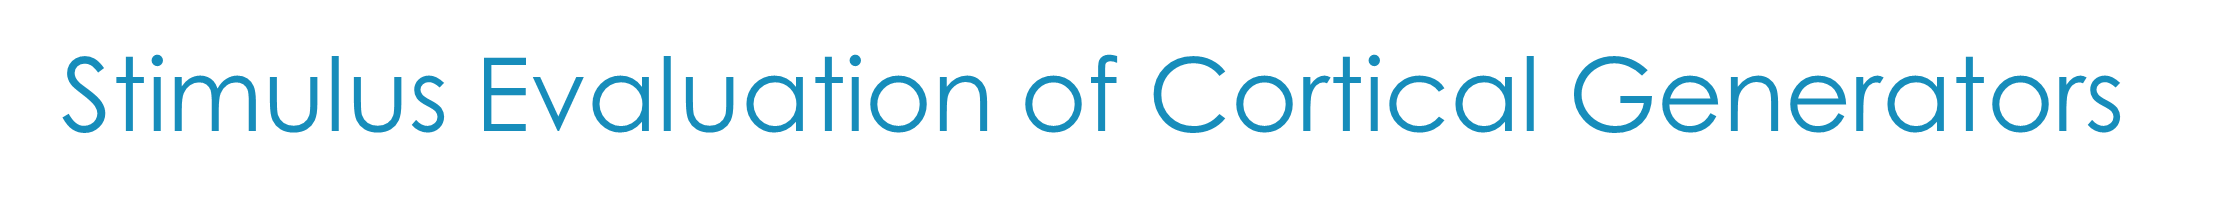

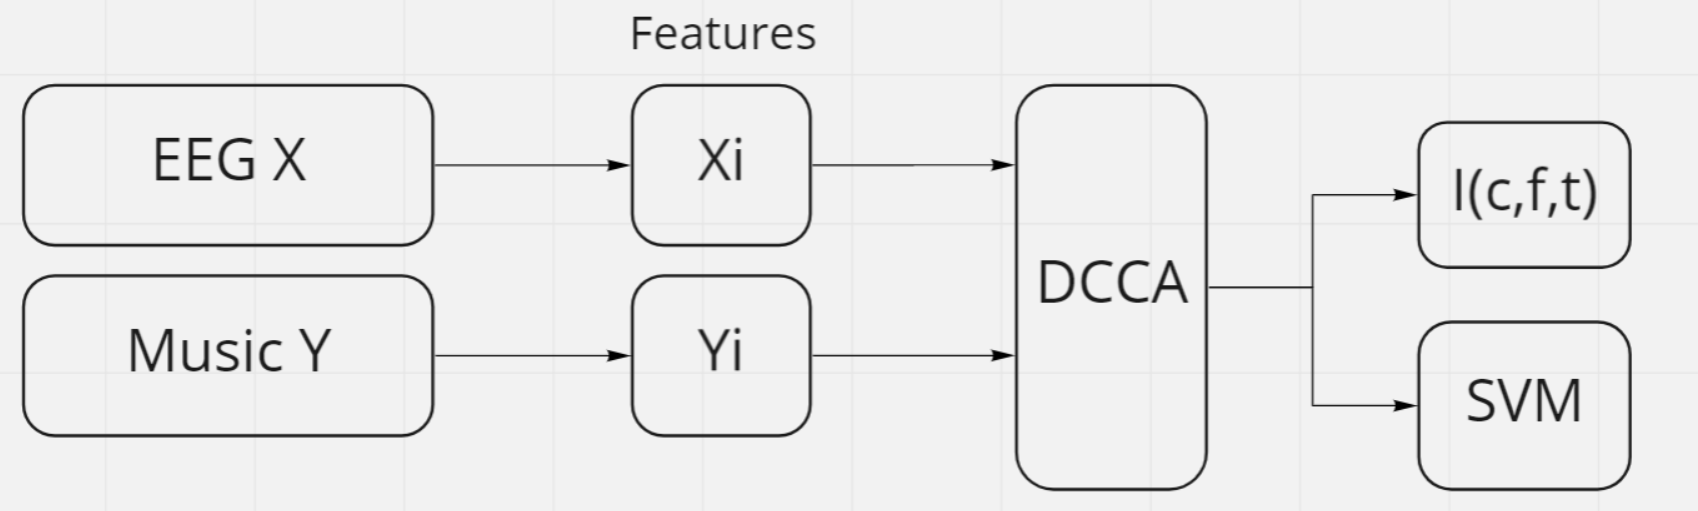


# init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git
!pip install mne==0.19
!pip install bctpy

  Cloning https://github.com/UN-GCPDS/python-gcpds.filters.git to /tmp/pip-req-build-90sb24rs
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-90sb24rs
  Created wheel for gcpds-filters: filename=gcpds_filters-0.1a0-py3-none-any.whl size=817587 sha256=6adf2db1f2f2bcf0419dc69bdb3816764c4743784ecdbc3e3a7127a603c4c95d
  Stored in directory: /tmp/pip-ephem-wheel-cache-8csbp3pi/wheels/36/7a/78/d27d0f0c7be2222e2c76dcafd6840212fbc620d24f8a7c13f0
Successfully built gcpds-filters
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-mxc2f987
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-mxc2f987
     |████████████████████████████████| 7.4 MB 27.6 MB/s 
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-py3-none-any.whl size=116898 sha256=f6ec5e56dd42fdfa16afffd808442c1c1a2ce0607bd612f767b282a6e8f76c37
  Stored in directory: /tmp/pip-ephem-wheel-cache

In [ ]:
from scipy.spatial.distance import squareform
import mne
from mne.connectivity import spectral_connectivity as connectivity
# drive y datos
from google.colab import drive
import requests
# estructuras
import pandas as pd
# 
from ipywidgets import interact_manual
from ipywidgets import interact
# módulo para entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# system
import os
from time import time
# data
import pickle
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat, savemat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
# figuras
import matplotlib.pyplot as plt
from gcpds.utils import loaddb
from gcpds.utils.visualizations import plot_eeg, plot_topoplot
# MNE toolbox
import mne
import bct
from mne.preprocessing import ICA
# módulo de multiproceso de las tareas.
import multiprocessing

# load data EEG

In [ ]:
# Sujetos de la base de datos
Subjects = list(np.arange(1,32))
# canales de la base de datos
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# Frecuencia de muestreo de la base de datos.
sampling_freq  = 1000
# ubicación de la base de datos.
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# Método utilizado para la función de ICA de MNE.
method = 'fastica'
# Número de núcleos para ell multiproceso
# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# ciclo de los sujetos.
y = list()
data_ref_ica = list()
data_ref = list()
data_componentes = list()
for s in Subjects:
  # carga de la información del sujetos.
  S_ERP = loadmat(load_path + f"Sujeto_"+str(s)+".mat")
  print('sujeto: ', s)
  data = S_ERP['music']
  # data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
  data_target = data

  # structure mne datos en (trials,canales,tiempo)
  ch_types = ['eeg']*n_channels
  info = mne.create_info(channels, ch_types=ch_types, sfreq=sampling_freq)
  # info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(1,45)

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw.get_data()[0,:,:],channels,sampling_freq)

  # Repairing artifacts with ICA
  
  # ica = ICA(n_components=n_channels, method=method, max_iter='auto', random_state=0)
  # ica.fit(raw)
  # componentes = ica.get_sources(raw).get_data()
  # componentes_ = ica.get_components()
  # ica.plot_sources(raw, show_scrollbars=False)
  
  # raw_delta = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_delta.filter(0.5,4)
  # componentes_delta = ica.get_sources(raw_delta).get_data()

  # raw_theta = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_theta.filter(4,8)
  # componentes_theta = ica.get_sources(raw_theta).get_data()

  # raw_alpha = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_alpha.filter(8,12)
  # componentes_alpha = ica.get_sources(raw_alpha).get_data()

  # raw_beta_l = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_beta_l.filter(12,16)
  # componentes_beta_l = ica.get_sources(raw_beta_l).get_data()

  # raw_beta_h = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_beta_h.filter(16,30)
  # componentes_beta_h = ica.get_sources(raw_beta_h).get_data()

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(componentes[0,:,:],channels,sampling_freq)
  
  # Parametros para el análisis de la entropia.
  # tau     = 10              # 20   30 
  # window  = 1*sampling_freq # 3,   3   segundo de la ventana.
  # step    = window*0.5      # 50%, 80% de traslape.
  # windows = list(np.arange(0,componentes.shape[2]-window,step))

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_raw = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  # # ica.plot_sources(mne.io.RawArray(raw.get_data()[0], info))
  
  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(componentes[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de las componentes.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_com = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  
  # raw2 = raw.copy()
  # comp_ = []
  # for tr in range(entropy_com.shape[0]):
  #   datos_ = np.max(entropy_com[tr,:,:],axis=0)-np.min(entropy_com[0,:,:],axis=0)
  #   datos_f = np.asarray([round(a,1) for a in datos_])
  #   comp_.append(np.where((datos_f>0)==True)[0])
  # pos = list(np.unique(np.concatenate(comp_)))
  # ica.exclude = [0]          # indices chosen based on various plots above sujeto 2.
  # ica.apply(raw2)
  
  # # figura señal quitando artefactos
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw2.get_data()[0,:,:],channels,sampling_freq)

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw2.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal quitando artefactos.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_ica = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de la señal {tim}'.format(tim=(time.time()-start_time)))

  # # CAR common average reference
  # # En la señal.
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  # data_ref = rereferenced_raw.get_data()
  # # En la señal reconstruida.
  # rereferenced_comp_ica, ref_data = mne.set_eeg_reference(raw2, ref_channels='average',projection=True,verbose=0)
  # data_componentes.append(componentes)
  # data_ref_ica = rereferenced_comp_ica.get_data()
  # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'.mat',{'X_ica':raw2.get_data(),'X_raw':raw.get_data(),'ref_raw':data_ref,
  #           'ref_ica':data_ref_ica,'H_raw':entropy_raw,'H_com':entropy_com,'H_ica':entropy_ica})
#   savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'_componentes.mat',{'data_componentes':componentes,'Componentes':componentes_,
#                                                                          'data_compo_delta':componentes_delta,
#                                                                          'data_compo_theta':componentes_theta,
#                                                                          'data_compo_alpha':componentes_alpha,
#                                                                          'data_compo_beta_l':componentes_beta_l,
#                                                                          'data_compo_beta_h':componentes_beta_h})
# # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'_all_componentes.mat',{'all_componentes':data_componentes})

KeyboardInterrupt: ignored

# PSD

In [ ]:
# Calculate PSD
nblock = 1000
win = hanning(nblock, True)
window = 1*sampling_freq
step = 0.5*sampling_freq
windows = list(np.arange(0,data_ref[0].shape[2]-window,step))
data_power_ = list()

for sub in range(len(Subjects)):
  Power = list()
  for tr in range(data_ref[sub].shape[0]):
    Power_ven = list()
    for ven in range(len(windows)):
      freqs, Pxxf = welch(np.squeeze(data_ref[sub][tr,:,int(windows[ven]):int(windows[ven]+window)]), sampling_freq, window=win,  nfft=nblock, return_onesided=True, scaling='spectrum')
      Power_ven.append(Pxxf[:,1:46])
    Power.append(np.asarray(Power_ven))
  data_power_.append(np.asarray(Power))
Data_pow = np.asarray(data_power_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  This is separate from the ipykernel package so we can avoid doing imports until


# Load functions deep cca

In [ ]:
cd /content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG


In [ ]:
ls

cca_functions.py
Cx_music.png
data_actual.npy
data_gauss__2.mat
dat_gauss_.mat
dcca.py
deep_losses.py
deep_models.py
deep_nets.py
dmcca.py
Indices_trials_malos.npy
layer2.mat
layer.mat
lcca.py
LICENSE
lmcca.py
lmdc.py
main_data.asv
main_data.m
main_deepcca
MIfunctions.py
modCSP.py
music_helper.py
preProcessEEG_Audio_Chevigne_2018.m
preProcessEEG_Audio_Chevigne_2018_v2.m
__pycache__/
README.md
sbj0acc48.75.eps
sbj0acc50.0.eps
sbj1acc43.75.eps
sbj2acc50.0.eps
sbj3acc50.0.eps
sbj4acc51.25.eps
sbj5acc50.0.eps
sbj6acc45.0.eps
speech_helper.py
Subject0_Preprocessed_ENV_EEG2.mat
Subject1_Preprocessed_ENV_EEG2.mat
Subject1_Preprocessed_ENV_EEG.mat
Subject2_Preprocessed_ENV_EEG2.mat
Subject2_Preprocessed_ENV_EEG.mat
Subject5_Preprocessed_ENV_EEG2.mat
sujeto_0_cka_featuresgauss_Music_acc.joblib
sujeto_1_cka_featuresgauss_Music_acc.joblib
sujeto_2_cka_featuresgauss_Music_acc.joblib
sujeto_3_cka_featuresgauss_Music_acc.joblib
sujeto_4_cka_featuresgauss_Music_acc.joblib
sujeto_5_cka_featuresgauss_M

In [ ]:
import cca_functions

# load data por grupo

In [ ]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import os
from os import path
import scipy.io
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.decomposition import PCA
import bct
from scipy.spatial.distance import squareform 
# from pdb import set_trace as bp  ################# added break point accessor####################
from cca_functions  import filtem2, pca_stim_filtem_pca_resp

In [ ]:
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here

# data_psd = scipy.io.loadmat(folder_path+f"/PSD_data_music2.mat")['Data_pow']
# data_psd = data_psd[:,:,:4,:,:]
# data_psd = data_psd.reshape([data_psd.shape[0]*data_psd.shape[1],\
#                               data_psd.shape[2]*data_psd.shape[3]*data_psd.shape[4]])
# print(data_psd.shape)
data_PLV_ = scipy.io.loadmat(folder_path+f"/PLV_all_subs31_music2.mat")['PLV']
data_PLV__ = np.zeros((data_PLV_.shape[0],data_PLV_.shape[1],19,7,data_PLV_.shape[4]))
for a1 in range(data_PLV_.shape[0]):
  for a2 in range(data_PLV_.shape[1]):
    for a3 in range(7):
      for a4 in range(data_PLV_.shape[4]):
        data_PLV__[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_PLV_[a1,a2,:,a3,a4]))
# data_PLV__ = data_PLV__[:,:,:,:4,:]
data_PLV = np.zeros((data_PLV__.shape[0],data_PLV__.shape[1],19,data_PLV__.shape[3],20))
del data_PLV_

for win in range(20):
  data_PLV[:,:,:,:,win] = np.mean(np.squeeze(data_PLV__[:,:,:,:,win:win+2]),axis=4)
dim_gauss = data_PLV.shape
del data_PLV__
# data_gauss = data_gauss.reshape([data_gauss.shape[0]*data_gauss.shape[1],\
#                                   data_gauss.shape[2]*data_gauss.shape[3]*data_gauss.shape[4]])
print(data_PLV.shape)
# data_gauss_ = scipy.io.loadmat(folder_path+f"/conectividad_gauss.mat")['gaus']
# data_gauss = np.zeros((data_gauss_.shape[0],data_gauss_.shape[1],19,data_gauss_.shape[3],data_gauss_.shape[4]))
# for a1 in range(data_gauss_.shape[0]):
#   for a2 in range(data_gauss_.shape[1]):
#     for a3 in range(data_gauss_.shape[3]):
#       for a4 in range(data_gauss_.shape[4]):
#         data_gauss[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_gauss_[a1,a2,:,a3,a4]))
# del data_gauss_
# data_gauss = data_gauss[:,:,:,:4,:]
# data_gauss = data_gauss.reshape([data_gauss.shape[0]*data_gauss.shape[1],\
#                                   data_gauss.shape[2]*data_gauss.shape[3]*data_gauss.shape[4]])
# print(data_gauss.shape)
# data_pac = list()
# for s in range(31):
#   data_pac.append(scipy.io.loadmat(folder_path+f"PLV_pac_music{s}_trials.mat")['temporal_plv'])
# data_pac_ = np.asarray(data_pac)
# del data_pac
# data_pac = np.zeros((data_pac_.shape[0],data_pac_.shape[1],19,data_pac_.shape[3],data_pac_.shape[4],data_pac_.shape[5]))
# for a1 in range(data_pac_.shape[0]):
#   for a2 in range(data_pac_.shape[1]):
#     for a3 in range(data_pac_.shape[3]):
#       for a4 in range(data_pac_.shape[4]):
#         for a5 in range(data_pac_.shape[5]):
#           data_pac[a1,a2,:,a3,a4,a5] = bct.strengths_und(squareform(data_pac_[a1,a2,:,a3,a4,a5]))
# data_pac = data_pac[:,:,:,:4,:4,:]
# del data_pac_
# data_pac = data_pac.reshape([data_pac.shape[0]*data_pac.shape[1],\
#                               data_pac.shape[2]*data_pac.shape[3]*data_pac.shape[4]*data_pac.shape[5]])
# print(data_pac.shape)
# data_MuInf = scipy.io.loadmat(folder_path+'/mutual_inf_music2.mat')['Muinf']
# data_MuInf = np.transpose(data_MuInf,[0,2,1,3])
# data_MuInf = data_MuInf[:,:,:4,:]
# data_MuInf = data_MuInf.reshape([data_MuInf.shape[0]*data_MuInf.shape[1],\
#                                   data_MuInf.shape[2]*data_MuInf.shape[3]])
# print(data_MuInf.shape)

(31, 40, 19, 7, 20)


In [ ]:
num_blocks = 20
# NUMBER OF CHANNELS IN THE PROCESSED STIMULI AFTER FILTERBANK
stim_chans = 19
# NUMBER OF CHANNELS IN prePREPROCESSED STIMULI (1D)
stim_chans_pre = 1

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA envolvente
def load_dmcca_data_all(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    for train_index, test_index in kf.split(resp_data):
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test = resp_data[train_index], resp_data[test_index]
      y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=1 - train_ratio, random_state=0)
      # print(len(x_train), len(x_val), len(x_test))

      resp_train = np.concatenate([x_train[x] for x in range(len(x_train))],0)
      resp_val   = np.concatenate([x_val[x] for x in range(len(x_val))],0)
      resp_test  = np.concatenate([x_test[x] for x in range(len(x_test))],0)
      data_subs_pre.append([resp_train, resp_val, resp_test])

      stim_train = np.concatenate([y_train[x] for x in range(len(y_train))],0)
      stim_val   = np.concatenate([y_val[x] for x in range(len(y_val))],0)
      stim_test  = np.concatenate([y_test[x] for x in range(len(y_test))],0)
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)
      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
      y_train_, y_test_  = stim_data[train_index], stim_data[test_index]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      for tr in range(len(x_train_)):
        X_train[tr,:,:] = x_train_[tr]
      for tr in range(len(x_test_)):
        x_test[tr,:,:] = x_test_[tr]
      for tr in range(len(x_val_)):
        x_val[tr,:,:] = x_val_[tr]
      X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
      X_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
      X_val   = np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]))
      X_train[np.isnan(X_train)]= 0
      X_test[np.isnan(X_test)]  = 0
      X_val[np.isnan(X_val)]    = 0

      resp_train = X_train #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = X_val   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = X_test  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(y_train_),y_train_[0].shape[0],y_train_[0].shape[1]))
      y_test  = np.zeros((len(y_test_),y_test_[0].shape[0],y_test_[0].shape[1]))
      y_val   = np.zeros((len(y_val_),y_val_[0].shape[0],y_val_[0].shape[1]))
      for tr in range(len(y_train_)):
        y_train[tr,:,:] = y_train_[tr]
      for tr in range(len(y_test_)):
        y_test[tr,:,:] = y_test_[tr]
      for tr in range(len(y_val_)):
        y_val[tr,:,:] = y_val_[tr]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]*y_train.shape[2]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]*y_test.shape[2]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]*y_val.shape[2]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx_2(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,20,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      for tr in range(len(x_train_)):
        X_train[tr,:,:] = x_train_[tr]
      for tr in range(len(x_test_)):
        x_test[tr,:,:] = x_test_[tr]
      for tr in range(len(x_val_)):
        x_val[tr,:,:] = x_val_[tr]
      X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
      X_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
      X_val   = np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]))
      X_train[np.isnan(X_train)]= 0
      X_test[np.isnan(X_test)]  = 0
      X_val[np.isnan(X_val)]    = 0

      resp_train = X_train #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = X_val   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = X_test  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx_gauss(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0

        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,20,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
    datos_stim = datos_stim[:,:,:,2:5,:]
    datos_r2 = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*3*datos_stim.shape[4]])

    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_r2[train_index,:], datos_r2[test_index,:]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      # X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      # x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      # x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      # for tr in range(len(x_train_)):
      #   X_train[tr,:,:] = x_train_[tr]
      # for tr in range(len(x_test_)):
      #   x_test[tr,:,:] = x_test_[tr]
      # for tr in range(len(x_val_)):
      #   x_val[tr,:,:] = x_val_[tr]
      # X_train = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]))
      # X_test  = np.reshape(x_test,(x_test_.shape[0],x_test_.shape[1]*x_test_.shape[2]))
      # X_val   = np.reshape(x_val,(x_val_.shape[0],x_val_.shape[1]*x_val_.shape[2]))
      x_train_[np.isnan(x_train_)]= 0
      x_test_[np.isnan(x_test_)]  = 0
      x_val_[np.isnan(x_val_)]    = 0

      resp_train = x_train_ #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = x_val_   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = x_test_  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cxs_and_PSD_MUinf(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    # for sub in subs:
    #     # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
    #     if type == 1:
    #       resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
    #     elif type ==2:
    #       resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
    #     elif type ==3:
    #       resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
    #     elif type ==4:
    #       resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
    #     for tr in range(len(resp_data)):
    #       resp_data[tr][np.isnan(resp_data[tr])] = 0

        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    
    
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here

    # data_psd = scipy.io.loadmat(folder_path+f"/PSD_data_music2.mat")['Data_pow']
    # data_psd = data_psd[:,:,:4,:,:]
    # data_psd = data_psd.reshape([data_psd.shape[0]*data_psd.shape[1],\
    #                               data_psd.shape[2]*data_psd.shape[3]*data_psd.shape[4]])
    # print(data_psd.shape)
    data_PLV_ = scipy.io.loadmat(folder_path+f"/PLV_all_subs31_music2.mat")['PLV']
    data_PLV__ = np.zeros((data_PLV_.shape[0],data_PLV_.shape[1],19,7,data_PLV_.shape[4]))
    for a1 in range(data_PLV_.shape[0]):
      for a2 in range(data_PLV_.shape[1]):
        for a3 in range(7):
          for a4 in range(data_PLV_.shape[4]):
            data_PLV__[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_PLV_[a1,a2,:,a3,a4]))
    # data_PLV__ = data_PLV__[:,:,:,:4,:]
    data_PLV = np.zeros((data_PLV__.shape[0],data_PLV__.shape[1],19,data_PLV__.shape[3],20))
    del data_PLV_

    for win in range(20):
      data_PLV[:,:,:,:,win] = np.mean(np.squeeze(data_PLV__[:,:,:,:,win:win+2]),axis=4)
    dim_gauss = data_PLV.shape
    del data_PLV__
    data_PLV = data_PLV.reshape([data_PLV.shape[0]*data_PLV.shape[1],\
                                  data_PLV.shape[2]*data_PLV.shape[3]*data_PLV.shape[4]])
    print(data_PLV.shape)
    # data_gauss_ = scipy.io.loadmat(folder_path+f"/conectividad_gauss.mat")['gaus']
    # data_gauss = np.zeros((data_gauss_.shape[0],data_gauss_.shape[1],19,data_gauss_.shape[3],data_gauss_.shape[4]))
    # for a1 in range(data_gauss_.shape[0]):
    #   for a2 in range(data_gauss_.shape[1]):
    #     for a3 in range(data_gauss_.shape[3]):
    #       for a4 in range(data_gauss_.shape[4]):
    #         data_gauss[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_gauss_[a1,a2,:,a3,a4]))
    # del data_gauss_
    # data_gauss = data_gauss[:,:,:,:4,:]
    # data_gauss = data_gauss.reshape([data_gauss.shape[0]*data_gauss.shape[1],\
    #                                   data_gauss.shape[2]*data_gauss.shape[3]*data_gauss.shape[4]])
    # print(data_gauss.shape)
    # data_pac = list()
    # for s in range(31):
    #   data_pac.append(scipy.io.loadmat(folder_path+f"PLV_pac_music{s}_trials.mat")['temporal_plv'])
    # data_pac_ = np.asarray(data_pac)
    # del data_pac
    # data_pac = np.zeros((data_pac_.shape[0],data_pac_.shape[1],19,data_pac_.shape[3],data_pac_.shape[4],data_pac_.shape[5]))
    # for a1 in range(data_pac_.shape[0]):
    #   for a2 in range(data_pac_.shape[1]):
    #     for a3 in range(data_pac_.shape[3]):
    #       for a4 in range(data_pac_.shape[4]):
    #         for a5 in range(data_pac_.shape[5]):
    #           data_pac[a1,a2,:,a3,a4,a5] = bct.strengths_und(squareform(data_pac_[a1,a2,:,a3,a4,a5]))
    # data_pac = data_pac[:,:,:,:4,:4,:]
    # del data_pac_
    # data_pac = data_pac.reshape([data_pac.shape[0]*data_pac.shape[1],\
    #                               data_pac.shape[2]*data_pac.shape[3]*data_pac.shape[4]*data_pac.shape[5]])
    # print(data_pac.shape)
    # data_MuInf = scipy.io.loadmat(folder_path+'/mutual_inf_music2.mat')['Muinf']
    # data_MuInf = np.transpose(data_MuInf,[0,2,1,3])
    # data_MuInf = data_MuInf[:,:,:4,:]
    # data_MuInf = data_MuInf.reshape([data_MuInf.shape[0]*data_MuInf.shape[1],\
    #                                   data_MuInf.shape[2]*data_MuInf.shape[3]])
    # print(data_MuInf.shape)
    resp_data = data_PLV#np.concatenate([data_psd,data_PLV,data_gauss,data_pac,\
                         #       data_MuInf],axis=1)
    del data_PLV#,data_gauss,data_pac,data_MuInf
    # datos organizados
    resp_data[np.isnan(resp_data)] = 0
    print(resp_data.shape)

    print('No trials '+str(resp_data.shape[0]))
    print(resp_data.shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    # if type == 1:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    # elif type ==2:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    # elif type ==3:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    # elif type ==4:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    # datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord_all.mat")["datos"]
    datos_stim_[np.isnan(datos_stim_)]=0
    tr_cu      = loadmat(folder_path_+'/Trials_cuadrantes.mat')['trial_ord']
    tr_1 = tr_cu==1
    tr_2 = tr_cu==2
    tr_3 = tr_cu==3
    tr_4 = tr_cu==4
    tr_all = tr_1+tr_2+tr_3+tr_4
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,25,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    plt.imshow(tr_all,aspect='auto')
    plt.show()
    tr_all   = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))
    
    # datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
    # datos_stim = datos_stim[:,:,:,2:5,:]
    # datos_r2 = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*3*datos_stim.shape[4]])

    for subj in range(31):
      train_index_  = tr_all.astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.zeros((1240)).astype(bool)
      test_index_[ind_s[subj]:ind_s[subj]+40] = True
      test_index_ = test_index_*tr_all
      # train_index_[ind_s[subj]:ind_s[subj]+40] = False
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index,:], resp_data[test_index,:]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      # X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      # x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      # x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      # for tr in range(len(x_train_)):
      #   X_train[tr,:,:] = x_train_[tr]
      # for tr in range(len(x_test_)):
      #   x_test[tr,:,:] = x_test_[tr]
      # for tr in range(len(x_val_)):
      #   x_val[tr,:,:] = x_val_[tr]
      # X_train = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]))
      # X_test  = np.reshape(x_test,(x_test_.shape[0],x_test_.shape[1]*x_test_.shape[2]))
      # X_val   = np.reshape(x_val,(x_val_.shape[0],x_val_.shape[1]*x_val_.shape[2]))
      x_train_[np.isnan(x_train_)]= 0
      x_test_[np.isnan(x_test_)]  = 0
      x_val_[np.isnan(x_val_)]    = 0

      resp_train = x_train_ #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = x_val_   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = x_test_  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])
      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA RMS
def load_dmcca_data_cluster(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = list()
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx (1).mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx (1).mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    print("stim "+str(len(stim_data)))
    x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    print("y_test "+str(len(y_train)))
    # validation is now 80-20% of the initial data set
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    print(len(x_train), len(x_val), len(x_test))

    resp_train = np.concatenate([x_train[x] for x in range(len(x_train))],0)
    resp_val   = np.concatenate([x_val[x] for x in range(len(x_val))],0)
    resp_test  = np.concatenate([x_test[x] for x in range(len(x_test))],0)
    data_subs_pre.append([resp_train, resp_val, resp_test])

    stim_train = np.concatenate([y_train[x] for x in range(len(y_train))],0)
    stim_val   = np.concatenate([y_val[x] for x in range(len(y_val))],0)
    stim_test  = np.concatenate([y_test[x] for x in range(len(y_test))],0)
    # if type == 3:
    stim_train = scaler.fit_transform(stim_train)
    stim_val   = scaler.transform(stim_val)
    stim_test  = scaler.transform(stim_test)
    data_stim_pre = [stim_train, stim_val, stim_test]
    data_subs_pre.append(data_stim_pre)

    print("Stim_train "+str(stim_train.shape))
    # print(data_subs_pre[1].shape)    
    # Applying stimulus lag (d_S)
    stim_lagged_midshape = [None, None, None]
    for i in range(3):
        stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
    data_subs_pre[-1] = stim_lagged_midshape

    return data_subs_pre

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA
def load_dmcca_data2(subs, mid_shape, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    print('block: ' + str(block))
    if block == num_blocks - 1: val_idx = 0
    else:                       val_idx = block + 1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/speech-EEG/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = []
    for sub in subs:
        resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG.mat")["resp"][0]
        # Loading the response data, dividing them into training, validation and test data
        resp_train = np.concatenate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        resp_val   = resp_data[val_idx]
        resp_test  = resp_data[block]
        data_subs_pre.append([resp_train, resp_val, resp_test])

    # Loading the stimulus data, dividing them into training, validation and test data
    stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG.mat")["stim"][0]
    stim_train = np.concatenate([stim_data[x] for x in range(len(stim_data)) if x not in [block, val_idx]], 0)
    stim_val   = stim_data[val_idx]
    stim_test  = stim_data[block]
    print("stim_train "+str(stim_train.shape))
    data_stim_pre = [stim_train, stim_val, stim_test]
    data_subs_pre.append(data_stim_pre)

    # Applying stimulus lag (d_S)
    stim_lagged_midshape = [None, None, None]
    for i in range(3):
        stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
    data_subs_pre[-1] = stim_lagged_midshape
    return data_subs_pre

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for LCCA and DCCA
def load_mcca_data2(subs, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    print('block: ' + str(block))
    if block == num_blocks - 1: val_idx = 0
    else:                       val_idx = block + 1
    # LOAD THE prePREPROCESSED DATA HERE 
    # AND THEN PROCESS IT
    # data_subs_pre will have N SUBJECTS' RESPONSES SUCH THAT
    # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
    # WHERE
    # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
    # data_stim_pre IS ALSO PRESENT IN THE SAME WAY AS data_subs_pre[n].
    # ASSUMPTION: THE STIMULI DATA IS OF 1 DIMENSION.
    # IF NOT:
    #    WE CAN either DO PCA ONTO 1D AND THEN DO FILTERBANK.
    #    or FILTERBANK AND THEN, PCA to 21D.
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/speech-EEG/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = []
    for sub in subs:
        resp_data = scipy.io.loadmat(f"{folder_path}/Subject{sub}_Preprocessed_ENV_EEG.mat")["resp"][0]
        # Loading the response data, dividing them into training, validation and test data
        resp_train = np.concatenate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        resp_val   = resp_data[val_idx]
        resp_test  = resp_data[block]
        data_subs_pre.append([resp_train, resp_val, resp_test])
    # Loading the stimulus data, dividing them into training, validation and test data
    stim_data = scipy.io.loadmat(f"{folder_path}/Subject{sub}_Preprocessed_ENV_EEG.mat")["stim"][0]
    stim_train = np.concatenate([stim_data[x] for x in range(len(stim_data)) if x not in [block, val_idx]], 0)
    stim_val   = stim_data[val_idx]
    stim_test  = stim_data[block]
    data_stim_pre = [stim_train, stim_val, stim_test]
    # processing the response by
    # PCA to 60D ------> filterbank (21 filters) to 1260D ------> PCA to 139D
    # processing the stimulus by 
    # stimulus to filterbank => 21D 
    # USED "pca_filt_pca_resp" from cca_functions to perform this 
    processed_data_subs = []
    for data_sub in data_subs_pre:
        processed_data_subs.append(pca_filt_pca_resp(data_sub))
    processed_data_subs.append(filtone(data_stim_pre[0], data_stim_pre[1], data_stim_pre[2]))
    data_subs = list(processed_data_subs)
    del processed_data_subs
    return data_subs

# funiones

In [ ]:
# dmcca_model??

In [ ]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import os
from os import path
import scipy.io
import random
# from pdb import set_trace as bp  #################added break point accessor####################
from torch._C import * 
import torch
from cca_functions  import *
from speech_helper  import load_dmcca_data
from music_helper   import stim_resp
from deep_models    import dcca_model, dmcca_model


def plot_data(x, y,s):
    plt.clf()
    x = x[0]
    y = y[0]
    plt.plot(x, color='orange')
    plt.plot(y, color='blue')
    plt.legend(['stim', 'resp'])
    plt.savefig(f'{s}.eps', format="eps")

def plot_losses_tr_val_te(losses, s, marker="o"):
    plt.clf()
    plt.plot(losses[:, 0], marker=marker, color='red')
    plt.plot(losses[:, 1], marker=marker, color='blue')
    plt.plot(losses[:, 2], marker=marker, color='green')
    plt.legend(['training', 'valid', 'test'])
    # plt.savefig(s+'.png', format="png")
    plt.savefig(s+'.eps', format="eps")

# HELPER FUNCTION FOR PERFORMING DCCA
def dcca_method(stim_data, resp_data, dropout, dataset, saving_name_root):
    """
    CUSTOM DCCA METHOD
    """
    print(f"DCCA for {saving_name_root}")

    new_data_d, correlations, model_d = dcca_model(stim_data, resp_data, o_dim, learning_rate, use_all_singular_values, epoch_num, batch_size, reg_par, dropout, best_only, path_name, seed)

    x1 = new_data_d[2][0]
    x2 = new_data_d[2][1]
    x3 = new_data_d[1][0]
    x4 = new_data_d[1][1]
    corr_d     = np.squeeze(my_corr(x1, x2, o_dim))
    corr_d_val = np.squeeze(my_corr(x1, x2, o_dim))
    print(f'DCCA is : {[corr_d, corr_d_val]}')

    # PLOTTING THE NEW DATA
    plot_data_name = f"{path_name}/{dataset}_plot_dmdc_data_{saving_name_root}"
    plot_data(x1, x2, plot_data_name)

    # # PLOTTING THE TRAINING LOSSES
    # s = f"{path_name}/{dataset}_plot_losses_{saving_name_root}"
    # plot_losses_tr_val_te(correlations, s)

    # SAVING THE NEW DATA
    save_data_name = f"{path_name}/{dataset}_dmdc_data_{saving_name_root}.pkl"
    fp = open(save_data_name, 'wb')
    pkl.dump(new_data_d, fp)
    fp.close()

    # SAVING THE DCCA MODEL
    save_model_name = f"{path_name}/{dataset}_dmdc_model_{saving_name_root}.path.tar"
    torch.save(model_d, save_model_name)
    # save_dict_name = f"{path_name}/{dataset}_dmdc_model_dict_{saving_name_root}.pth.tar"
    # torch.save({'state_dict': model_d.state_dict()}, save_dict_name)
    del model_d

    return [corr_d, corr_d_val]

# HELPER FUNCTION FOR PERFORMING LCCA
def lcca_method(stim_data, resp_data, dataset, saving_name_root):
    """
    CUSTOM LCCA METHOD
    """
    print(f"LCCA for {saving_name_root}")

    _, new_data_l = cca_model(stim_data, resp_data, o_dim)
    x1 = new_data_l[2][0] ; x3 = new_data_l[1][0]
    x2 = new_data_l[2][1] ; x4 = new_data_l[1][1]
    corr_l = [np.squeeze(my_corr(x1, x2, o_dim)), np.squeeze(my_corr(x3, x4, o_dim))]

    print(f'LCCA is : {corr_l}')
    s = f"{path_name}/{dataset}_plot_dmlc_data_{saving_name_root}"
    plot_data(my_standardize(x1), my_standardize(x2), s)
    fp = open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'wb')
    pkl.dump(new_data_l, fp)
    fp.close()
    fp_m = f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.mat'
    savemat(fp_m,{'New_data_l':new_data_l})
    
    del new_data_l

    return corr_l[0], corr_l[1]

def dmcca_method(all_data, dataset, dropout, saving_name_root,freqs):
    o_dim = 10
    # providing the data to DMCCA model
    dmcca_data, training_losses, dmcca_model_ = dmcca_model(all_data, o_dim, learning_rate, use_all_singular_values, epoch_num, batch_size, reg_par, dropout, best_only, lambda_, path_name, mid_shape, seed)
    print('Colocar el valor de dimensión de los datos')
    print(dmcca_data[0][0][0].shape)
    data__ = dmcca_data
    # print(training_losses.shape)
    # SAVING THE DMCCA MODEL
    save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
    torch.save(dmcca_model_, save_model_name)
    # save_dict_name = f"{path_name}/{dataset}_dmcca_dict_{saving_name_root}.pth.tar"
    # torch.save({'state_dict': dmcca_model.state_dict()}, save_dict_name)
    del dmcca_model_

    # TO MAKE SURE EVERYTHING IS in CPU and NUMPY
    for gg in range(3):
        for hh,_ in enumerate(dmcca_data[gg]):
            for ii,_ in enumerate(dmcca_data[gg][hh]):
                if torch.is_tensor(dmcca_data[gg][hh][ii]):
                    dmcca_data[gg][hh][ii] = dmcca_data[gg][hh][ii].cpu().numpy()

    new_dmcca_data = dmcca_data
    del dmcca_data

    # SAVING THE DMCCA DATA
    fp = open(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl', 'wb')
    pkl.dump(new_dmcca_data, fp)
    fp.close()
    del new_dmcca_data
    n_subs = len(all_data) - 1
    print(n_subs)
    dmdc_corrs     = np.zeros((n_subs))
    dmdc_corrs_val = np.zeros((n_subs))
    dmlc_corrs     = np.zeros((n_subs))
    dmlc_corrs_val = np.zeros((n_subs))

    for sub in range(0, n_subs):
        print(f"Sub: {subs[sub]}")
        data_subs = pkl.load(open(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl', 'rb'))
        data_stim = [data_subs[0][0][-1],  data_subs[1][0][-1],  data_subs[2][0][-1]]
        data_sub  = [data_subs[0][0][sub], data_subs[1][0][sub], data_subs[2][0][sub]]
        del data_subs
        # return data_subs
        new_stim_data, new_resp_data, _, _ = pca_stim_filtem_pca_resp(data_sub, data_stim,freqs)
        # DMCCA + LCCA
        print(f"DMCCA + LCCA : {saving_name_root}")
        dmlc_corrs[sub], dmlc_corrs_val[sub] = lcca_method(new_stim_data, new_resp_data, dataset, f"{saving_name_root}_sub_{sub}")
        print(f'DMLC corrs are : {dmlc_corrs}')
        # DMCCA + DCCA METHOD.
        print(f"DMCCA + DCCA : {saving_name_root}")
        dmdc_corrs[sub], dmdc_corrs_val[sub] = dcca_method(data_stim, data_sub, dropout, dataset, f"{saving_name_root}_sub_{sub}")
        print(f'DMDC corrs are : {dmdc_corrs}')    
    # os.remove(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl')

    print(f'DONE {dataset} - {saving_name_root}.')
    return [dmlc_corrs, dmlc_corrs_val], [dmdc_corrs, dmdc_corrs_val] ,data__,data_sub

# prueba 1 para ver con envolvete en todos los trials

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_1_0.1_9_0_1/
[17.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.1, 0.2]
num_blocks : 20
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
9
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6248876169576483 = 0.25373899936676025
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.3453972041606903 = 0.28168806433677673
torch.Size([1501, 28])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.15488919615745544 = 0.3007388710975647
  val. loss is : -0.2817 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250961335365381 = 0.25371822714805603
  Validation corr LOSS : 0.3162
0.31

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


4.803877795962529
CCA Model Ended.
LCCA is : [4.803877795962529, 4.481877498048649]
DMDC corrs are : [4.8038778]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [0.058260040566012826, 0.058260040566012826]
DMDC corrs are : [0.05826004]
DONE speech - block_0_drpt_0.05.
[[[[4.8038778 ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


4.761658725664727
CCA Model Ended.
LCCA is : [4.761658725664727, 4.5592216845131945]
DMDC corrs are : [4.76165873]
DMCCA + DCCA : block_0_drpt_0.1
DCCA for block_0_drpt_0.1_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  

ValueError: ignored

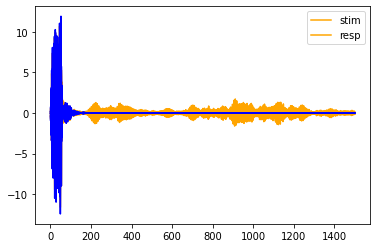

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(5)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(9)
# D                = [0,0.05,0.02]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
D = [0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 10        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba de envolvente con los trials de grupo 1

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_1_0.1_8_0.05_1/
[93.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 20
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     93.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277824124374 - 0.6249906067120827 = 0.2537287771701813
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.34187063574790955 = 0.28204071521759033
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.15285290777683258 = 0.3009425103664398
  val. loss is : -0.2820 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778089706505 - 0.6248990448854738 = 0.2537378966808319
  Validation corr LOSS : 0.3162
0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.966994506831047
CCA Model Ended.
LCCA is : [array(0.96699451), array(0.93987126)]
DMDC corrs are : [0.96699451]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : -0.0201
  Validation CORRELATION : 0.0215
  Test CORRELATION       : -0.0369
  val. loss is : -0.0215 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0207
  Validation CORRELATION : 0.0333
  Test CORRELATION       : 0.0018
  val. loss is : -0.0333 & the min. loss is : -0.0215
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0072
  Test CORRELATION       : nan
  val. loss is : -0.0072 & the min. loss is : -0.0333
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0060
  Validation CORRELATION : -0.0036
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00266181, dtype=float32), array(-0.00266181, dtype=float32)]
DMDC corrs are : [-0.00266181]
DONE speech - block_0_drpt_0.05.
[[[[ 0.96699451]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9726735532944454
CCA Model Ended.
LCCA is : [array(0.97267355), array(0.92750587)]
DMDC corrs are : [0.97267355]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : -0.0233
  Validation CORRELATION : -0.0111
  Test CORRELATION       : 0.0076
  val. loss is : 0.0111 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0035
  Validation CORRELATION : 0.0105
  Test CORRELATION       : 0.0048
  val. loss is : -0.0105 & the min. loss is : 0.0111
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0011
  Validation CORRELATION : 0.0163
  Test CORRELATION       : 0.0029
  val. loss is : -0.0163 & the min. loss is : -0.0105
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0144
  Validation CORRELATION : -0.0032
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00854453, dtype=float32), array(0.00854453, dtype=float32)]
DMDC corrs are : [0.00854453]
DONE speech - block_0_drpt_0.02.
[[[[ 0.96699451]
   [ 0.97267355]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8375959640869322
CCA Model Ended.
LCCA is : [array(0.83759596), array(0.8298515)]
DMDC corrs are : [0.83759596]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : 0.0153
  Validation CORRELATION : 0.0149
  Test CORRELATION       : 0.0193
  val. loss is : -0.0149 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0102
  Validation CORRELATION : -0.0324
  Test CORRELATION       : 0.0453
  val. loss is : 0.0324 & the min. loss is : -0.0149
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0159
  Test CORRELATION       : 0.0121
  val. loss is : -0.0159 & the min. loss is : -0.0149
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0084
  Validation CORRELATION : 0.0274
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.0376744, dtype=float32), array(-0.0376744, dtype=float32)]
DMDC corrs are : [-0.0376744]
DONE speech - block_0_drpt_0.2.
[[[[ 0.96699451]
   [ 0.97267355]
   [ 0.83759596]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.    

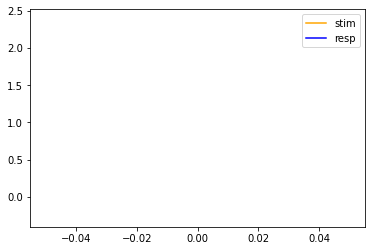

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 20        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba de grupo 1 con envolvente

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_2_0.1_8_0.05_1/
[17.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 2
num_blocks_start: 0
num_blocks_end  : 2
num_blocks_net  : 2
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847696832 - 0.6249865748114505 = 0.2537292242050171
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.34566399455070496 = 0.28166136145591736
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1545804888010025 = 0.30076971650123596
  val. loss is : -0.2817 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622777752957104 - 0.6250704324851601 = 0.253720760345459
  Validation corr LOSS : 0.3162
0.31

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9256091426335538
CCA Model Ended.
LCCA is : [array(0.92560914), array(0.86557349)]
DMDC corrs are : [0.92560914]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0104
  Validation CORRELATION : 0.0157
  Test CORRELATION       : -0.0710
  val. loss is : -0.0157 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : -0.0103
  Test CORRELATION       : 0.0279
  val. loss is : 0.0103 & the min. loss is : -0.0157
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0106
  Validation CORRELATION : 0.0179
  Test CORRELATION       : -0.0667
  val. loss is : -0.0179 & the min. loss is : -0.0157
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0100
  Validation CORRELATION : -0.0195


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.06855629, dtype=float32), array(-0.06855629, dtype=float32)]
DMDC corrs are : [-0.06855629]
DONE speech - block_0_drpt_0.05.
[[[[ 0.92560914]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847696832 - 0.6249865748114505 = 0.2537292242050171
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1545804888010025 = 0.30076971650123596
torch.Size([1448, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.34566399455070496 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9163271701407067
CCA Model Ended.
LCCA is : [array(0.91632717), array(0.88179903)]
DMDC corrs are : [0.91632717]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0104
  Validation CORRELATION : -0.0710
  Test CORRELATION       : 0.0157
  val. loss is : 0.0710 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : 0.0279
  Test CORRELATION       : -0.0103
  val. loss is : -0.0279 & the min. loss is : 0.0710
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0028
  Validation CORRELATION : 0.0154
  Test CORRELATION       : -0.0096
  val. loss is : -0.0154 & the min. loss is : -0.0279
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0037
  Validation CORRELATION : -0.0135

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00238197, dtype=float32), array(-0.00238197, dtype=float32)]
DMDC corrs are : [-0.00238197]
DONE speech - block_1_drpt_0.05.
[[[[ 0.92560914]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.91632717]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.88179903]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277842645591 - 0.6249664856889153 = 0.2537311017513275
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.3463001251220703 = 0.2815977931022644
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1548728346824646 = 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9635374647361615
CCA Model Ended.
LCCA is : [array(0.96353746), array(0.90584173)]
DMDC corrs are : [0.96353746]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0271
  Validation CORRELATION : 0.0129
  Test CORRELATION       : -0.0151
  val. loss is : -0.0129 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0172
  Validation CORRELATION : -0.0096
  Test CORRELATION       : 0.0121
  val. loss is : 0.0096 & the min. loss is : -0.0129
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0047
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0096
  val. loss is : 0.0060 & the min. loss is : -0.0129
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.01882264, dtype=float32), array(-0.01882264, dtype=float32)]
DMDC corrs are : [-0.01882264]
DONE speech - block_0_drpt_0.02.
[[[[ 0.92560914]
   [ 0.96353746]
   [ 0.        ]]

  [[ 0.91632717]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [-0.01882264]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.90584173]
   [ 0.        ]]

  [[ 0.88179903]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [-0.01882264]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277842645591 - 0.6249664856889153 = 0.2537311017513275
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1548728346824646 = 0.30074048042297363
torch.Size([1448, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.3463001251220703 =

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9599121938550081
CCA Model Ended.
LCCA is : [array(0.95991219), array(0.9038063)]
DMDC corrs are : [0.95991219]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0271
  Validation CORRELATION : -0.0151
  Test CORRELATION       : 0.0129
  val. loss is : 0.0151 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0172
  Validation CORRELATION : 0.0121
  Test CORRELATION       : -0.0096
  val. loss is : -0.0121 & the min. loss is : 0.0151
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0011
  Validation CORRELATION : 0.0031
  Test CORRELATION       : 0.0009
  val. loss is : -0.0031 & the min. loss is : -0.0121
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0027
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00076538, dtype=float32), array(-0.00076538, dtype=float32)]
DMDC corrs are : [-0.00076538]
DONE speech - block_1_drpt_0.02.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 0.00000000e+00]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 0.00000000e+00]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 0.00000000e+00]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 0.00000000e+00]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250346387173497 = 0.2537243366241455
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.34273549914360046 = 0.2819542288780212

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8901216759051146
CCA Model Ended.
LCCA is : [array(0.89012168), array(0.83566722)]
DMDC corrs are : [0.89012168]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : -0.0095
  Validation CORRELATION : 0.0069
  Test CORRELATION       : 0.0156
  val. loss is : -0.0069 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0063
  Test CORRELATION       : -0.0005
  val. loss is : 0.0063 & the min. loss is : -0.0069
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0179
  Validation CORRELATION : 0.0261
  Test CORRELATION       : -0.0794
  val. loss is : -0.0261 & the min. loss is : -0.0069
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0040
  Validation CORRELATION : 0.0400
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.03107312, dtype=float32), array(0.03107312, dtype=float32)]
DMDC corrs are : [0.03107312]
DONE speech - block_0_drpt_0.2.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 8.90121676e-01]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 8.35667219e-01]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250346387173497 = 0.2537243366241455
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.1532420516014099 = 0.3009035885334015
torc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8828787267660055
CCA Model Ended.
LCCA is : [array(0.88287873), array(0.84284491)]
DMDC corrs are : [0.88287873]
DMCCA + DCCA : block_1_drpt_0.2
DCCA for block_1_drpt_0.2_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : -0.0095
  Validation CORRELATION : 0.0156
  Test CORRELATION       : 0.0069
  val. loss is : -0.0156 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0005
  Test CORRELATION       : -0.0063
  val. loss is : 0.0005 & the min. loss is : -0.0156
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0179
  Validation CORRELATION : -0.0794
  Test CORRELATION       : 0.0261
  val. loss is : 0.0794 & the min. loss is : -0.0156
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0104
  Validation CORRELATION : -0.0689

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02788809, dtype=float32), array(0.02788809, dtype=float32)]
DMDC corrs are : [0.02788809]
DONE speech - block_1_drpt_0.2.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 8.90121676e-01]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 8.82878727e-01]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 2.78880857e-02]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 8.35667219e-01]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 8.42844915e-01]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 2.78880857e-02]]]]
saved SPEECH


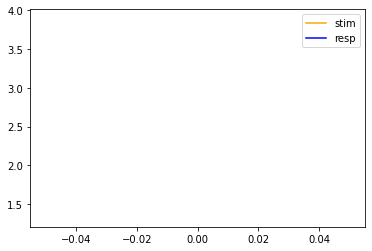

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(2)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
print(tst_corrs)

[[[[9.70127298e-01]
   [9.31354274e-01]
   [7.91402503e-01]]]


 [[[4.28949716e-03]
   [5.62073197e-04]
   [1.90229819e-03]]]]


# Prueba de grupo 1 con RMS

eyedee    : 2
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_2_0_1_0.1_8_0.05_12/
[89.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277828244602 - 0.17275429350488325 = 0.2989523410797119
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.12715965509414673 = 0.3035117983818054
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.12715965509414673 = 0.3035117983818054
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778317507577 - 0.17281441443106707 = 0.2989463210105896
  Validation corr LOSS : 0.3162
0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.794822656408974
CCA Model Ended.
LCCA is : [array(0.79482266), array(0.71850363)]
DMDC corrs are : [0.79482266]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : 0.0123
  Validation CORRELATION : -0.0076
  Test CORRELATION       : -0.0076
  val. loss is : 0.0076 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0082
  Validation CORRELATION : -0.0536
  Test CORRELATION       : -0.0536
  val. loss is : 0.0536 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0093
  Validation CORRELATION : 0.0460
  Test CORRELATION       : 0.0460
  val. loss is : -0.0460 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0077
  Validation CORRELATION : -0.0675
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.07002074, dtype=float32), array(0.07002074, dtype=float32)]
DMDC corrs are : [0.07002074]
DONE speech - block_0_drpt_0.05.
[[[[0.79482266]
   [0.        ]
   [0.        ]]]


 [[[0.07002074]
   [0.        ]
   [0.        ]]]]
[[[[0.71850363]
   [0.        ]
   [0.        ]]]


 [[[0.07002074]
   [0.        ]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778422692244 - 0.17274749471860773 = 0.29895299673080444
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.12713634967803955 = 0.30351412296295166
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.12713634967803955 = 0.30351412296295166
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277786170735 - 0.17281611281

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.7809685652095086
CCA Model Ended.
LCCA is : [array(0.78096857), array(0.69736953)]
DMDC corrs are : [0.78096857]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : -0.0009
  Validation CORRELATION : -0.0288
  Test CORRELATION       : -0.0288
  val. loss is : 0.0288 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0075
  Validation CORRELATION : 0.0229
  Test CORRELATION       : 0.0229
  val. loss is : -0.0229 & the min. loss is : 0.0288
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0130
  Validation CORRELATION : -0.0636
  Test CORRELATION       : -0.0636
  val. loss is : 0.0636 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0150
  Validation CORRELATION : -0.0346


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.08332019, dtype=float32), array(0.08332019, dtype=float32)]
DMDC corrs are : [0.08332019]
DONE speech - block_0_drpt_0.02.
[[[[0.79482266]
   [0.78096857]
   [0.        ]]]


 [[[0.07002074]
   [0.08332019]
   [0.        ]]]]
[[[[0.71850363]
   [0.69736953]
   [0.        ]]]


 [[[0.07002074]
   [0.08332019]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277800195357 - 0.17276893766487347 = 0.2989508807659149
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1272754967212677 = 0.3035002052783966
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1272754967212677 = 0.3035002052783966
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277817726135 - 0.1728171581731123 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8341842607136983
CCA Model Ended.
LCCA is : [array(0.83418426), array(0.76655782)]
DMDC corrs are : [0.83418426]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : 0.0023
  Validation CORRELATION : 0.0033
  Test CORRELATION       : 0.0033
  val. loss is : -0.0033 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0112
  Validation CORRELATION : 0.0487
  Test CORRELATION       : 0.0487
  val. loss is : -0.0487 & the min. loss is : -0.0033
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0113
  Validation CORRELATION : 0.0246
  Test CORRELATION       : 0.0246
  val. loss is : -0.0246 & the min. loss is : -0.0487
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0120
  Validation CORRELATION : 0.0028
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.06621514, dtype=float32), array(0.06621514, dtype=float32)]
DMDC corrs are : [0.06621514]
DONE speech - block_0_drpt_0.2.
[[[[0.79482266]
   [0.78096857]
   [0.83418426]]]


 [[[0.07002074]
   [0.08332019]
   [0.06621514]]]]
[[[[0.71850363]
   [0.69736953]
   [0.76655782]]]


 [[[0.07002074]
   [0.08332019]
   [0.06621514]]]]
saved SPEECH


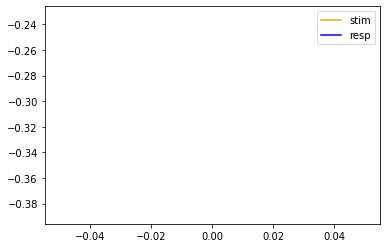

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(2)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data4(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# Prueba de grupo 1 con flujo espectral

eyedee    : 2
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_2_0_1_0.1_8_0.05_17/
[43.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.1, 0.2]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778072076685 - 311657.63272058824 = -31165.447265625
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205757.59375 = -20575.443359375
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205757.59375 = -20575.443359375
  val. loss is : 20575.4434 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778247384464 - 300619.95735294116 = -30061.673828125
  Validation corr LOSS : 0.3162
0.3162277340888977 - 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.15954492360350817
CCA Model Ended.
LCCA is : [array(0.15954492), array(0.15054993)]
DMDC corrs are : [0.15954492]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/cca_functions.py:229: RuntimeWarning: invalid value encountered in true_divide
  x = x / np.sqrt(var)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(nan, dtype=float32), array(nan, dtype=float32)]
DMDC corrs are : [nan]
DONE speech - block_0_drpt_0.05.
[[[[0.15954492]
   [0.        ]
   [0.        ]]]


 [[[       nan]
   [0.        ]
   [0.        ]]]]
[[[[0.15054993]
   [0.        ]
   [0.        ]]]


 [[[       nan]
   [0.        ]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277810713824 - 311669.1617647059 = -31166.599609375
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205767.140625 = -20576.3984375
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205767.140625 = -20576.3984375
  val. loss is : 20576.3984 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277796689202 - 300628.2375 = -30062.51171875
  Validation corr LOSS : 0.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.03253667300974652
CCA Model Ended.
LCCA is : [array(0.03253667), array(0.01921197)]
DMDC corrs are : [0.03253667]
DMCCA + DCCA : block_0_drpt_0.1
DCCA for block_0_drpt_0.1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0000
  Test CORRELATION       : 0.0000
  val. loss is : -0.0000 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : -0.0714
  Test CORRELATION       : -0.0714
  val. loss is : 0.0714 & the min. loss is : -0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : -0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0064
  Validation CORRELATION : -0.0906
  Test CORREL

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.09545118, dtype=float32), array(0.09545118, dtype=float32)]
DMDC corrs are : [0.09545118]
DONE speech - block_0_drpt_0.1.
[[[[0.15954492]
   [0.03253667]
   [0.        ]]]


 [[[       nan]
   [0.09545118]
   [0.        ]]]]
[[[[0.15054993]
   [0.01921197]
   [0.        ]]]


 [[[       nan]
   [0.09545118]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277821232291 - 311680.94227941177 = -31167.78515625
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205776.796875 = -20577.36328125
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205776.796875 = -20577.36328125
  val. loss is : 20577.3633 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277835256913 - 300649.06470588234 = -30064.5859375


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.213062174242681
CCA Model Ended.
LCCA is : [array(0.21306217), array(0.20339272)]
DMDC corrs are : [0.21306217]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0050
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0014
  Validation CORRELATION : -0.0171
  Test CORRELATION       : -0.0171
  val. loss is : 0.0171 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-3.9022707e-06, dtype=float32), array(-3.9022707e-06, dtype=float32)]
DMDC corrs are : [-3.90227069e-06]
DONE speech - block_0_drpt_0.2.
[[[[ 1.59544924e-01]
   [ 3.25366730e-02]
   [ 2.13062174e-01]]]


 [[[            nan]
   [ 9.54511836e-02]
   [-3.90227069e-06]]]]
[[[[ 1.50549934e-01]
   [ 1.92119666e-02]
   [ 2.03392718e-01]]]


 [[[            nan]
   [ 9.54511836e-02]
   [-3.90227069e-06]]]]
saved SPEECH


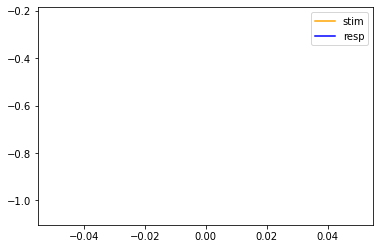

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(2)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.1,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data5(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
lagGen??

# prueba on lo tres metodos en los 4 grupos

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_0_1_0.1_8_0.05_1/
[45.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     45.0
Started training.


/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2500.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277816306977 - 0.6281637994069902 = 0.2534113824367523
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16905555129051208 = 0.299322247505188
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16905555129051208 = 0.299322247505188
  val. loss is : -0.2993 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778068459223 - 0.6280666173450531 = 0.2534211575984955
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16359460353851318 = 0.2998683452606201
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16359460353851318 = 0.2998683452606201
  val. loss is : -0.2999 & the min. loss is : -0.2993
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training corr LOSS   : 0.3162
0.3162277828133295 - 0.6280531097972204 = 0.25342249870300293
  Validation corr 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.98544711894353
CCA Model Ended.
LCCA is : [array(0.98544712), array(0.9361102)]
DMDC corrs are : [0.98544712]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     45.0
EPOCH : 0
  Training CORRELATION   : -0.0025
  Validation CORRELATION : -0.0277
  Test CORRELATION       : -0.0277
  val. loss is : 0.0277 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0120
  Validation CORRELATION : -0.0192
  Test CORRELATION       : -0.0192
  val. loss is : 0.0192 & the min. loss is : 0.0277
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0310
  Test CORRELATION       : 0.0310
  val. loss is : -0.0310 & the min. loss is : 0.0192
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATI

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02457958, dtype=float32), array(0.02457958, dtype=float32)]
DMDC corrs are : [0.02457958]
DONE speech - block_0_drpt_0.05.
[[[[0.98544712]
   [0.        ]]]


 [[[0.02457958]
   [0.        ]]]]
[[[[0.9361102 ]
   [0.        ]]]


 [[[0.02457958]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     45.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622777855585493 - 0.6281299259927537 = 0.2534147799015045
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16935142874717712 = 0.299292653799057
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16935142874717712 = 0.299292653799057
  val. loss is : -0.2993 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277825768032 - 0.6279910216255794 = 0.25342872738838196
  Validation corr LOSS : 0.3162
0.31622779

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9832812757238351
CCA Model Ended.
LCCA is : [array(0.98328128), array(0.93186051)]
DMDC corrs are : [0.98328128]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     45.0
EPOCH : 0
  Training CORRELATION   : -0.0039
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0024
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0003
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0063
  Validation CORRELATION : nan
  Test CORRELAT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(2.1560118e-07, dtype=float32), array(2.1560118e-07, dtype=float32)]
DMDC corrs are : [2.15601176e-07]
DONE speech - block_0_drpt_0.02.
[[[[9.85447119e-01]
   [9.83281276e-01]]]


 [[[2.45795771e-02]
   [2.15601176e-07]]]]
[[[[9.36110200e-01]
   [9.31860513e-01]]]


 [[[2.45795771e-02]
   [2.15601176e-07]]]]
saved SPEECH
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.


ValueError: ignored

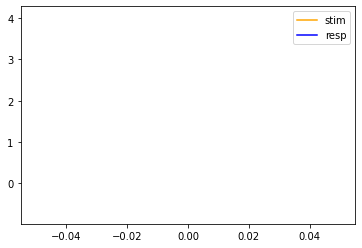

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,5):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(1)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(2)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02,0.2]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(3,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(2)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02,0.2]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba 2 con variación a 80-20

In [ ]:
for tr in range(len(data_subs_pre[0])):
  data_subs_pre[0][tr][np.isnan(data_subs_pre[0][tr])] = 0
sum(sum(np.isnan(data_subs_pre[0][0])))

0

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(80)
  D                = [0.05]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Prubas_finales_2/grupo_cx_componentes_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Prubas_finales_2/grupo_cx_componentes_dmcca_1_0.01_80_0.05/
[29.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05]
num_blocks : 1
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
No trials 271
(59, 171)
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)


In [ ]:
data_subs_pre[0][0][0].shape

(10148, 171)

In [ ]:
data__[0][1][0].shape

(10148, 171)

In [ ]:
sum(sum(data_subs_pre[0][0][0] == data__[0][1][0]))

0

In [ ]:
len(data_subs_pre[0][0])

3

# prueba 2 con variación a 80-20 ALL-EEG

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_eeg_dmcca_1_0.1_8_0.05/
[71.]
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 1
No trials 1238
(961, 19)
TRAIN: [   0    2    3 ... 1235 1236 1237] TEST: [   1    5    8   14   18   39   45   52   55   75   85   92  108  124
  141  142  152  156  161  184  186  192  194  202  224  233  251  254
  270  283  295  298  299  308  311  319  351  361  390  399  412  422
  427  434  443  465  466  467  471  477  492  494  503  505  528  535
  546  569  571  578  583  630  649  654  655  668  671  682  686  689
  699  713  740  746  747  748  773  775  790  793  795  805  829  834
  837  839  840  841  852  858  864  869  875  895  898  902  912  921
  924  935  974  990 1003 1009 1025 1031 1036 1038 1054 1075 1084 

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2499.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847599926 - 0.0034304936070272104 = 0.3158847689628601
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.0034338366240262985 = 0.31588441133499146
torch.Size([118850, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.003438281361013651 = 0.31588393449783325
  val. loss is : -0.3159 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277842597138 - 0.0034316835491705854 = 0.31588470935821533
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.0034349984489381313 = 0.3158842623233795
torch.Size([118850, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.003439441090449691 = 0.3158838450908661
  val. loss is : -0.3159 & the min. loss is : -0.3159
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training corr LOSS   : 0.3162
0.31622778418824543 - 0.0034350651708304238 = 0.31588

0.949628802294942
CCA Model Ended.
LCCA is : [array(0.9496288), array(0.86966122)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9496288]
DMCCA + DCCA : block_2_drpt_0.05_sub_1
DCCA for block_2_drpt_0.05_sub_1_sub_0
seed:     71.0
EPOCH : 0
  Training CORRELATION   : 0.0000
  Validation CORRELATION : -0.0023
  Test CORRELATION       : -0.0010
  val. loss is : 0.0023 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002


RuntimeError: ignored

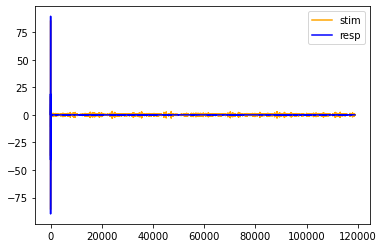

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_eeg_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1,2):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        # data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          # for block in range(num_blocks):
          data_subs_pre=load_dmcca_data_all(subs, mid_shape, type, num_blocks)
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(2,3):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
len(data_subs_pre[0][0][0])

3

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_dmcca_1_0.01_80_0.05/
[48.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 1
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 2
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 3
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 4
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 5
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 6
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 7
stim 271
y_test 216
172 44 55
Stim_trai

0.07808250559366858
CCA Model Ended.
LCCA is : [array(0.07808251), array(0.00451863)]
DMLC corrs are : [0.07808251]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     48.0
EPOCH : 0
  Training CORRELATION   : 0.0133
  Validation CORRELATION : -0.0208
  Test CORRELATION       : -0.0220
  val. loss is : 0.0208 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0201
  Validation CORRELATION : 0.0020
  Test CORRELATION       : 0.0010
  val. loss is : -0.0020 & the min. loss is : 0.0208
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0227
  Validation CORRELATION : 0.0065
  Test CORRELATION       : 0.0027
  val. loss is : -0.0065 & the min. loss is : -0.0020
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0260
  Validation CORRELATION : 0.0110
  Test C

DMDC corrs are : [0.00512515]
DONE speech - block_0_drpt_0.05.
[[[[0.07808251]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00512515]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.00451863]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]


DMLC corrs are : [-0.00186526]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     48.0
EPOCH : 0
  Training CORRELATION   : 0.0165
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0080
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0229
  Validation CORRELATION : 0.0037
  Test CORRELATION       : -0.0094
  val. loss is : -0.0037 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0256
  Validation CORRELATION : 0.0015
  Test CORRELATION       : -0.0076
  val. loss is : -0.0015 & the min. loss is : -0.0037
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0261
  Validation CORRELATION : 0.0007
  Test CORRELATION       : -0.0096
  val. loss is : -0.0007 & the min. loss is : -0.00

KeyboardInterrupt: ignored

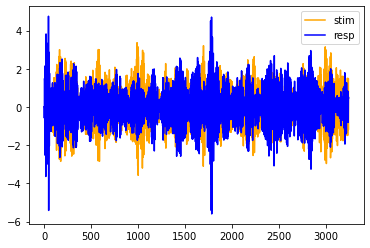

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(80)
  D                = [0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba 2 con variación a 80-20 ALL-Cx

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
import os
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(10)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_7/grupo2_cx_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 31   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1,2):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        # data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          # for block in range(num_blocks):
          data_subs_pre = load_dmcca_data_all_cxs_and_PSD_MUinf(subs, mid_shape, type, 31)
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(len(data_subs_pre)):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
data_subs_pre[0][1][0].shape

(892, 4720)

In [ ]:
for i in data_subs_pre[0]:
  print(i[1].shape)

(224, 10089)
(224, 4720)


# 80-20 sin organizar 

In [ ]:
data_subs_pre[0][0][0].shape

(10148, 171)

In [ ]:
data_subs_pre[0][0][2].shape

(3245, 171)

In [ ]:
tst_corrs.shape

(2, 1, 1, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.5692803500492725

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.5211359890516393

In [ ]:
tst_corrs[0,:,0,0]

array([0.64292856, 0.5404196 , 0.66674185, 0.74066429, 0.56407484,
       0.66524195, 0.33378248, 0.64497042, 0.24489778, 0.64908173])

In [ ]:
val_corrs[0,:,0,0]

array([0.55718854, 0.54370699, 0.61430214, 0.66232406, 0.46088255,
       0.61334867, 0.35404589, 0.52174143, 0.25866177, 0.62515784])

In [ ]:
data_subs_pre[0][1][0].shape

(90401, 8)

# 80-20 organizado

Método 3
eyedee    : 3
best_only : True
epoch_num : 20
dropout   : 0.05
[35.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 269
y_test 215
172 43 54
Stim_train (121573, 1)
Data INITIALIZING for block : 1
stim 269
y_test 215
172 43 54
Stim_train (123434, 1)
Data INITIALIZING for block : 2
stim 269
y_test 215
172 43 54
Stim_train (121766, 1)
Data INITIALIZING for block : 3
stim 269
y_test 215
172 43 54
Stim_train (123682, 1)
Data INITIALIZING for block : 4
stim 269
y_test 215
172 43 54
Stim_train (122713, 1)
Data INITIALIZING for block : 5
stim 269
y_test 215
172 43 54
Stim_train (121790, 1)
Data INITIALIZING for block : 6
stim 269
y_test 215
172 43 54
Stim_train (122382, 1)
Data INITIALIZING for block : 7
stim 269
y_test 215
172 43 54
Stim_train (122255, 1)
Data INITIALIZING for block : 8
stim 269
y_test 215
172 43 54
Stim_train (123742, 1)
Data INITIALIZ

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9981600379153809
CCA Model Ended.
LCCA is : [array(0.99816004), array(0.84224114)]
DMDC corrs are : [0.99816004]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0017
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0004
  val. loss is : 0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0020
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0004
  val. loss is : -0.0001 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0002
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0022
  val. loss is : 0.0001 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0029
  Validation CORRELATION : 0.0000
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00031853, dtype=float32), array(0.00031853, dtype=float32)]
DMDC corrs are : [0.00031853]
DONE speech - block_0_drpt_0.05.
[[[[9.98160038e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[3.18534439e-04]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[8.42241142e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9990113119927851
CCA Model Ended.
LCCA is : [array(0.99901131), array(0.97755352)]
DMDC corrs are : [0.99901131]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0026
  Validation CORRELATION : 0.0004
  Test CORRELATION       : 0.0015
  val. loss is : -0.0004 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0045
  Validation CORRELATION : 0.0036
  Test CORRELATION       : 0.0001
  val. loss is : -0.0036 & the min. loss is : -0.0004
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0017
  Validation CORRELATION : -0.0076
  Test CORRELATION       : 0.0000
  val. loss is : 0.0076 & the min. loss is : -0.0036
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0041
  Validation CORRELATION : 0.0068
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00427742, dtype=float32), array(-0.00427742, dtype=float32)]
DMDC corrs are : [-0.00427742]
DONE speech - block_1_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9974817557863171
CCA Model Ended.
LCCA is : [array(0.99748176), array(0.9813215)]
DMDC corrs are : [0.99748176]
DMCCA + DCCA : block_2_drpt_0.05
DCCA for block_2_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0080
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0014
  val. loss is : 0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0052
  Validation CORRELATION : -0.0001
  Test CORRELATION       : 0.0000
  val. loss is : 0.0001 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0103
  Validation CORRELATION : 0.0010
  Test CORRELATION       : 0.0011
  val. loss is : -0.0010 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0156
  Validation CORRELATION : 0.0048
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00031603, dtype=float32), array(-0.00031603, dtype=float32)]
DMDC corrs are : [-0.00031603]
DONE speech - block_2_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9998163488276789
CCA Model Ended.
LCCA is : [array(0.99981635), array(0.98244427)]
DMDC corrs are : [0.99981635]
DMCCA + DCCA : block_3_drpt_0.05
DCCA for block_3_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0050
  Validation CORRELATION : 0.0024
  Test CORRELATION       : 0.0001
  val. loss is : -0.0024 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0030
  Validation CORRELATION : -0.0090
  Test CORRELATION       : -0.0001
  val. loss is : 0.0090 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0012
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0000
  val. loss is : -0.0001 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0009
  Validation CORRELATION : -0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(3.8805658e-05, dtype=float32), array(3.8805658e-05, dtype=float32)]
DMDC corrs are : [3.88056578e-05]
DONE speech - block_3_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9999394923061231
CCA Model Ended.
LCCA is : [array(0.99993949), array(0.99189629)]
DMDC corrs are : [0.99993949]
DMCCA + DCCA : block_4_drpt_0.05
DCCA for block_4_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0127
  Validation CORRELATION : -0.0009
  Test CORRELATION       : 0.0002
  val. loss is : 0.0009 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0108
  Validation CORRELATION : -0.0004
  Test CORRELATION       : 0.0002
  val. loss is : 0.0004 & the min. loss is : 0.0009
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0082
  Validation CORRELATION : -0.0032
  Test CORRELATION       : 0.0001
  val. loss is : 0.0032 & the min. loss is : 0.0004
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0114
  Validation CORRELATION : 0.0013
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00024235, dtype=float32), array(-0.00024235, dtype=float32)]
DMDC corrs are : [-0.00024235]
DONE speech - block_4_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.99922073]
DMCCA + DCCA : block_5_drpt_0.05
DCCA for block_5_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0054
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0006
  val. loss is : 0.0000 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0045
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0089
  val. loss is : 0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0023
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0049
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0080
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0056
  val. loss is : 0.0000 & the min. loss is : -0.0001
 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.01251784, dtype=float32), array(-0.01251784, dtype=float32)]
DMDC corrs are : [-0.01251784]
DONE speech - block_5_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9981871128821381
CCA Model Ended.
LCCA is : [array(0.99818711), array(0.92935655)]
DMDC corrs are : [0.99818711]
DMCCA + DCCA : block_6_drpt_0.05
DCCA for block_6_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0098
  Validation CORRELATION : -0.0038
  Test CORRELATION       : -0.0001
  val. loss is : 0.0038 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0141
  Validation CORRELATION : 0.0009
  Test CORRELATION       : 0.0000
  val. loss is : -0.0009 & the min. loss is : 0.0038
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0130
  Validation CORRELATION : 0.0048
  Test CORRELATION       : 0.0001
  val. loss is : -0.0048 & the min. loss is : -0.0009
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0097
  Validation CORRELATION : -0.0006
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(9.246681e-05, dtype=float32), array(9.246681e-05, dtype=float32)]
DMDC corrs are : [9.24668129e-05]
DONE speech - block_6_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9935065046489594
CCA Model Ended.
LCCA is : [array(0.9935065), array(0.92830662)]
DMDC corrs are : [0.9935065]
DMCCA + DCCA : block_7_drpt_0.05
DCCA for block_7_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0054
  Validation CORRELATION : 0.0002
  Test CORRELATION       : 0.0004
  val. loss is : -0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0024
  Validation CORRELATION : 0.0005
  Test CORRELATION       : -0.0009
  val. loss is : -0.0005 & the min. loss is : -0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0015
  Validation CORRELATION : 0.0002
  Test CORRELATION       : -0.0001
  val. loss is : -0.0002 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00091357, dtype=float32), array(-0.00091357, dtype=float32)]
DMDC corrs are : [-0.00091357]
DONE speech - block_7_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9921680570211601
CCA Model Ended.
LCCA is : [array(0.99216806), array(0.86838534)]
DMDC corrs are : [0.99216806]
DMCCA + DCCA : block_8_drpt_0.05
DCCA for block_8_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0019
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0002
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0030
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0003
  val. loss is : 0.0000 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0010
  Test CORRELATION       : 0.0042
  val. loss is : -0.0010 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0028
  Validation CORRELATION : -0.0002
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.004192, dtype=float32), array(0.004192, dtype=float32)]
DMDC corrs are : [0.004192]
DONE speech - block_8_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9993922061906109
CCA Model Ended.
LCCA is : [array(0.99939221), array(0.98754013)]
DMDC corrs are : [0.99939221]
DMCCA + DCCA : block_9_drpt_0.05
DCCA for block_9_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0006
  Validation CORRELATION : 0.0003
  Test CORRELATION       : 0.0003
  val. loss is : -0.0003 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0014
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0000
  val. loss is : -0.0001 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0023
  Validation CORRELATION : 0.0056
  Test CORRELATION       : 0.0019
  val. loss is : -0.0056 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0050
  Validation CORRELATION : 0.0003
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00184898, dtype=float32), array(0.00184898, dtype=float32)]
DMDC corrs are : [0.00184898]
DONE speech - block_9_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9996430656611089
CCA Model Ended.
LCCA is : [array(0.99964307), array(0.96598362)]
DMDC corrs are : [0.99964307]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0110
  Validation CORRELATION : 0.0003
  Test CORRELATION       : 0.0002
  val. loss is : -0.0003 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0011
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0021
  val. loss is : 0.0000 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0103
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0001
  val. loss is : 0.0001 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0032
  Validation CORRELATION : 0.000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00553319, dtype=float32), array(-0.00553319, dtype=float32)]
DMDC corrs are : [-0.00553319]
DONE speech - block_0_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9994347564785567
CCA Model Ended.
LCCA is : [array(0.99943476), array(0.98527949)]
DMDC corrs are : [0.99943476]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0087
  Validation CORRELATION : -0.0036
  Test CORRELATION       : -0.0002
  val. loss is : 0.0036 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0023
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0036
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0048
  Validation CORRELATION : -0.0036
  Test CORRELATION       : -0.0000
  val. loss is : 0.0036 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0012


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00045386, dtype=float32), array(0.00045386, dtype=float32)]
DMDC corrs are : [0.00045386]
DONE speech - block_1_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9974610936904545
CCA Model Ended.
LCCA is : [array(0.99746109), array(0.94980014)]
DMDC corrs are : [0.99746109]
DMCCA + DCCA : block_2_drpt_0.02
DCCA for block_2_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0006
  Validation CORRELATION : -0.0039
  Test CORRELATION       : 0.0008
  val. loss is : 0.0039 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0005
  Validation CORRELATION : -0.0016
  Test CORRELATION       : 0.0004
  val. loss is : 0.0016 & the min. loss is : 0.0039
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0008
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : 0.0016
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0150
  Validation CORRELATION : -0.0031
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00212136, dtype=float32), array(0.00212136, dtype=float32)]
DMDC corrs are : [0.00212136]
DONE speech - block_2_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.99272387]
DMCCA + DCCA : block_3_drpt_0.02
DCCA for block_3_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0014
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0002
  val. loss is : -0.0001 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0138
  Validation CORRELATION : -0.0022
  Test CORRELATION       : 0.0002
  val. loss is : 0.0022 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0049
  Validation CORRELATION : 0.0054
  Test CORRELATION       : -0.0002
  val. loss is : -0.0054 & the min. loss is : -0.00

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00023558, dtype=float32), array(-0.00023558, dtype=float32)]
DMDC corrs are : [-0.00023558]
DONE speech - block_3_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9956886089783767
CCA Model Ended.
LCCA is : [array(0.99568861), array(0.97812585)]
DMDC corrs are : [0.99568861]
DMCCA + DCCA : block_4_drpt_0.02
DCCA for block_4_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0056
  Validation CORRELATION : -0.0076
  Test CORRELATION       : 0.0005
  val. loss is : 0.0076 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.0002
  Test CORRELATION       : 0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0017
  Validation CORRELATION : 0.0006
  Test CORRELATION       : 0.0001
  val. loss is : -0.0006 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0434
  Validation CORRELATION : -0.0045
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(3.4701152e-05, dtype=float32), array(3.4701152e-05, dtype=float32)]
DMDC corrs are : [3.47011519e-05]
DONE speech - block_4_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.848

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9999402034371109
CCA Model Ended.
LCCA is : [array(0.9999402), array(0.98753999)]
DMDC corrs are : [0.9999402]
DMCCA + DCCA : block_5_drpt_0.02
DCCA for block_5_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0003
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0057
  val. loss is : 0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0015
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0000
  val. loss is : 0.0002 & the min. loss is : 0.0005
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0099
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0009
  Validation CORRELATION : -0.0000
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00757364, dtype=float32), array(-0.00757364, dtype=float32)]
DMDC corrs are : [-0.00757364]
DONE speech - block_5_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9997667085853656
CCA Model Ended.
LCCA is : [array(0.99976671), array(0.98827017)]
DMDC corrs are : [0.99976671]
DMCCA + DCCA : block_6_drpt_0.02
DCCA for block_6_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0004
  Test CORRELATION       : 0.0015
  val. loss is : 0.0004 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0030
  Validation CORRELATION : 0.0024
  Test CORRELATION       : -0.0034
  val. loss is : -0.0024 & the min. loss is : 0.0004
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0001
  Test CORRELATION       : 0.0000
  val. loss is : 0.0001 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0000
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00151995, dtype=float32), array(-0.00151995, dtype=float32)]
DMDC corrs are : [-0.00151995]
DONE speech - block_6_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9960918075362936
CCA Model Ended.
LCCA is : [array(0.99609181), array(0.9542864)]
DMDC corrs are : [0.99609181]
DMCCA + DCCA : block_7_drpt_0.02
DCCA for block_7_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0090
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0003
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0047
  Validation CORRELATION : 0.0003
  Test CORRELATION       : -0.0005
  val. loss is : -0.0003 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0002
  Test CORRELATION       : -0.0001
  val. loss is : -0.0002 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0062
  Validation CORRELATION : -0.0000
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00023747, dtype=float32), array(-0.00023747, dtype=float32)]
DMDC corrs are : [-0.00023747]
DONE speech - block_7_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9948421864987491
CCA Model Ended.
LCCA is : [array(0.99484219), array(0.93094857)]
DMDC corrs are : [0.99484219]
DMCCA + DCCA : block_8_drpt_0.02
DCCA for block_8_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0009
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0001
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0024
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0001
  val. loss is : -0.0001 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0005
  val. loss is : 0.0000 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0030
  Validation CORRELATION : -0.0000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00073592, dtype=float32), array(0.00073592, dtype=float32)]
DMDC corrs are : [0.00073592]
DONE speech - block_8_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 9.94842186e-01]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 7.35916838e-04]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9982117496289817
CCA Model Ended.
LCCA is : [array(0.99821175), array(0.94385347)]
DMDC corrs are : [0.99821175]
DMCCA + DCCA : block_9_drpt_0.02
DCCA for block_9_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0039
  Validation CORRELATION : 0.0021
  Test CORRELATION       : 0.0064
  val. loss is : -0.0021 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : -0.0021
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0004
  Test CORRELATION       : 0.0002
  val. loss is : -0.0004 & the min. loss is : -0.0021
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0044
  Validation CORRELATION : -0.0000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00517265, dtype=float32), array(0.00517265, dtype=float32)]
DMDC corrs are : [0.00517265]
DONE speech - block_9_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 9.94842186e-01]]

  [[ 9.99392206e-01]
   [ 9.98211750e-01]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 7.35916838e-04]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9989664682515571
CCA Model Ended.
LCCA is : [array(0.99896647), array(0.94598669)]
DMDC corrs are : [0.99896647]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0005
  Test CORRELATION       : 0.0001
  val. loss is : -0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0044
  Validation CORRELATION : -0.0005
  Test CORRELATION       : -0.0000
  val. loss is : 0.0005 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0046
  Validation CORRELATION : 0.0007
  Test CORRELATION       : -0.0001
  val. loss is : -0.0007 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0035
  Validation CORRELATION : -0.0004
 

RuntimeError: ignored

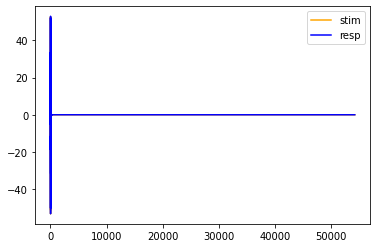

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(3,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
      # path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      # i = i + 1
  # del i
      os.mkdir(path_name)
      print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
            
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
data_subs_pre[0][1][0].shape

(155359, 8)

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.4854182773014032

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.4903429691307405

In [ ]:
tst_corrs[0,:,0,0]

array([0.32581398, 0.7106275 , 0.28615628, 0.63181812, 0.63728037,
       0.64725187, 0.13211255, 0.71718648, 0.73392018, 0.03201544])

In [ ]:
val_corrs[0,:,0,0]

array([0.36238739, 0.62641036, 0.31016445, 0.60540909, 0.62901815,
       0.69910934, 0.13605003, 0.67455066, 0.69992073, 0.16040948])

# RMS

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_5_10_0.01_8_0.05/
[37.]
Grupo 3
n_subs     : 1
subs       : [3]
D          : [0.05]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 205
y_test 164
131 33 41
Stim_train (125730, 1)
Data INITIALIZING for block : 1
stim 205
y_test 164
131 33 41
Stim_train (125803, 1)
Data INITIALIZING for block : 2
stim 205
y_test 164
131 33 41
Stim_train (125734, 1)
Data INITIALIZING for block : 3
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 4
stim 205
y_test 164
131 33 41
Stim_train (125573, 1)
Data INITIALIZING for block : 5
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 6
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 7
stim 205
y_test 164
131 33 41
Stim_train (125487, 1)
Data INITIAL

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4158038342104171
CCA Model Ended.
LCCA is : [array(0.41580383), array(0.42028759)]
DMDC corrs are : [0.41580383]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     37.0
EPOCH : 0
  Training CORRELATION   : 0.0037
  Validation CORRELATION : 0.0060
  Test CORRELATION       : -0.0234
  val. loss is : -0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0048


RuntimeError: ignored

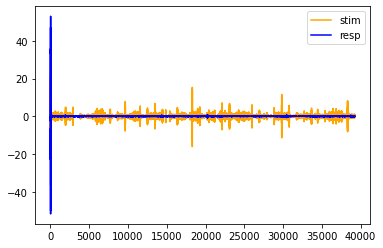

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results_type2 = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.
      results = list()
      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(3,4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      
  results_type2.append(results)
  results_name = f'{path_name}/results_{str(type)}.npy'
  np.save(results_name, results_type2)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
results_type2.append(results)
results_name = f'{path_name}/results_{str(type)}.npy'
np.save(results_name, results_type2)

In [ ]:
results_type2

[[[array([[[[ 4.94259618e-01],
            [ 5.79059549e-01]],
   
           [[ 2.67989644e-01],
            [ 2.65496012e-01]],
   
           [[ 3.24437745e-01],
            [ 3.44213146e-01]],
   
           [[ 2.41177555e-01],
            [ 2.89817173e-01]],
   
           [[ 5.96824701e-01],
            [ 6.86218289e-01]],
   
           [[ 1.79731718e-01],
            [ 1.70578254e-01]],
   
           [[ 4.53690196e-01],
            [ 2.97717838e-01]],
   
           [[ 5.99590342e-01],
            [ 7.23538129e-01]],
   
           [[ 4.45116117e-01],
            [ 6.61020268e-01]],
   
           [[ 3.70130445e-01],
            [ 4.23085679e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-

In [ ]:
import numpy as np
results_type2 = [[[np.array([[[[ 4.94259618e-01],
            [ 5.79059549e-01]],
   
           [[ 2.67989644e-01],
            [ 2.65496012e-01]],
   
           [[ 3.24437745e-01],
            [ 3.44213146e-01]],
   
           [[ 2.41177555e-01],
            [ 2.89817173e-01]],
   
           [[ 5.96824701e-01],
            [ 6.86218289e-01]],
   
           [[ 1.79731718e-01],
            [ 1.70578254e-01]],
   
           [[ 4.53690196e-01],
            [ 2.97717838e-01]],
   
           [[ 5.99590342e-01],
            [ 7.23538129e-01]],
   
           [[ 4.45116117e-01],
            [ 6.61020268e-01]],
   
           [[ 3.70130445e-01],
            [ 4.23085679e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-05]],
   
           [[ 2.37902743e-03],
            [-6.11808500e-04]],
   
           [[-7.10096769e-03],
            [-1.35152694e-02]],
   
           [[-5.47311315e-03],
            [-1.61148496e-02]],
   
           [[-6.77838689e-03],
            [ 5.22545399e-03]],
   
           [[-1.47149526e-02],
            [ 1.44529482e-02]]]]), np.array([[[[ 4.91887041e-01],
            [ 5.91875076e-01]],
   
           [[ 3.18471027e-01],
            [ 3.28324843e-01]],
   
           [[ 3.25336266e-01],
            [ 3.47133830e-01]],
   
           [[ 2.15814693e-01],
            [ 2.45180265e-01]],
   
           [[ 6.54061771e-01],
            [ 7.53555812e-01]],
   
           [[ 2.10111605e-01],
            [ 1.94534437e-01]],
   
           [[ 4.32654183e-01],
            [ 3.18362918e-01]],
   
           [[ 6.03324676e-01],
            [ 7.69781211e-01]],
   
           [[ 4.81631007e-01],
            [ 6.84012820e-01]],
   
           [[ 3.94119298e-01],
            [ 4.34081105e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-05]],
   
           [[ 2.37902743e-03],
            [-6.11808500e-04]],
   
           [[-7.10096769e-03],
            [-1.35152694e-02]],
   
           [[-5.47311315e-03],
            [-1.61148496e-02]],
   
           [[-6.77838689e-03],
            [ 5.22545399e-03]],
   
           [[-1.47149526e-02],
            [ 1.44529482e-02]]]])], [np.array([[[[ 2.83751913e-01],
            [ 2.20468240e-01]],
   
           [[ 7.48356582e-01],
            [ 8.49683306e-01]],
   
           [[ 4.05920376e-01],
            [ 7.05919869e-01]],
   
           [[ 3.74309156e-01],
            [ 6.66037087e-01]],
   
           [[ 2.12901058e-01],
            [ 2.79943985e-01]],
   
           [[ 4.05565628e-01],
            [ 6.35066378e-01]],
   
           [[ 4.05066274e-01],
            [ 6.94198655e-01]],
   
           [[ 4.14458309e-01],
            [ 7.44570614e-01]],
   
           [[ 6.87099377e-01],
            [ 8.33332687e-01]],
   
           [[ 3.36246781e-01],
            [ 3.65580436e-01]]],
   
   
          [[[ 5.23004960e-03],
            [ 8.89487751e-03]],
   
           [[ 3.67678655e-03],
            [ 9.92756337e-03]],
   
           [[ 1.97990052e-03],
            [ 3.03623849e-03]],
   
           [[ 2.61926022e-03],
            [ 1.22158183e-03]],
   
           [[-8.80183280e-03],
            [-2.60536117e-03]],
   
           [[ 5.88233722e-03],
            [ 4.83655138e-03]],
   
           [[ 4.28667711e-03],
            [ 6.53783651e-03]],
   
           [[ 3.31309927e-03],
            [-3.70150339e-03]],
   
           [[ 2.08121864e-03],
            [-5.39159111e-04]],
   
           [[-1.84088964e-02],
            [-3.66601138e-03]]]]), np.array([[[[ 3.04921304e-01],
            [ 2.58697534e-01]],
   
           [[ 7.20581961e-01],
            [ 8.20266684e-01]],
   
           [[ 4.17078693e-01],
            [ 7.14439883e-01]],
   
           [[ 3.76333739e-01],
            [ 6.75025061e-01]],
   
           [[ 2.33836684e-01],
            [ 3.07513292e-01]],
   
           [[ 4.64536950e-01],
            [ 7.16800254e-01]],
   
           [[ 4.61437819e-01],
            [ 7.61779138e-01]],
   
           [[ 3.96914132e-01],
            [ 7.32742934e-01]],
   
           [[ 6.12943601e-01],
            [ 7.67193073e-01]],
   
           [[ 3.92232757e-01],
            [ 4.06168187e-01]]],
   
   
          [[[ 5.23004960e-03],
            [ 8.89487751e-03]],
   
           [[ 3.67678655e-03],
            [ 9.92756337e-03]],
   
           [[ 1.97990052e-03],
            [ 3.03623849e-03]],
   
           [[ 2.61926022e-03],
            [ 1.22158183e-03]],
   
           [[-8.80183280e-03],
            [-2.60536117e-03]],
   
           [[ 5.88233722e-03],
            [ 4.83655138e-03]],
   
           [[ 4.28667711e-03],
            [ 6.53783651e-03]],
   
           [[ 3.31309927e-03],
            [-3.70150339e-03]],
   
           [[ 2.08121864e-03],
            [-5.39159111e-04]],
   
           [[-1.84088964e-02],
            [-3.66601138e-03]]]])], [np.array([[[[ 5.97154459e-01],
            [ 7.06972036e-01]],
   
           [[ 4.45388574e-01],
            [ 3.52329558e-01]],
   
           [[ 3.94146210e-01],
            [ 3.86931862e-01]],
   
           [[ 3.93798282e-01],
            [ 5.77830242e-01]],
   
           [[ 4.06979821e-01],
            [ 7.98702512e-01]],
   
           [[ 4.76202140e-01],
            [ 8.31538614e-01]],
   
           [[ 7.03062195e-01],
            [ 7.83827674e-01]],
   
           [[ 4.01428263e-01],
            [ 7.31885707e-01]],
   
           [[ 3.08113940e-01],
            [ 4.09294190e-01]],
   
           [[ 2.20380767e-01],
            [ 4.41711356e-01]]],
   
   
          [[[ 8.93880334e-03],
            [-8.55403603e-04]],
   
           [[-2.98513379e-03],
            [ 3.14573990e-03]],
   
           [[-1.39431413e-02],
            [-1.01239495e-02]],
   
           [[ 1.65602323e-02],
            [ 9.16025427e-04]],
   
           [[ 6.23173267e-03],
            [-4.00091894e-03]],
   
           [[-3.73121002e-03],
            [-2.87920493e-03]],
   
           [[ 3.23006175e-02],
            [ 1.34551395e-02]],
   
           [[-4.85806540e-03],
            [-1.72517803e-02]],
   
           [[-3.16303084e-03],
            [ 2.06793635e-03]],
   
           [[ 2.72791870e-02],
            [-5.41542948e-04]]]]), np.array([[[[ 5.93669034e-01],
            [ 7.13702923e-01]],
   
           [[ 5.42515474e-01],
            [ 4.46237040e-01]],
   
           [[ 4.66189166e-01],
            [ 4.39808350e-01]],
   
           [[ 4.28963348e-01],
            [ 6.16440149e-01]],
   
           [[ 5.54692022e-01],
            [ 7.70461999e-01]],
   
           [[ 5.12501657e-01],
            [ 8.55344873e-01]],
   
           [[ 7.24423356e-01],
            [ 7.34022370e-01]],
   
           [[ 3.88923290e-01],
            [ 6.98618658e-01]],
   
           [[ 3.04763787e-01],
            [ 4.23407802e-01]],
   
           [[ 2.52981937e-01],
            [ 5.19600671e-01]]],
   
   
          [[[ 8.93880334e-03],
            [-8.55403603e-04]],
   
           [[-2.98513379e-03],
            [ 3.14573990e-03]],
   
           [[-1.39431413e-02],
            [-1.01239495e-02]],
   
           [[ 1.65602323e-02],
            [ 9.16025427e-04]],
   
           [[ 6.23173267e-03],
            [-4.00091894e-03]],
   
           [[-3.73121002e-03],
            [-2.87920493e-03]],
   
           [[ 3.23006175e-02],
            [ 1.34551395e-02]],
   
           [[-4.85806540e-03],
            [-1.72517803e-02]],
   
           [[-3.16303084e-03],
            [ 2.06793635e-03]],
   
           [[ 2.72791870e-02],
            [-5.41542948e-04]]]])], [np.array([[[[ 0.27047712],
            [ 0.27769075]],
   
           [[ 0.51018498],
            [ 0.73955962]],
   
           [[ 0.3563054 ],
            [ 0.38679034]],
   
           [[ 0.38260686],
            [ 0.41377217]],
   
           [[ 0.18036123],
            [ 0.24240422]],
   
           [[ 0.31140761],
            [ 0.35863455]],
   
           [[ 0.55904585],
            [ 0.61151175]],
   
           [[ 0.37271205],
            [ 0.3901318 ]],
   
           [[ 0.39896191],
            [ 0.42359755]],
   
           [[ 0.27126981],
            [ 0.79545193]]],
   
   
          [[[ 0.00741817],
            [-0.00580089]],
   
           [[ 0.00667923],
            [-0.00933049]],
   
           [[ 0.00931477],
            [ 0.00860611]],
   
           [[ 0.01767049],
            [-0.05301914]],
   
           [[ 0.04044234],
            [ 0.01158386]],
   
           [[ 0.00153484],
            [ 0.00403161]],
   
           [[-0.00905639],
            [ 0.01750603]],
   
           [[ 0.00701124],
            [ 0.01899123]],
   
           [[ 0.01718635],
            [ 0.00454506]],
   
           [[-0.00858871],
            [ 0.02624677]]]]), np.array([[[[ 0.21852548],
            [ 0.22370762]],
   
           [[ 0.5186394 ],
            [ 0.73029161]],
   
           [[ 0.37386977],
            [ 0.40748311]],
   
           [[ 0.33791077],
            [ 0.3624945 ]],
   
           [[ 0.29485751],
            [ 0.3623007 ]],
   
           [[ 0.20893159],
            [ 0.46194727]],
   
           [[ 0.55585835],
            [ 0.60940802]],
   
           [[ 0.44275511],
            [ 0.42187102]],
   
           [[ 0.41816027],
            [ 0.47744724]],
   
           [[ 0.30148462],
            [ 0.76686753]]],
   
   
          [[[ 0.00741817],
            [-0.00580089]],
   
           [[ 0.00667923],
            [-0.00933049]],
   
           [[ 0.00931477],
            [ 0.00860611]],
   
           [[ 0.01767049],
            [-0.05301914]],
   
           [[ 0.04044234],
            [ 0.01158386]],
   
           [[ 0.00153484],
            [ 0.00403161]],
   
           [[-0.00905639],
            [ 0.01750603]],
   
           [[ 0.00701124],
            [ 0.01899123]],
   
           [[ 0.01718635],
            [ 0.00454506]],
   
           [[-0.00858871],
            [ 0.02624677]]]])]]]

In [ ]:
len(results_type2[0])

4

In [ ]:
np.mean(results_type2[0][2][0][0,:,0,0])

0.4346654651

In [ ]:
np.mean(results_type2[0][3][0][0,:,0,0])

0.36133328200000003

# 80-20 organizado

In [ ]:
data_subs_pre[0][1][0].shape

(155359, 8)

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.49195455464798615

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.49137048314316256

In [ ]:
tst_corrs[0,:,0,0]

array([0.39993089, 0.39327756, 0.59244889, 0.5691353 , 0.63333561,
       0.4081389 , 0.47815258, 0.4851035 , 0.52413746, 0.43588486])

In [ ]:
val_corrs[0,:,0,0]

array([0.35045887, 0.44065526, 0.52919204, 0.54193274, 0.65220043,
       0.43283592, 0.47189807, 0.49252803, 0.54225904, 0.45974442])

# prueba organizando el CV

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_5_10_0.1_8_0.05_42/
[52.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


TRAIN: [ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Stim_train (185952, 1)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  44  45  46

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     52.0
Started training.


/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2500.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778288610687 - 0.6153053477570251 = 0.25469720363616943
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.41133183240890503 = 0.275094598531723
torch.Size([51737, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.592204749584198 = 0.25700730085372925
  val. loss is : -0.2751 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277786286323 - 0.6153691076970362 = 0.25469091534614563
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.4152040183544159 = 0.2747073769569397
torch.Size([51737, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.5880674123764038 = 0.2574210464954376
  val. loss is : -0.2747 & the min. loss is : -0.2751
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training corr LOSS   : 0.3162
0.3162277789561303 - 0.6152601602313282 = 0.25470176339149475
  Validat

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.35982062008882126
CCA Model Ended.
LCCA is : [array(0.35982062), array(0.54489863)]
DMDC corrs are : [0.35982062]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0067
  Validation CORRELATION : 0.0042
  Test CORRELATION       : 0.0073
  val. loss is : -0.0042 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0103
  Validation CORRELATION : 0.0067
  Test CORRELATION       : 0.0057
  val. loss is : -0.0067 & the min. loss is : -0.0042
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0112
  Validation CORRELATION : 0.0044
  Test CORRELATION       : -0.0072
  val. loss is : -0.0044 & the min. loss is : -0.0067
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0101
  Validation CORRELATION : -0.0413


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00146905, dtype=float32), array(0.00146905, dtype=float32)]
DMDC corrs are : [0.00146905]
DONE speech - block_0_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.23208322819651633
CCA Model Ended.
LCCA is : [array(0.23208323), array(0.35568044)]
DMDC corrs are : [0.23208323]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0061
  Validation CORRELATION : 0.0022
  Test CORRELATION       : 0.0015
  val. loss is : -0.0022 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0090
  Validation CORRELATION : 0.0089
  Test CORRELATION       : 0.0006
  val. loss is : -0.0089 & the min. loss is : -0.0022
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0046
  Test CORRELATION       : -0.0004
  val. loss is : -0.0046 & the min. loss is : -0.0089
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0132
  Validation CORRELATION : 0.0056
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00242969, dtype=float32), array(0.00242969, dtype=float32)]
DMDC corrs are : [0.00242969]
DONE speech - block_1_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.13276178754232515
CCA Model Ended.
LCCA is : [array(0.13276179), array(0.2118918)]
DMDC corrs are : [0.13276179]
DMCCA + DCCA : block_2_drpt_0.05
DCCA for block_2_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0055
  Validation CORRELATION : -0.0008
  Test CORRELATION       : 0.0177
  val. loss is : 0.0008 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0148
  Validation CORRELATION : 0.0168
  Test CORRELATION       : -0.0080
  val. loss is : -0.0168 & the min. loss is : 0.0008
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0049
  Validation CORRELATION : 0.0380
  Test CORRELATION       : 0.0028
  val. loss is : -0.0380 & the min. loss is : -0.0168
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0037
  Validation CORRELATION : 0.0089
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00275761, dtype=float32), array(0.00275761, dtype=float32)]
DMDC corrs are : [0.00275761]
DONE speech - block_2_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.13276179]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.00275761]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.2118918 ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.6317235986545434
CCA Model Ended.
LCCA is : [array(0.6317236), array(0.76730598)]
DMDC corrs are : [0.6317236]
DMCCA + DCCA : block_3_drpt_0.05
DCCA for block_3_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0084
  Validation CORRELATION : 0.0188
  Test CORRELATION       : 0.0084
  val. loss is : -0.0188 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0006
  Test CORRELATION       : -0.0042
  val. loss is : 0.0006 & the min. loss is : -0.0188
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0063
  Validation CORRELATION : 0.0026
  Test CORRELATION       : 0.0014
  val. loss is : -0.0026 & the min. loss is : -0.0188
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0005
  Validation CORRELATION : -0.0110
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00837454, dtype=float32), array(0.00837454, dtype=float32)]
DMDC corrs are : [0.00837454]
DONE speech - block_3_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.13276179]
   [0.        ]]

  [[0.6317236 ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.00275761]
   [0.        ]]

  [[0.00837454]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.2118918 ]
   [0.        ]]

  [[0.76730598]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4064149910255206
CCA Model Ended.
LCCA is : [array(0.40641499), array(0.61867052)]
DMDC corrs are : [0.40641499]
DMCCA + DCCA : block_4_drpt_0.05
DCCA for block_4_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0030
  Validation CORRELATION : 0.0229
  Test CORRELATION       : 0.0054
  val. loss is : -0.0229 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002
  Validation CORRELATION : 0.0208
  Test CORRELATION       : -0.0036
  val. loss is : -0.0208 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0308
  Test CORRELATION       : -0.0084
  val. loss is : 0.0308 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0045
  Validation CORRELATION : 0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(4.5303594e-05, dtype=float32), array(4.5303594e-05, dtype=float32)]
DMDC corrs are : [4.53035937e-05]
DONE speech - block_4_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.13493420935856687
CCA Model Ended.
LCCA is : [array(0.13493421), array(0.22855312)]
DMDC corrs are : [0.13493421]
DMCCA + DCCA : block_5_drpt_0.05
DCCA for block_5_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0051
  Validation CORRELATION : -0.0002
  Test CORRELATION       : 0.0112
  val. loss is : 0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0108
  Validation CORRELATION : 0.0015
  Test CORRELATION       : 0.0055
  val. loss is : -0.0015 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0116
  Validation CORRELATION : 0.0097
  Test CORRELATION       : -0.0024
  val. loss is : -0.0097 & the min. loss is : -0.0015
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0127
  Validation CORRELATION : 0.0039
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01540646, dtype=float32), array(0.01540646, dtype=float32)]
DMDC corrs are : [0.01540646]
DONE speech - block_5_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[1.34934209e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[1.54064633e-02]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5.44898628e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5115358658705289
CCA Model Ended.
LCCA is : [array(0.51153587), array(0.64591052)]
DMDC corrs are : [0.51153587]
DMCCA + DCCA : block_6_drpt_0.05
DCCA for block_6_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0006
  Validation CORRELATION : -0.0100
  Test CORRELATION       : -0.0075
  val. loss is : 0.0100 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0120
  Validation CORRELATION : -0.0357
  Test CORRELATION       : 0.0033
  val. loss is : 0.0357 & the min. loss is : 0.0100
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0050
  Validation CORRELATION : 0.0346
  Test CORRELATION       : 0.0081
  val. loss is : -0.0346 & the min. loss is : 0.0100
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0049
  Validation CORRELATION : 0.0153
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00239628, dtype=float32), array(0.00239628, dtype=float32)]
DMDC corrs are : [0.00239628]
DONE speech - block_6_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[1.34934209e-01]
   [0.00000000e+00]]

  [[5.11535866e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[1.54064633e-02]
   [0.00000000e+00]]

  [[2.39627738e-03]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5.44898628e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.45194371295216423
CCA Model Ended.
LCCA is : [array(0.45194371), array(0.6538816)]
DMDC corrs are : [0.45194371]
DMCCA + DCCA : block_7_drpt_0.05
DCCA for block_7_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0075
  Validation CORRELATION : -0.0056
  Test CORRELATION       : -0.0020
  val. loss is : 0.0056 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0088
  Validation CORRELATION : -0.0314
  Test CORRELATION       : 0.0050
  val. loss is : 0.0314 & the min. loss is : 0.0056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0038
  Validation CORRELATION : -0.0240
  Test CORRELATION       : 0.0026
  val. loss is : 0.0240 & the min. loss is : 0.0056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.00

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00111251, dtype=float32), array(-0.00111251, dtype=float32)]
DMDC corrs are : [-0.00111251]
DONE speech - block_7_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.0883932145293422
CCA Model Ended.
LCCA is : [array(0.08839321), array(0.17914058)]
DMDC corrs are : [0.08839321]
DMCCA + DCCA : block_8_drpt_0.05
DCCA for block_8_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0158
  Validation CORRELATION : -0.0095
  Test CORRELATION       : 0.0153
  val. loss is : 0.0095 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0156
  Validation CORRELATION : -0.0089
  Test CORRELATION       : 0.0049
  val. loss is : 0.0089 & the min. loss is : 0.0095
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0186
  Validation CORRELATION : -0.0067
  Test CORRELATION       : -0.0007
  val. loss is : 0.0067 & the min. loss is : 0.0089
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0018
  Validation CORRELATION : -0.0055
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00606, dtype=float32), array(-0.00606, dtype=float32)]
DMDC corrs are : [-0.00606]
DONE speech - block_8_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.07693655994873871
CCA Model Ended.
LCCA is : [array(0.07693656), array(0.12128948)]
DMDC corrs are : [0.07693656]
DMCCA + DCCA : block_9_drpt_0.05
DCCA for block_9_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0211
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0117
  val. loss is : 0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0006
  Validation CORRELATION : -0.0106
  Test CORRELATION       : 0.0130
  val. loss is : 0.0106 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0036
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0176
  val. loss is : 0.0005 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0107
  Validation CORRELATION : -0.0021
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01607017, dtype=float32), array(0.01607017, dtype=float32)]
DMDC corrs are : [0.01607017]
DONE speech - block_9_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2657080103627259
CCA Model Ended.
LCCA is : [array(0.26570801), array(0.43331805)]
DMDC corrs are : [0.26570801]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0135
  Validation CORRELATION : -0.0504
  Test CORRELATION       : 0.0166
  val. loss is : 0.0504 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0033
  Test CORRELATION       : -0.0034
  val. loss is : 0.0033 & the min. loss is : 0.0504
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0047
  Validation CORRELATION : 0.0100
  Test CORRELATION       : 0.0024
  val. loss is : -0.0100 & the min. loss is : 0.0033
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0001
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00601635, dtype=float32), array(0.00601635, dtype=float32)]
DMDC corrs are : [0.00601635]
DONE speech - block_0_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2455184846437196
CCA Model Ended.
LCCA is : [array(0.24551848), array(0.38604506)]
DMDC corrs are : [0.24551848]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0082
  Validation CORRELATION : 0.0050
  Test CORRELATION       : 0.0117
  val. loss is : -0.0050 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0041
  Validation CORRELATION : 0.0024
  Test CORRELATION       : 0.0091
  val. loss is : -0.0024 & the min. loss is : -0.0050
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0032
  Validation CORRELATION : -0.0097
  Test CORRELATION       : 0.0136
  val. loss is : 0.0097 & the min. loss is : -0.0050
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0162
  Validation CORRELATION : -0.0018

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01462967, dtype=float32), array(0.01462967, dtype=float32)]
DMDC corrs are : [0.01462967]
DONE speech - block_1_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.17194163378173724
CCA Model Ended.
LCCA is : [array(0.17194163), array(0.29152511)]
DMDC corrs are : [0.17194163]
DMCCA + DCCA : block_2_drpt_0.02
DCCA for block_2_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0037
  Validation CORRELATION : -0.0300
  Test CORRELATION       : 0.0046
  val. loss is : 0.0300 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0056
  Validation CORRELATION : -0.0342
  Test CORRELATION       : -0.0079
  val. loss is : 0.0342 & the min. loss is : 0.0300
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0038
  Validation CORRELATION : -0.0261
  Test CORRELATION       : 0.0044
  val. loss is : 0.0261 & the min. loss is : 0.0300
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0007
  Validation CORRELATION : -0.0315
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.0136972, dtype=float32), array(0.0136972, dtype=float32)]
DMDC corrs are : [0.0136972]
DONE speech - block_2_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.6134387779546301
CCA Model Ended.
LCCA is : [array(0.61343878), array(0.75086548)]
DMDC corrs are : [0.61343878]
DMCCA + DCCA : block_3_drpt_0.02
DCCA for block_3_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0092
  Validation CORRELATION : -0.0269
  Test CORRELATION       : 0.0024
  val. loss is : 0.0269 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002
  Validation CORRELATION : 0.0334
  Test CORRELATION       : -0.0009
  val. loss is : -0.0334 & the min. loss is : 0.0269
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0002
  Test CORRELATION       : 0.0005
  val. loss is : -0.0002 & the min. loss is : -0.0334
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02311615, dtype=float32), array(0.02311615, dtype=float32)]
DMDC corrs are : [0.02311615]
DONE speech - block_3_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5157013614427716
CCA Model Ended.
LCCA is : [array(0.51570136), array(0.70247893)]
DMDC corrs are : [0.51570136]
DMCCA + DCCA : block_4_drpt_0.02
DCCA for block_4_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0038
  Validation CORRELATION : -0.0254
  Test CORRELATION       : 0.0031
  val. loss is : 0.0254 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0056
  Validation CORRELATION : -0.0181
  Test CORRELATION       : 0.0017
  val. loss is : 0.0181 & the min. loss is : 0.0254
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0000
  val. loss is : -0.0001 & the min. loss is : 0.0181
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0042
  Validation CORRELATION : 0.0234
  Test CORR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00625481, dtype=float32), array(0.00625481, dtype=float32)]
DMDC corrs are : [0.00625481]
DONE speech - block_4_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.1485721684466299
CCA Model Ended.
LCCA is : [array(0.14857217), array(0.29393785)]
DMDC corrs are : [0.14857217]
DMCCA + DCCA : block_5_drpt_0.02
DCCA for block_5_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0057
  Validation CORRELATION : -0.0074
  Test CORRELATION       : 0.0047
  val. loss is : 0.0074 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0033
  Validation CORRELATION : 0.0008
  Test CORRELATION       : 0.0077
  val. loss is : -0.0008 & the min. loss is : 0.0074
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0122
  Validation CORRELATION : -0.0043
  Test CORRELATION       : 0.0079
  val. loss is : 0.0043 & the min. loss is : -0.0008
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0041
  Validation CORRELATION : 0.0077
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00487272, dtype=float32), array(-0.00487272, dtype=float32)]
DMDC corrs are : [-0.00487272]
DONE speech - block_5_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.48509595923293286
CCA Model Ended.
LCCA is : [array(0.48509596), array(0.61834897)]
DMDC corrs are : [0.48509596]
DMCCA + DCCA : block_6_drpt_0.02
DCCA for block_6_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0035
  Validation CORRELATION : -0.0010
  Test CORRELATION       : 0.0021
  val. loss is : 0.0010 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0052
  Validation CORRELATION : -0.0059
  Test CORRELATION       : 0.0034
  val. loss is : 0.0059 & the min. loss is : 0.0010
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0004
  Test CORRELATION       : -0.0016
  val. loss is : -0.0004 & the min. loss is : 0.0010
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0076
  Validation CORRELATION : 0.0079
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00859677, dtype=float32), array(-0.00859677, dtype=float32)]
DMDC corrs are : [-0.00859677]
DONE speech - block_6_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2665032937441899
CCA Model Ended.
LCCA is : [array(0.26650329), array(0.41411359)]
DMDC corrs are : [0.26650329]
DMCCA + DCCA : block_7_drpt_0.02
DCCA for block_7_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0040
  Validation CORRELATION : 0.0110
  Test CORRELATION       : 0.0048
  val. loss is : -0.0110 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0141
  Validation CORRELATION : 0.0124
  Test CORRELATION       : 0.0047
  val. loss is : -0.0124 & the min. loss is : -0.0110
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0051
  Validation CORRELATION : 0.0099
  Test CORRELATION       : -0.0003
  val. loss is : -0.0099 & the min. loss is : -0.0124
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0008
  Validation CORRELATION : -0.0229
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00062566, dtype=float32), array(0.00062566, dtype=float32)]
DMDC corrs are : [0.00062566]
DONE speech - block_7_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5670110099101062
CCA Model Ended.
LCCA is : [array(0.56701101), array(0.61572093)]
DMDC corrs are : [0.56701101]
DMCCA + DCCA : block_8_drpt_0.02
DCCA for block_8_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0183
  Validation CORRELATION : 0.0776
  Test CORRELATION       : 0.0412
  val. loss is : -0.0776 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0153
  Validation CORRELATION : 0.0467
  Test CORRELATION       : 0.0070
  val. loss is : -0.0467 & the min. loss is : -0.0776
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : -0.0776
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0059
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.04300904, dtype=float32), array(0.04300904, dtype=float32)]
DMDC corrs are : [0.04300904]
DONE speech - block_8_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 5.67011010e-01]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 4.30090390e-02]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.13599451]
DMCCA + DCCA : block_9_drpt_0.02
DCCA for block_9_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0201
  Validation CORRELATION : 0.0093
  Test CORRELATION       : 0.0208
  val. loss is : -0.0093 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0049
  Validation CORRELATION : -0.0080
  Test CORRELATION       : 0.0179
  val. loss is : 0.0080 & the min. loss is : -0.0093
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0001
  Validation CORRELATION : 0.0071
  Test CORRELATION       : 0.0192
  val. loss is : -0.0071 & the min. loss is : -0.0093
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0042
  Validation CORRELATION : -0.0037
  Test CORRELATION       : 0.0179
  val. loss is : 0.0037 & the min. loss is : -0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01891714, dtype=float32), array(0.01891714, dtype=float32)]
DMDC corrs are : [0.01891714]
DONE speech - block_9_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 5.67011010e-01]]

  [[ 7.69365599e-02]
   [ 1.35994512e-01]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 4.30090390e-02]]

  [[ 1.60701666e-02]

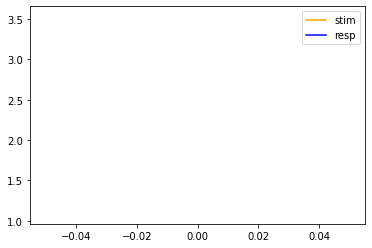

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          block = 0
          data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
          np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.30265477881670677

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.4327222667717686

In [ ]:
tst_corrs[0,:,0,0]

array([0.35982062, 0.23208323, 0.13276179, 0.6317236 , 0.40641499,
       0.13493421, 0.51153587, 0.45194371, 0.08839321, 0.07693656])

In [ ]:
val_corrs[0,:,0,0]

array([0.54489863, 0.35568044, 0.2118918 , 0.76730598, 0.61867052,
       0.22855312, 0.64591052, 0.6538816 , 0.17914058, 0.12128948])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X





list(y)


[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

X_train



array([[8, 9],
       [0, 1],
       [6, 7]])

In [ ]:
! pip install mido
! pip install rtmidi

     |████████████████████████████████| 51 kB 408 kB/s 
  Created wheel for rtmidi: filename=rtmidi-2.3.4-cp37-cp37m-linux_x86_64.whl size=277949 sha256=024337c14846502f4387d650906c2e2c3f8c4f33edd11d0a915574bc48512605
  Stored in directory: /root/.cache/pip/wheels/ac/28/8d/f3e2513e88bd3b33b43ad287c81816cdfdce1f30d23d59d124
Successfully built rtmidi


In [ ]:
import mido

middleC = 60
msg = mido.Message('note_on', note=middleC, velocity=64)
outport = mido.open_output('IAC Driver pioneer')
outport.send(msg)

# load model cca CX, organiza datos rotados

In [ ]:
Cx_sub = list()
Corr_sub = list()

cv_t = list()
for type in range(1,2):
  Cx_ = list()
  cv_s = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  for subs_ in range(4):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)  # ID OF THE EXPERIMENT.
    o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(80)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par   = 1e-4
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset   = "speech"
    num_blocks = 10 # numero de folds
    wei_cx = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx (1).mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx (1).mat")["matriz_selec"]
    elif type ==2:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx.mat")["matriz_selec"]
    elif type ==3:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["matriz_selec"]
    elif type ==4:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx.mat")["matriz_selec"]
    
    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    # for d_cnt, dropout in enumerate(D):
    for block in range(num_blocks):
      datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
      x_train_, x_test_ = train_test_split(datos_, test_size= 0.2,random_state=block)
      # print(x_train_)
      # x_train, x_test = train_test_split(resp_data, test_size= 0.2,random_state=block)
      # print('resp_data '+str(len(resp_data)))
      # print("X_train "+str(len(x_train)))
      # validation is now 80-20% of the initial data set
      x_train, x_val = train_test_split(x_train_, test_size=0.2, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(np.reshape(train,(len(x_train),resp_data[0].shape[0],resp_data[0].shape[1])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(np.reshape(val,(len(x_val),resp_data[0].shape[0],resp_data[0].shape[1])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(np.reshape(test,(len(x_test_),resp_data[0].shape[0],resp_data[0].shape[1])))
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,59,171))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:,:]
    
      lista_data_fold.append(lista_ord_data)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)

cv_sujetos = list()
datos_fold_ = list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  mat2 = cv_s[1][fold].reshape([31,40])
  mat3 = cv_s[2][fold].reshape([31,40])
  mat4 = cv_s[3][fold].reshape([31,40])
  cv_sujetos.append(mat1+mat2+mat3+mat4)
  datos_fold =list()
  for tr in range(1240):
    datos_fold.append(lista_data_sub[0][fold][tr,:,:]+lista_data_sub[1][fold][tr,:,:]+\
                      lista_data_sub[2][fold][tr,:,:]+lista_data_sub[3][fold][tr,:,:])
  datos_fold_.append(datos_fold)

In [ ]:
datos_fold_[0][0].shape == datos_fold_[1][0].shape

True

In [ ]:
len(datos_fold_[0])

1240

# load model cca Cx

In [ ]:
Cx_sub   = list()
Corr_sub = list()
M_sub    = list()
cv_t = list()
for type in range(1,5):
  Cx_    = list()
  cv_s   = list()
  m_     = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  for subs_ in range(1,2):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)  # ID OF THE EXPERIMENT.
    o_dim  = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(80)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par    = 1e-4
    folder_path= "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    path_name  = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset    = "speech"
    num_blocks = 10 # numero de folds
    wei_cx = list()
    wei_m  = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
    elif type ==2:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
    elif type ==3:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
    elif type ==4:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
    
    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # for d_cnt, dropout in enumerate(D):
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    block =0
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    for train_index, test_index in kf.split(datos_):
      # print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_[train_index], datos_[test_index]
      # y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val = train_test_split(X_train_, test_size=1 - 0.8, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      wei_m.append(model.state_dict()['enc_net0.sec.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(np.reshape(train,(len(x_train),resp_data[0].shape[0],resp_data[0].shape[1])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(np.reshape(val,(len(x_val),resp_data[0].shape[0],resp_data[0].shape[1])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(np.reshape(test,(len(x_test_),resp_data[0].shape[0],resp_data[0].shape[1])))
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
      block+=1
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    m_.append(np.asarray(wei_m))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,59,171))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:,:]
    
      lista_data_fold.append(lista_ord_data)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)
  M_sub.append(m_)
cv_sujetos = list()
datos_fold_ = list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  # mat2 = cv_s[fold].reshape([31,40])
  # mat3 = cv_s[fold].reshape([31,40])
  # mat4 = cv_s[fold].reshape([31,40])
  cv_sujetos.append(mat1)
  datos_fold = np.zeros((lista_data_sub[0][fold].shape))
  for tr in range(1240):
    datos_fold[tr,:,:] = lista_data_sub[0][fold][tr,:,:]
  datos_fold_.append(datos_fold)

# load Cx version 2

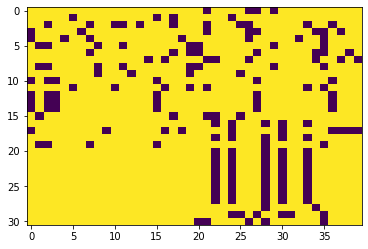

(1019,)
(36,)
(1019,)
(36,)
(1026,)
(29,)
(1023,)
(32,)
(1022,)
(33,)
(1023,)
(32,)
(1023,)
(32,)
(1023,)
(32,)
(1023,)
(32,)
(1019,)
(36,)
(1021,)
(34,)
(1022,)
(33,)
(1021,)
(34,)
(1021,)
(34,)
(1021,)
(34,)
(1020,)
(35,)
(1020,)
(35,)
(1025,)
(30,)
(1020,)
(35,)
(1021,)
(34,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1020,)
(35,)
(1017,)
(38,)
(1021,)
(34,)
(1020,)
(35,)


In [ ]:
Cx_sub   = list()
Corr_sub = list()
M_sub    = list()
cv_t = list()
for type in range(1,2):
  Cx_    = list()
  cv_s   = list()
  m_     = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  lista_data_sub_s = list()
  for subs_ in range(1,2):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)      # ID OF THE EXPERIMENT.
    o_dim  = int(1)         # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(10)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par    = 1e-4
    folder_path= "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_7/grupo2_cx_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    path_name  = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset    = "speech"
    num_blocks = 31 # numero de folds
    wei_cx = list()
    wei_m  = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
      # indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
    # elif type ==2:
    #   resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
    #   indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
    # elif type ==3:
    #   resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
    #   indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
    # elif type ==4:
    #   resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
    #   indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
    
    # folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here

    # data_psd = scipy.io.loadmat(folder_path+f"/PSD_data_music2.mat")['Data_pow']
    # data_psd = data_psd[:,:,:4,:,:]
    # # data_psd = data_psd.reshape([data_psd.shape[0]*data_psd.shape[1],\
    #                               # data_psd.shape[2]*data_psd.shape[3]*data_psd.shape[4]])
    # print(data_psd.shape)
    # data_PLV_ = scipy.io.loadmat(folder_path+f"/PLV_all_subs31_music2.mat")['PLV']
    # data_PLV = np.zeros((data_PLV_.shape[0],data_PLV_.shape[1],19,7,data_PLV_.shape[4]))
    # for a1 in range(data_PLV_.shape[0]):
    #   for a2 in range(data_PLV_.shape[1]):
    #     for a3 in range(7):
    #       for a4 in range(data_PLV_.shape[4]):
    #         data_PLV[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_PLV_[a1,a2,:,a3,a4]))
    # data_PLV = data_PLV[:,:,:,:4,:]
    # del data_PLV_
    # # data_PLV = data_PLV.reshape([data_PLV.shape[0]*data_PLV.shape[1],\
    #                               # data_PLV.shape[2]*data_PLV.shape[3]*data_PLV.shape[4]])
    # print(data_PLV.shape)
    # data_gauss_ = scipy.io.loadmat(folder_path+f"/conectividad_gauss.mat")['gaus']
    # data_gauss = np.zeros((data_gauss_.shape[0],data_gauss_.shape[1],19,data_gauss_.shape[3],data_gauss_.shape[4]))
    # for a1 in range(data_gauss_.shape[0]):
    #   for a2 in range(data_gauss_.shape[1]):
    #     for a3 in range(data_gauss_.shape[3]):
    #       for a4 in range(data_gauss_.shape[4]):
    #         data_gauss[a1,a2,:,a3,a4] =  bct.strengths_und(squareform(data_gauss_[a1,a2,:,a3,a4]))
    # del data_gauss_
    # data_gauss = data_gauss[:,:,:,:4,:]
    # data_gauss1 = data_gauss.reshape([data_gauss.shape[0]*data_gauss.shape[1],\
    #                                   data_gauss.shape[2]*data_gauss.shape[3]*data_gauss.shape[4]])
    # print(data_gauss.shape)
    # data_pac = list()
    # for s in range(31):
    #   data_pac.append(scipy.io.loadmat(folder_path+f"PLV_pac_music{s}_trials.mat")['temporal_plv'])
    # data_pac_ = np.asarray(data_pac)
    # del data_pac
    # data_pac = np.zeros((data_pac_.shape[0],data_pac_.shape[1],19,data_pac_.shape[3],data_pac_.shape[4],data_pac_.shape[5]))
    # for a1 in range(data_pac_.shape[0]):
    #   for a2 in range(data_pac_.shape[1]):
    #     for a3 in range(data_pac_.shape[3]):
    #       for a4 in range(data_pac_.shape[4]):
    #         for a5 in range(data_pac_.shape[5]):
    #           data_pac[a1,a2,:,a3,a4,a5] = bct.strengths_und(squareform(data_pac_[a1,a2,:,a3,a4,a5]))
    # data_pac = data_pac[:,:,:,:4,:4,:]
    # del data_pac_
    # data_pac1 = data_pac.reshape([data_pac.shape[0]*data_pac.shape[1],\
    #                               data_pac.shape[2]*data_pac.shape[3]*data_pac.shape[4]*data_pac.shape[5]])
    # print(data_pac.shape)
    # data_MuInf = scipy.io.loadmat(folder_path+'/mutual_inf_music2.mat')['Muinf']
    # data_MuInf = np.transpose(data_MuInf,[0,2,1,3])
    # data_MuInf = data_MuInf[:,:,:4,:]
    # data_MuInf1 = data_MuInf.reshape([data_MuInf.shape[0]*data_MuInf.shape[1],\
    #                                   data_MuInf.shape[2]*data_MuInf.shape[3]])
    # print(data_MuInf.shape)

    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    train_s= list()
    val_s  = list() # estandar escaler 
    test_s = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # for d_cnt, dropout in enumerate(D):
    # datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    block =0
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    ind_s = np.arange(0,1240,40)
    
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    # datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord_all.mat")["datos"]
    datos_stim_[np.isnan(datos_stim_)]=0
    tr_cu      = loadmat(folder_path_+'/Trials_cuadrantes.mat')['trial_ord']
    tr_1 = tr_cu==1
    tr_2 = tr_cu==2
    tr_3 = tr_cu==3
    tr_4 = tr_cu==4
    tr_all = tr_1+tr_2+tr_3+tr_4
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,25,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    plt.imshow(tr_all,aspect='auto')
    plt.show()
    tr_all   = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))
    
    # datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
    # datos_stim = datos_stim[:,:,:,2:5,:]
    # datos_r2 = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*3*datos_stim.shape[4]])

    for subj in range(31):
      train_index_  = tr_all.astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.zeros((1240)).astype(bool)
      test_index_[ind_s[subj]:ind_s[subj]+40] = True
      test_index_ = test_index_*tr_all
      # train_index_[ind_s[subj]:ind_s[subj]+40] = False
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)

      # print(test_index.shape)
    # for train_index, test_index in kf.split(datos_):
      # print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_[train_index], datos_[test_index]
      # y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val = train_test_split(X_train_, test_size=1 - 0.8, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      wei_m.append(model.state_dict()['enc_nets.sec.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      # eeg
      datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(train)#np.reshape(train,(len(train),datos_stim.shape[2],3,datos_stim.shape[4])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(val)#np.reshape(val,(len(val),datos_stim.shape[2],3,datos_stim.shape[4])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(test)#np.reshape(test,(len(test),datos_stim.shape[2],3,datos_stim.shape[4])))
      # music
      # train_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][1]
      # train_s.append(train_stim)
      # val_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][1]
      # val_s.append(val_stim)
      # test_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][1]
      # test_s.append(test_stim)
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
      block+=1
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    m_.append(np.asarray(wei_m))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = tr_all#np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    lista_data_fold_s = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,2660))#np.zeros((1240,datos_stim.shape[2],3,datos_stim.shape[4]))
      lista_ord_data_s = np.zeros((1240,2880))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr,:] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:]
          # lista_ord_data_s[tr,:] = train_s[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr,:] = val_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:]
          # lista_ord_data_s[tr,:] = val_s[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr,:] = test_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:]
          # lista_ord_data_s[tr,:] = test_s[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:]
    
      lista_data_fold.append(lista_ord_data)
      # lista_data_fold_s.append(lista_ord_data_s)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    # lista_data_sub_s.append(lista_data_fold_s)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)
  M_sub.append(m_)
cv_sujetos = list()
datos_fold_ = list()
# datos_fold_ss=list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  # mat2 = cv_s[fold].reshape([31,40])
  # mat3 = cv_s[fold].reshape([31,40])
  # mat4 = cv_s[fold].reshape([31,40])
  cv_sujetos.append(mat1)
  datos_fold = np.zeros((lista_data_sub[0][fold].shape))
  # datos_fold_s = np.zeros((lista_data_sub_s[0][fold].shape))
  for tr in range(1240):
    datos_fold[tr,:] = lista_data_sub[0][fold][tr,:] 
    # datos_fold_s[tr,:] = lista_data_sub_s[0][fold][tr,:]
  datos_fold_.append(datos_fold)
  # datos_fold_ss.append(datos_fold_s)
del lista_data_sub, lista_ord_data, datos_ind_2,mat1, lista_data_fold
# del lista_data_sub_s, lista_ord_data_s, lista_data_fold_s,datos_fold_s

In [ ]:
del lista_data_fold_s,datos_fold_s

In [ ]:
pkl.load(open(f'{path_name}/speech_dmcca_data_block_{0}_drpt_0.05_sub_{1}.pkl', 'rb'))[2][1][1].shape

(40, 944)

In [ ]:
train_stim.shape

(960, 2880)

In [ ]:
np.mean(Corr_sub[0][0][0,:,0,0])

0.9986929877920668

In [ ]:
M_sub[0][0].shape

(10, 80, 80)

In [ ]:
model.state_dict()['enc_net0.one.weight'].shape

torch.Size([16, 10089])

In [ ]:
model.state_dict()['enc_nets.one.weight'].shape

torch.Size([16, 944])

In [ ]:
enc_nets.one.weight

In [ ]:
datos_fold_[0].shape

(1240, 59, 171)

In [ ]:
cv_sujetos[0].shape

(31, 40)

In [ ]:
cv_s[0][fold]

array([0., 1., 2., ..., 1., 2., 1.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

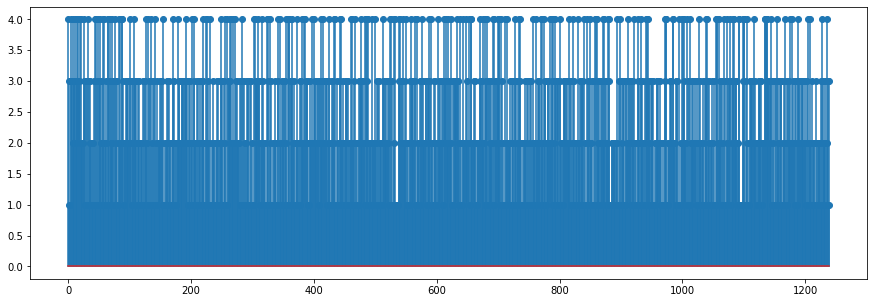

In [ ]:
plt.figure(figsize=(15,5))
plt.stem(indx_s[0]+indx_s[1]+indx_s[2]+indx_s[3])

In [ ]:
len(train_)

In [ ]:
sum(cv_s[0][0]>0)

270

In [ ]:
indx_s[0]

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
datos_ind_[tr]

In [ ]:
posi

In [ ]:
aa = 0
datos_ind_2= np.zeros((1240))
ind_ = np.sort(cv[fold][0].astype(int))
for tr in range(posi.shape[0]):
  if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 1
  elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 2
  elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 3

In [ ]:
datos_ind_2

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
ind_

In [ ]:
posi

In [ ]:
aa= 0
for tr in range(posi.shape[0]):
  ind_ = np.sort(cv[fold][0].astype(int))
  for tr_ in range(ind_.shape[0]):
    if ind_[tr_] == posi[tr]:


In [ ]:
cv[0][1].shape[0]

44

In [ ]:
datos_ind_2[6]

0.0

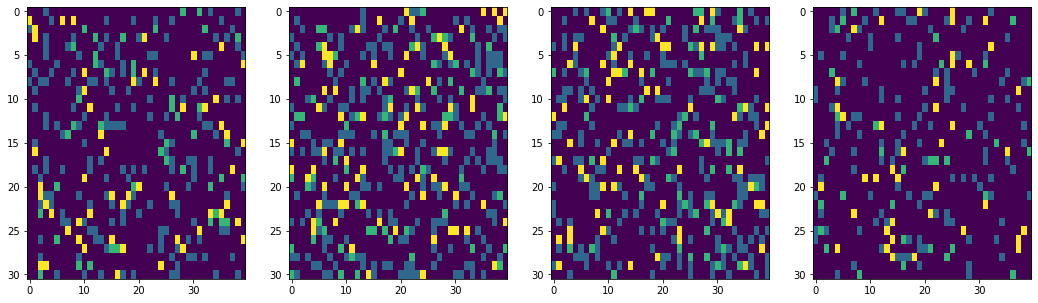

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(18,5))
ax[0].imshow(cv_s[0][0].reshape([31,40]),aspect='auto')
ax[1].imshow(cv_s[1][0].reshape([31,40]),aspect='auto')
ax[2].imshow(cv_s[2][0].reshape([31,40]),aspect='auto')
ax[3].imshow(cv_s[3][0].reshape([31,40]),aspect='auto')

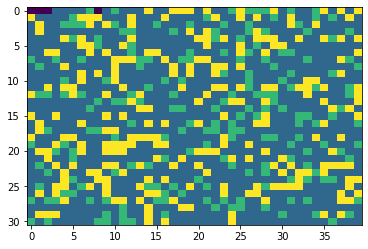

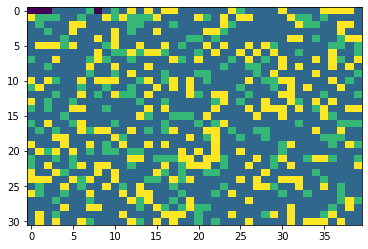

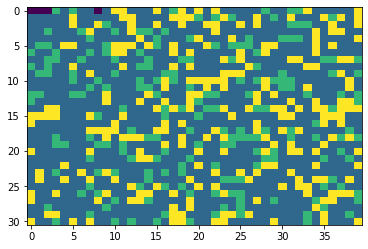

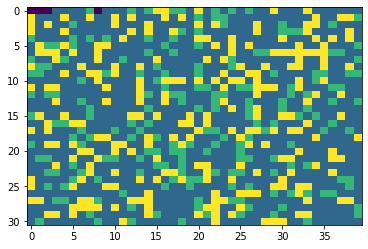

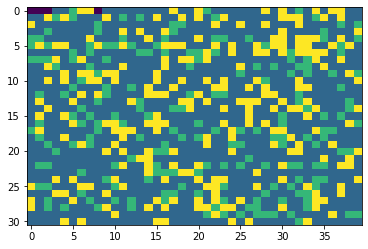

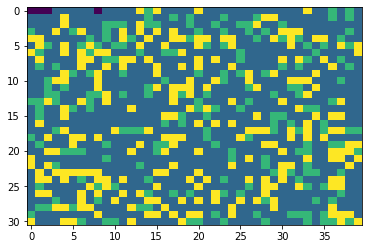

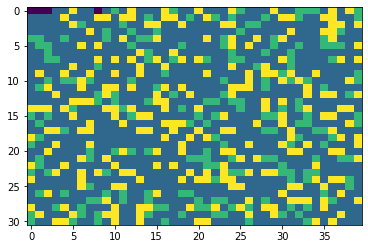

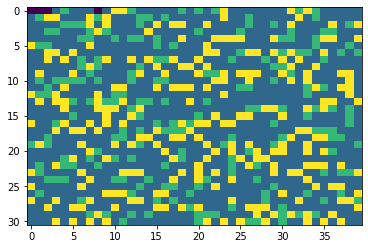

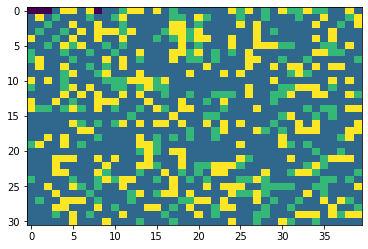

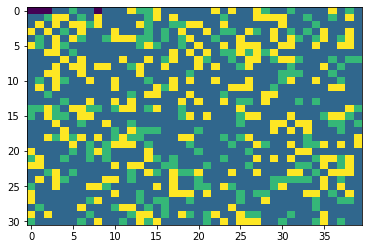

In [ ]:
for fold in range(10):
  mat1 = cv_s[0][fold].reshape([31,40])
  mat2 = cv_s[1][fold].reshape([31,40])
  mat3 = cv_s[2][fold].reshape([31,40])
  mat4 = cv_s[3][fold].reshape([31,40])
  plt.figure()
  plt.imshow(mat1+mat2+mat3+mat4,aspect='auto')

In [ ]:
model

dmcca_model_n_resp_1_stim(
  (drp): Dropout(p=0.05, inplace=False)
  (enc_net0): enc_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (one): Linear(in_features=10089, out_features=16, bias=True)
    (sec): Linear(in_features=16, out_features=16, bias=True)
    (thr): Linear(in_features=16, out_features=10, bias=True)
  )
  (dec_net0): dec_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (de1): Linear(in_features=20, out_features=16, bias=True)
    (de2): Linear(in_features=16, out_features=110, bias=True)
    (de3): Linear(in_features=110, out_features=10089, bias=True)
  )
  (enc_nets): enc_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (one): Linear(in_features=944, out_features=16, bias=True)
    (sec): Linear(in_features=16, out_features=16, bias=True)
    (thr): Linear(in_featur

In [ ]:
model.state_dict()

# topoplot mne 

In [ ]:
!pip install -U mne
!pip install bctpy

  Using cached mne-0.24.1-py3-none-any.whl (7.4 MB)
  Attempting uninstall: mne
    Found existing installation: mne 0.19.0
    Uninstalling mne-0.19.0:
      Successfully uninstalled mne-0.19.0


In [ ]:
import mne

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

## todo el tiempo

In [ ]:
Cx_sub[0][0].shape

(31, 16, 10089)

In [ ]:
Cx_sub[0][0].shape

(31, 16, 10089)

In [ ]:
resp_data[0].shape

(59, 171)

In [ ]:
dat_gauss = np.mean(np.mean(Cx_sub[0][0],axis=1),axis=0)
dat_gauss = np.reshape(dat_gauss,(dim_gauss[2:]))
dat_gauss.shape
dat_gauss_ = np.zeros((dat_gauss.shape[0],dat_gauss.shape[1],16))
for win in range(16):
  dat_gauss_[:,:,win] = np.mean(dat_gauss[:,:,win:win+4],axis=2)

In [ ]:
data_gauss3 = np.mean(np.mean(data_PLV,axis=1),axis=0)
data_gauss3.shape

(19, 7, 20)

In [ ]:
Cx_topo_ = np.zeros((1,4,3,23,19))
for type in range(len(Cx_sub)):
  for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    Cx_topo = np.zeros((Cx_sub[type][subs_].shape[0],Cx_sub[type][subs_].shape[1],3,23,19))
    for fold in range(Cx_sub[type][subs_].shape[0]):
      for dim in range(Cx_sub[type][subs_].shape[1]):
        for fr in range(3):
          Conx = Cx_sub[type][subs_][fold,dim,:]
          Conx = np.reshape(Conx,(datos_stim.shape[2],3,datos_stim.shape[4]))
          for win in range(23):
            Cx_topo[fold,dim,fr,win,:] = bct.strengths_und(squareform(Conx[:,fr,win]))
    Cx_topo_[subs_,type,:,:,:] = np.squeeze(np.mean(np.squeeze(np.mean(Cx_topo,axis=0)),axis=0))
max_cx = np.max(np.max(np.max(Cx_topo_)))
max_cx_= np.max(np.max(Cx_topo_,axis=1),axis=1)
min_cx = np.min(np.min(np.min(Cx_topo_)))

In [ ]:
Cx_topo_ = np.zeros((4,4,19))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    Cx_topo = np.zeros((Cx_sub[subs_][type].shape[0],Cx_sub[subs_][type].shape[1],19))
    for fold in range(Cx_sub[subs_][type].shape[0]):
      for dim in range(Cx_sub[subs_][type].shape[1]):
        Cx_topo[fold,dim,:] = bct.strengths_und(squareform(Cx_sub[subs_][type][fold,dim,:]))
    Cx_topo_[subs_,type,:] = np.squeeze(np.mean(np.squeeze(np.mean(Cx_topo,axis=0)),axis=0))
max_cx = np.max(np.max(np.max(Cx_topo_)))
max_cx_= np.max(np.max(Cx_topo_,axis=1),axis=1)
min_cx = np.min(np.min(np.min(Cx_topo_)))

In [ ]:
max_cx

0.05372735061377171

In [ ]:
np.max(np.max(Cx_topo_,axis=1),axis=1).shape

(4,)

In [ ]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, ...
    chs : list | 19 items (EEG: 19)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 19
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subje

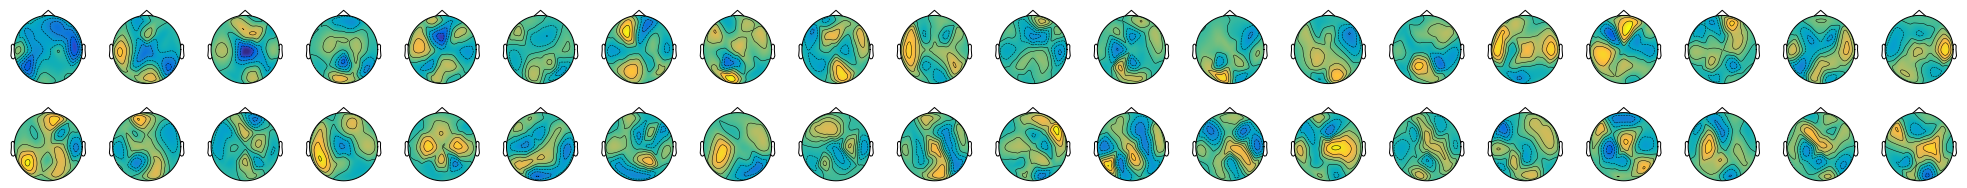

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
S_ERP = loadmat(load_path + f"Sujeto_"+str(1)+".mat")
data = S_ERP['music']
# data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
data_target = data

# structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')
raw = mne.EpochsArray(data_target, info)
biosemi_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(biosemi_montage)
itr = 1
fig = plt.figure(figsize=(35,3))
# for type in range(len(Cx_sub)):
  # for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
min_cx = np.min(np.min(np.min(dat_gauss[:,2:4,:])))
max_cx = np.max(np.max(np.max(dat_gauss[:,2:4,:])))
for fr in range(2):
  for win in range(20):
    ax  = fig.add_subplot(2,20,itr)
    itr +=1
    mne.viz.plot_topomap(dat_gauss[:,fr+2,win],raw.info, axes=ax, cmap=parula_map, 
                        show=False, sensors=False, extrapolate='head',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Todos')
    # if subs_ == 1 and type == 0:
    #   ax.set_title('Grupo 2')
    # if subs_ == 2 and type == 0:
    #   ax.set_title('Grupo 3')
      # if subs_ == 3 and type == 0:
      #   ax.set_title('Grupo 4')
      # if subs_ == 0 and type == 0:
      #   ax.set_ylabel('env')
      # if subs_ == 0 and type == 1:
      #   ax.set_ylabel('RMS')
      # if subs_ == 0 and type == 2:
      #   ax.set_ylabel('Spectral')
      # if subs_ == 0 and type == 3:
      #   ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

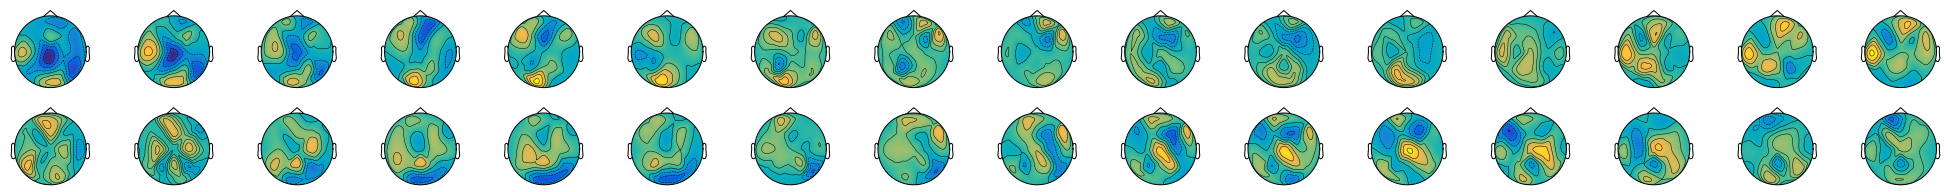

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
S_ERP = loadmat(load_path + f"Sujeto_"+str(1)+".mat")
data = S_ERP['music']
# data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
data_target = data

# structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')
raw = mne.EpochsArray(data_target, info)
biosemi_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(biosemi_montage)
itr = 1
fig = plt.figure(figsize=(35,3))
# for type in range(len(Cx_sub)):
  # for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
min_cx = np.min(np.min(np.min(dat_gauss_[:,2:4,:])))
max_cx = np.max(np.max(np.max(dat_gauss_[:,2:4,:])))
for fr in range(2):
  for win in range(16):
    ax  = fig.add_subplot(2,16,itr)
    itr +=1
    mne.viz.plot_topomap(dat_gauss_[:,fr+2,win],raw.info, axes=ax, cmap=parula_map, 
                        show=False, sensors=False, extrapolate='head',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Todos')
    # if subs_ == 1 and type == 0:
    #   ax.set_title('Grupo 2')
    # if subs_ == 2 and type == 0:
    #   ax.set_title('Grupo 3')
      # if subs_ == 3 and type == 0:
      #   ax.set_title('Grupo 4')
      # if subs_ == 0 and type == 0:
      #   ax.set_ylabel('env')
      # if subs_ == 0 and type == 1:
      #   ax.set_ylabel('RMS')
      # if subs_ == 0 and type == 2:
      #   ax.set_ylabel('Spectral')
      # if subs_ == 0 and type == 3:
      #   ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

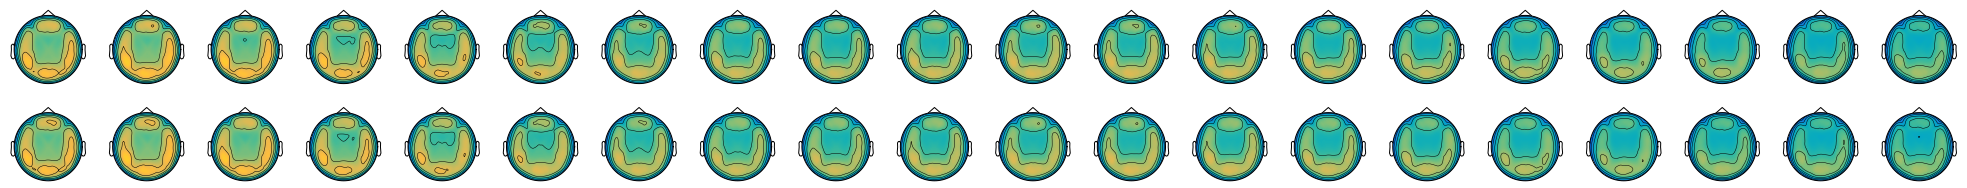

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
S_ERP = loadmat(load_path + f"Sujeto_"+str(1)+".mat")
data = S_ERP['music']
# data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
data_target = data

# structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')
raw = mne.EpochsArray(data_target, info)
biosemi_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(biosemi_montage)
itr = 1
fig = plt.figure(figsize=(35,3))
# for type in range(len(Cx_sub)):
  # for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
min_cx = np.min(np.min(np.min(data_gauss3[:,2:4,:])))
max_cx = np.max(np.max(np.max(data_gauss3[:,2:4,:])))
# data_gauss3 = data_gauss3/max_cx
for fr in range(2):
  for win in range(20):
    ax  = fig.add_subplot(2,20,itr)
    itr +=1
    mne.viz.plot_topomap(data_gauss3[:,fr+2,win],raw.info, axes=ax, cmap=parula_map, 
                        show=False, sensors=False, extrapolate='head',vmin=0,vmax=max_cx+4.5)
    # if subs_ == 0 and type == 0:
      # ax.set_title('Todos')
    # if subs_ == 1 and type == 0:
    #   ax.set_title('Grupo 2')
    # if subs_ == 2 and type == 0:
    #   ax.set_title('Grupo 3')
      # if subs_ == 3 and type == 0:
      #   ax.set_title('Grupo 4')
      # if subs_ == 0 and type == 0:
      #   ax.set_ylabel('env')
      # if subs_ == 0 and type == 1:
      #   ax.set_ylabel('RMS')
      # if subs_ == 0 and type == 2:
      #   ax.set_ylabel('Spectral')
      # if subs_ == 0 and type == 3:
      #   ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

In [ ]:
# channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            # 'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
# n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
itr = 1
fig = plt.figure(figsize=(20,20))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    ax  = fig.add_subplot(4,4,itr)
    itr +=1
    mne.viz.plot_topomap(Cx_topo_[subs_,type,:],info, axes=ax, cmap=parula_map, 
                         show=False, sensors=True, extrapolate='head',
                         ch_type='eeg',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Grupo 1')
    if subs_ == 1 and type == 0:
      ax.set_title('Grupo 2')
    if subs_ == 2 and type == 0:
      ax.set_title('Grupo 3')
    if subs_ == 3 and type == 0:
      ax.set_title('Grupo 4')
    if subs_ == 0 and type == 0:
      ax.set_ylabel('env')
    if subs_ == 0 and type == 1:
      ax.set_ylabel('RMS')
    if subs_ == 0 and type == 2:
      ax.set_ylabel('Spectral')
    if subs_ == 0 and type == 3:
      ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
info.set_montage('standard_1005')    
itr = 1
fig = plt.figure(figsize=(20,20))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    ax  = fig.add_subplot(4,4,itr)
    itr +=1
    mne.viz.plot_topomap(Cx_topo_[subs_,type,:],info, axes=ax, cmap=parula_map, 
                         show=False, sensors=True, extrapolate='head', 
                         ch_type='eeg',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Grupo 1')
    if subs_ == 1 and type == 0:
      ax.set_title('Grupo 2')
    if subs_ == 2 and type == 0:
      ax.set_title('Grupo 3')
    if subs_ == 3 and type == 0:
      ax.set_title('Grupo 4')
    if subs_ == 0 and type == 0:
      ax.set_ylabel('env')
    if subs_ == 0 and type == 1:
      ax.set_ylabel('RMS')
    if subs_ == 0 and type == 2:
      ax.set_ylabel('Spectral')
    if subs_ == 0 and type == 3:
      ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

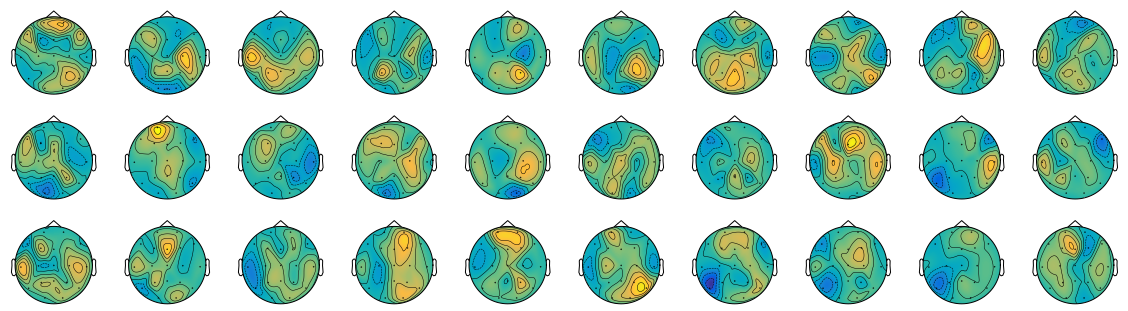

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
S_ERP = loadmat(load_path + f"Sujeto_"+str(1)+".mat")
data = S_ERP['music']
# data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
data_target = data

# structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')
raw = mne.EpochsArray(data_target, info)
biosemi_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(biosemi_montage)
itr = 1
fig = plt.figure(figsize=(20,5))
for type in range(len(Cx_sub)):
  for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    for fr in range(3):
      for win in range(10):
        ax  = fig.add_subplot(3,10,itr)
        itr +=1
        mne.viz.plot_topomap(Cx_topo_[subs_,type,fr,win,:],raw.info, axes=ax, cmap=parula_map, 
                            show=False, sensors=True, extrapolate='head',vmin=min_cx,vmax=max_cx)
        # if subs_ == 0 and type == 0:
        #   ax.set_title('Todos')
        # if subs_ == 1 and type == 0:
        #   ax.set_title('Grupo 2')
        # if subs_ == 2 and type == 0:
        #   ax.set_title('Grupo 3')
        # if subs_ == 3 and type == 0:
        #   ax.set_title('Grupo 4')
        # if subs_ == 0 and type == 0:
        #   ax.set_ylabel('env')
        # if subs_ == 0 and type == 1:
        #   ax.set_ylabel('RMS')
        # if subs_ == 0 and type == 2:
        #   ax.set_ylabel('Spectral')
        # if subs_ == 0 and type == 3:
        #   ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

## en cada intante del tiempo

## mutual information corso2020

In [ ]:
dat_gauss = np.mean(np.mean(Cx_sub[0][0],axis=1),axis=0)
dat_gauss = np.reshape(dat_gauss,(dim_gauss[2:]))
dat_gauss.shape

(19, 7, 20)

In [ ]:
# normalizar
dat_gauss_ = np.zeros((dat_gauss.shape))
for ch in range(dat_gauss.shape[0]):
  for fre in range(dat_gauss.shape[1]):
    min_ = np.min(np.squeeze(dat_gauss[ch,fre,:]))
    max_ = np.max(np.squeeze(dat_gauss[ch,fre,:]))
    dat_gauss_[ch,fre,:] = (dat_gauss[ch,fre,:]-min_)/(max_-min_)
dat_gauss_.shape

(19, 7, 20)

In [ ]:
##https://gist.github.com/naught101/4d1661b773471895fc52
'''
Non-parametric computation of entropy and mutual-information
Adapted by G Varoquaux for code created by R Brette, itself
from several papers (see in the code).
These computations rely on nearest-neighbor statistics
'''
import numpy as np

from scipy.special import gamma, psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi

from sklearn.neighbors import NearestNeighbors

__all__ = ['entropy', 'mutual_information', 'entropy_gaussian']

EPS = np.finfo(float).eps


def nearest_distances(X, k=1):
    '''
    X = array(N,M)
    N = number of points
    M = number of dimensions
    returns the distance to the kth nearest neighbor for every point in X
    '''
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    d, _ = knn.kneighbors(X)  # the first nearest neighbor is itself
    return d[:, -1]  # returns the distance to the kth nearest neighbor

def entropy_gaussian(C):
    '''
    Entropy of a gaussian variable with covariance matrix C
    '''
    if np.isscalar(C):  # C is the variance
        return .5 * (1 + np.log(2 * pi)) + .5 * np.log(C)
    else:
        n = C.shape[0]  # dimension
        return .5 * n * (1 + np.log(2 * pi)) + .5 * np.log(abs(det(C)))

def entropy(X, k=1):
    ''' Returns the entropy of the X.
    Parameters
    ===========
    X : array-like, shape (n_samples, n_features)
        The data the entropy of which is computed
    k : int, optional
        number of nearest neighbors for density estimation
    Notes
    ======
    Kozachenko, L. F. & Leonenko, N. N. 1987 Sample estimate of entropy
    of a random vector. Probl. Inf. Transm. 23, 95-101.
    See also: Evans, D. 2008 A computationally efficient estimator for
    mutual information, Proc. R. Soc. A 464 (2093), 1203-1215.
    and:
    Kraskov A, Stogbauer H, Grassberger P. (2004). Estimating mutual
    information. Phys Rev E 69(6 Pt 2):066138.
    '''

    # Distance to kth nearest neighbor
    r = nearest_distances(X, k)  # squared distances
    n, d = X.shape
    volume_unit_ball = (pi ** (.5 * d)) / gamma(.5 * d + 1)
    '''
    F. Perez-Cruz, (2008). Estimation of Information Theoretic Measures
    for Continuous Random Variables. Advances in Neural Information
    Processing Systems 21 (NIPS). Vancouver (Canada), December.
    return d * mean(log(r))+log(volume_unit_ball)+log(n-1)-log(k)
    '''
    return (d * np.mean(np.log(r + np.finfo(X.dtype).eps)) +
            np.log(volume_unit_ball) + psi(n) - psi(k))

def mutual_information(variables, k=1):
    '''
    Returns the mutual information between any number of variables.
    Each variable is a matrix X = array(n_samples, n_features)
    where
      n = number of samples
      dx,dy = number of dimensions
    Optionally, the following keyword argument can be specified:
      k = number of nearest neighbors for density estimation
    Example: mutual_information((X, Y)), mutual_information((X, Y, Z), k=5)
    '''
    if len(variables) < 2:
        raise AttributeError(
            "Mutual information must involve at least 2 variables")
    all_vars = np.hstack(variables)
    return (sum([entropy(X, k=k) for X in variables]) -
            entropy(all_vars, k=k))

def mutual_information_2d(x, y, sigma=1, normalized=False):
    """
    Computes (normalized) mutual information between two 1D variate from a
    joint histogram.
    Parameters
    ----------
    x : 1D array
        first variable
    y : 1D array
        second variable
    sigma: float
        sigma for Gaussian smoothing of the joint histogram
    Returns
    -------
    nmi: float
        the computed similariy measure
    """
    bins = (256, 256)

    jh = np.histogram2d(x, y, bins=bins)[0]

    # smooth the jh with a gaussian filter of given sigma
    ndimage.gaussian_filter(jh, sigma=sigma, mode='constant', output=jh)

    # compute marginal histograms
    jh = jh + EPS
    sh = np.sum(jh)
    jh = jh / sh
    s1 = np.sum(jh, axis=0).reshape((-1, jh.shape[0]))
    s2 = np.sum(jh, axis=1).reshape((jh.shape[1], -1))

    # Normalised Mutual Information of:
    # Studholme,  jhill & jhawkes (1998).
    # "A normalized entropy measure of 3-D medical image alignment".
    # in Proc. Medical Imaging 1998, vol. 3338, San Diego, CA, pp. 132-143.
    if normalized:
        mi = ((np.sum(s1 * np.log(s1)) + np.sum(s2 * np.log(s2))) /
              np.sum(jh * np.log(jh))) - 1
    else:
        mi = (np.sum(jh * np.log(jh)) - np.sum(s1 * np.log(s1)) -
              np.sum(s2 * np.log(s2)))

    return mi

# ###############################################################################
# # Tests

# def test_entropy():
#     # Testing against correlated Gaussian variables
#     # (analytical results are known)
#     # Entropy of a 3-dimensional gaussian variable
#     rng = np.random.RandomState(0)
#     n = 50000
#     d = 3
#     P = np.array([[1, 0, 0], [0, 1, .5], [0, 0, 1]])
#     C = np.dot(P, P.T)
#     Y = rng.randn(d, n)
#     X = np.dot(P, Y)
#     H_th = entropy_gaussian(C)
#     H_est = entropy(X.T, k=5)
#     # Our estimated entropy should always be less that the actual one
#     # (entropy estimation undershoots) but not too much
#     np.testing.assert_array_less(H_est, H_th)
#     np.testing.assert_array_less(.9 * H_th, H_est)

# def test_mutual_information():
#     # Mutual information between two correlated gaussian variables
#     # Entropy of a 2-dimensional gaussian variable
#     n = 50000
#     rng = np.random.RandomState(0)
#     # P = np.random.randn(2, 2)
#     P = np.array([[1, 0], [0.5, 1]])
#     C = np.dot(P, P.T)
#     U = rng.randn(2, n)
#     Z = np.dot(P, U).T
#     X = Z[:, 0]
#     X = X.reshape(len(X), 1)
#     Y = Z[:, 1]
#     Y = Y.reshape(len(Y), 1)
#     # in bits
#     MI_est = mutual_information((X, Y), k=5)
#     MI_th = (entropy_gaussian(C[0, 0]) +
#              entropy_gaussian(C[1, 1]) -
#              entropy_gaussian(C))
#     # Our estimator should undershoot once again: it will undershoot more
#     # for the 2D estimation that for the 1D estimation
#     print(MI_est, MI_th)
#     np.testing.assert_array_less(MI_est, MI_th)
#     np.testing.assert_array_less(MI_th, MI_est + .3)

# def test_degenerate():
#     # Test that our estimators are well-behaved with regards to
#     # degenerate solutions
#     rng = np.random.RandomState(0)
#     x = rng.randn(50000)
#     X = np.c_[x, x]
#     assert np.isfinite(entropy(X))
#     assert np.isfinite(mutual_information((x[:, np.newaxis],
#                                            x[:, np.newaxis])))
#     assert 2.9 < mutual_information_2d(x, x) < 3.1

# def test_mutual_information_2d():
#     # Mutual information between two correlated gaussian variables
#     # Entropy of a 2-dimensional gaussian variable
#     n = 50000
#     rng = np.random.RandomState(0)
#     # P = np.random.randn(2, 2)
#     P = np.array([[1, 0], [.9, .1]])
#     C = np.dot(P, P.T)
#     U = rng.randn(2, n)
#     Z = np.dot(P, U).T
#     X = Z[:, 0]
#     X = X.reshape(len(X), 1)
#     Y = Z[:, 1]
#     Y = Y.reshape(len(Y), 1)
#     # in bits
#     MI_est = mutual_information_2d(X.ravel(), Y.ravel())
#     MI_th = (entropy_gaussian(C[0, 0]) +
#              entropy_gaussian(C[1, 1]) -
#              entropy_gaussian(C))
#     print(MI_est, MI_th)
#     # Our estimator should undershoot once again: it will undershoot more
#     # for the 2D estimation that for the 1D estimation
#     np.testing.assert_array_less(MI_est, MI_th)
#     np.testing.assert_array_less(MI_th, MI_est + .2)


# if __name__ == '__main__':
#     # Run our tests
#     test_entropy()
#     test_mutual_information()
#     test_degenerate()
#     test_mutual_information_2d()

In [ ]:
dat_gauss = np.mean(np.mean(Cx_sub[0][0],axis=1),axis=0)
dat_gauss = np.reshape(dat_gauss,(dim_gauss[2:]))
dat_gauss.shape

(19, 7, 20)

In [ ]:
dat_gauss.shape

(19, 7, 20)

In [ ]:
# normalizar
dat_gauss_ = np.zeros((dat_gauss.shape))
for ch in range(dat_gauss.shape[0]):
  for fre in range(dat_gauss.shape[1]):
    min_ = np.min(np.squeeze(dat_gauss[ch,fre,:]))
    max_ = np.max(np.squeeze(dat_gauss[ch,fre,:]))
    dat_gauss_[ch,fre,:] = (dat_gauss[ch,fre,:]-min_)/(max_-min_)
dat_gauss_.shape

(19, 7, 20)

In [ ]:
dat_gauss_f = np.zeros((dat_gauss_.shape[1],dat_gauss.shape[2]-1))
for fre in range(2):#dat_gauss_.shape[1]):
  for tao in range(dat_gauss_.shape[2]-1):
    dat_gauss_f[fre,tao] = mutual_information_2d(dat_gauss_[:,fre+2,tao],dat_gauss_[:,fre+2,tao+1])
dat_gauss_f.shape

(7, 19)

In [ ]:
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
savemat(folder_path+'/distan_PLV.mat',{'distan_PLV':dat_gauss_f})

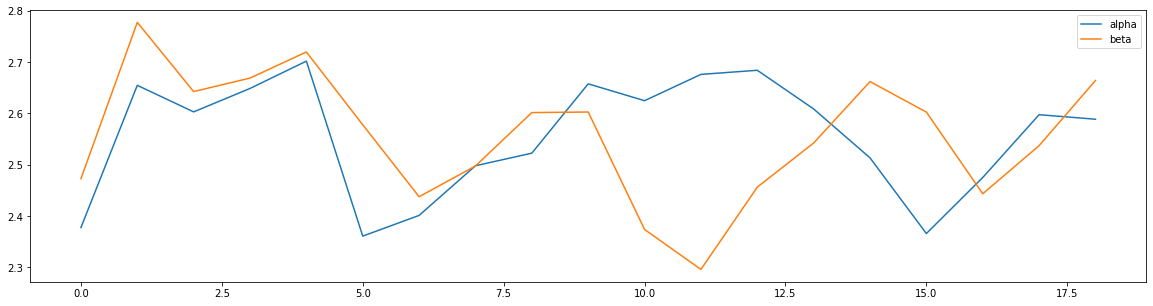

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dat_gauss_f[0,:])
plt.plot(dat_gauss_f[1,:])
plt.legend(['alpha','beta'])
plt.show()

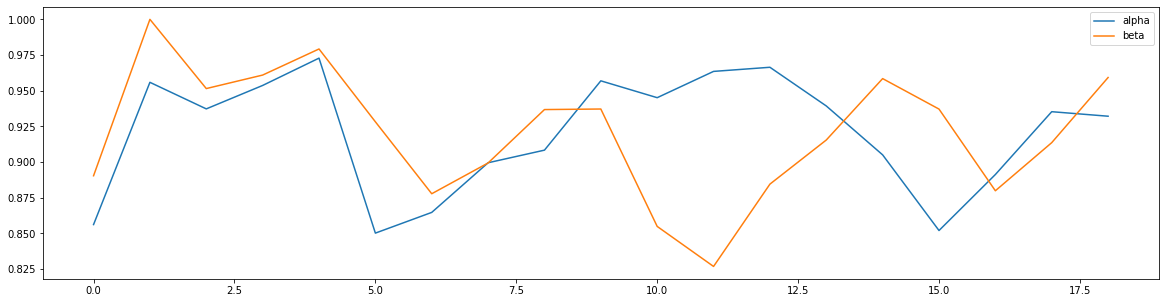

In [ ]:
 max_2 = np.max(dat_gauss_f)
plt.figure(figsize=(20,5))
plt.plot(dat_gauss_f[0,:]/max_2)
plt.plot(dat_gauss_f[1,:]/max_2)
plt.legend(['alpha','beta'])
plt.show()

# topoplots grupos

In [ ]:
!pip install -U mne==0.19
!pip install bctpy

In [ ]:
import numpy as np
import bct
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import KFold
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import mne
from mne.viz import plot_topomap
# from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
#-----------------------------------------------------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D  # noqa
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.stats import kurtosis
import pywt
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from joblib import load
import scipy.io as sio
## CKA
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()
tf.random.set_seed(42)
import types
import tempfile

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.viz.topomap import _check_outlines,_draw_outlines
#%% download data
FILEID = "1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O modCSP.py && rm -rf /tmp/cookies.txt > /dev/null
#%% download data
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
# from MIfunctions import *

--2021-12-02 21:37:34--  https://docs.google.com/uc?export=download&confirm=kK1H&id=1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh
Resolving docs.google.com (docs.google.com)... 172.217.219.101, 172.217.219.113, 172.217.219.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.219.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5o-docs.googleusercontent.com/docs/securesc/ag3ee0e5qk6m883vh48sn3mqubb420bi/kkka82m2mkpfgtlv47a04ic6fp7t3evr/1638481050000/06932581800131476027/01779221028689579767Z/1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh?e=download [following]
--2021-12-02 21:37:34--  https://doc-04-5o-docs.googleusercontent.com/docs/securesc/ag3ee0e5qk6m883vh48sn3mqubb420bi/kkka82m2mkpfgtlv47a04ic6fp7t3evr/1638481050000/06932581800131476027/01779221028689579767Z/1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh?e=download
Resolving doc-04-5o-docs.googleusercontent.com (doc-04-5o-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Conne

In [ ]:
# función de topoplot con links
class FB_feats2(TransformerMixin,BaseEstimator):
    def __init__(self, fs=250,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[2.5,4.5],[3,5]]),gammad=1,feat='kcon',ncomp = 6,method='fft',normalize=True,n_cycles=7.0):
        self.vtw = vtw
        self.fs = fs
        self.f_frec = f_frec
        self.gammad = gammad
        self.feat = feat
        self.method = method
        self.normalize = normalize
        self.ncomp = ncomp
        self.n_cycles = n_cycles
    def connection_rho(self,rho,fs,channels_names,thr=0.9,mean_by_time_windows=None,mean_by_frequencies=None,figsize=(30,30),save=True,sbj='',acc='',format='png',path='',Ch='s',cmap_tplt='jet',normalizate='True',ch_ext=None):
        # whether mean_by_time_windows or mean_by_frequencies are True, the rho vector will be averaged over time or frequency.
        #but, also it can be a vector, such as, [0,0,1,1,2,2] that indicates  which indices of rho will be averaged.
        if Ch !='s':
            self.Ch = Ch
        self.P = int(0.5*self.Ch*(self.Ch-1))
        if ch_ext is not None:
            pCh = len(ch_ext)
            pp = int(0.5*pCh*(pCh-1))
            tmprho = rho.reshape(pp,-1)
            srhoMc= np.asarray([squareform(tmprho[:,i]) for i in range(tmprho.shape[-1])]).T
            chpt = np.isin(channels_names,ch_ext)
            tmpch = np.zeros((len(channels_names),len(channels_names),srhoMc.shape[-1]))
            for p in range(srhoMc.shape[-1]):
                k=0
                for i in range(len(chpt)):
                    if chpt[i]==True:
                        j=0
                        for ii in range(len(chpt)):
                            if chpt[ii]==True:
                                tmpch[i,ii,p] = srhoMc[j,k,p]
                                j+=1
                            else:
                                tmpch[i,ii,p] = 0
                        k+=1
                    else:
                        tmpch[i,:,p]=0
            ghj = np.asarray([squareform(tmpch[:,:,i]) for i in range(tmpch.shape[-1])]).T
            rho = ghj.ravel()
        rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
        if mean_by_frequencies is None:
            mean_by_frequencies = np.arange(self.f_frec.shape[0])
        if mean_by_time_windows is None:
            mean_by_time_windows = np.arange(self.vtw.shape[0])
        times = len(np.unique(mean_by_time_windows))
        frecs = len(np.unique(mean_by_frequencies))
        rhof=[]
        for i in np.unique(mean_by_frequencies):
            rhof.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1))
        rhof=np.array(rhof)
        #rhof = np.swapaxes(rhof,0,-1).squeeze()
        rhof = np.moveaxis(rhof, [0], [-1])
        rho = []
        for i in np.unique(mean_by_time_windows):
            rho.append(np.mean(rhof[:,mean_by_time_windows==i,:],axis=-2))
        rho=np.array(rho)
        #rho = np.swapaxes(rho,0,2).squeeze()
        rho = np.moveaxis(rho, [0], [-2])
        montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",
                                montage=montage)
        pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,channels_names)
        pos = pos[picks]
        # adjust positions
        pos, outlines = _check_outlines(pos, 'head')
        pos_x = pos[:,0]
        pos_y = pos[:,1]
        names = np.array(layout.names)[picks]
        if normalizate:
            rho=((rho-rho.min())/(rho.max()-rho.min()))
        cmap = cmap_tplt
        if normalizate:
            cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
        else:
            cNorm  = colors.Normalize(vmin=0, vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
        rhotopo = np.zeros((Ch,frecs,times))
        for time in np.arange(times):
            for frec in np.arange(frecs):
                rhotopo[:,frec,time] = squareform(rho[:,time,frec]).sum(axis=1)
        rhotopo = rhotopo-rhotopo.min()
        rhotopo /= rhotopo.max()
        #f,ax = plt.subplots(frecs,times,figsize=figsize)
        fig=plt.figure(figsize=figsize)
        itr=1
        for time in np.arange(times): 
            for frec in np.arange(frecs):
                ax = fig.add_subplot(frecs,times,itr)
                itr+=1
                rhok = squareform(rho[:,time,frec])
                #plot_topomap(rhotopo[:,frec,time], pos, axes=ax[frec,time], cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                plot_topomap(rhotopo[:,frec,time], pos, axes=ax, cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                if thr >1:
                    indx_pct = np.where(np.triu(rhok)>np.percentile(rho.ravel()[rho.ravel()>1e-8], thr))
                else:
                    indx_pct = np.where(np.triu(rhok)>thr)
                #ax[frec,time].set(xticks=[], yticks=[], aspect='equal')
                ax.set(xticks=[], yticks=[], aspect='equal')
                #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
                #_draw_outlines(ax[frec,time], outlines)
                _draw_outlines(ax, outlines)
                for i in np.arange(np.shape(indx_pct)[-1]):
                    ch1=indx_pct[0][i]
                    ch2=indx_pct[1][i]     
                    #ax[frec,time].arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            #pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            #width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                    ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                for ch1 in  np.unique(np.ravel(indx_pct)):
                    #ax[frec,time].scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    #ax[frec,time].annotate(names[ch1], xy=pos[ch1,:],size=15)
                    ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        cax = fig.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
        if save ==True:
            plt.savefig(str(path)+'Cxsbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return

In [ ]:
vtw = list()
fs = 1000
for a in range(1):
  vtw.append([a+1,a+2])
  feat = FB_feats2(fs=fs,vtw=np.array([[1,45]]),
                f_frec=np.array(vtw))

In [ ]:
vtw

[[1, 2]]

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')

In [ ]:
# graficar los enlaces en el topoplot.
fs = 1000
Cx_topo = np.squeeze(np.mean(np.squeeze(np.mean(Cx_,axis=0)),axis=0))
feat.connection_rho(Cx_topo, fs, channels, thr=0.7, # umbral
                    figsize=(10, 10), save=False, sbj='', acc='', 
                    format='eps', path='', Ch=n_channels,
                    cmap_tplt='hot')

# SVM acc

In [ ]:
# y__ = loadmat('layer.mat')['lay']
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
y__ = loadmat(folder_path+'/Trials_cuadrantes')['trial_ord']
y__= y__.reshape([y__.shape[0]*y__.shape[1]])
y__.shape

(1240,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
# y.shape
X = datos_fold_                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = tr_all.astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.zeros((1240)).astype(bool)
  test_index_[ind_s[subj]:ind_s[subj]+40] = True
  test_index_ = test_index_*tr_all
  # train_index_[ind_s[subj]:ind_s[subj]+40] = False
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[fold][train_index,:], X[fold][test_index,:]
  y_train_, y_test = y[train_index], y[test_index]
  # X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]*X_train_.shape[3]))
  # X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]*X_test_.shape[2]*X_test_.shape[3]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 10,n_jobs=-1)
  # fitting the model for grid search
  
  grid.fit(X_train_, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test_)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 28 30 31 32 33 34 35 36 37 38 39]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.44      1.00      0.62        16
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7

    accuracy                           0.44        36
   macro avg       0.11      0.25      0.15        36
weighted avg       0.20      0.44      0.27        36

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [40 41 42 43 44 46 47 48 49 50 51 52 53 54 56 58 59 60 61 62 63 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.31      1.00      0.47        11
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.31        36
   macro avg       0.08      0.25      0.12        36
weighted avg       0.09      0.31      0.14        36

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [ 80  81  83  84  85  86  88  89  92  94  95  96  98  99 100 102 103 104
 107 108 109 110 111 112 114 115 117 118 119]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         9
         2.0       0.24      1.00      0.39         7
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         6

    accuracy                           0.24        29
   macro avg       0.06      0.25      0.10        29
weighted avg       0.06      0.24      0.09        29

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [121 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 142 143 144 145 148 149 150 151 152 153 156 158 159]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.22      1.00      0.36         7
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7

    accuracy                           0.22        32
   macro avg       0.05      0.25      0.09        32
weighted avg       0.05      0.22      0.08        32

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [161 162 163 165 166 168 169 170 171 172 173 174 175 176 177 179 180 181
 182 183 184 185 187 188 189 190 191 193 194 196 197 198 199]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.24      1.00      0.39         8
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         6

    accuracy                           0.24        33
   macro avg       0.06      0.25      0.10        33
weighted avg       0.06      0.24      0.09        33

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [200 203 204 205 206 207 209 210 212 213 214 215 216 217 218 221 222 223
 224 225 226 227 228 230 231 232 233 234 236 237 238 239]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.28      1.00      0.44         9
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         7

    accuracy                           0.28        32
   macro avg       0.07      0.25      0.11        32
weighted avg       0.08      0.28      0.12        32

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [240 241 242 243 244 245 246 248 249 250 251 252 253 254 255 256 258 261
 262 263 264 265 266 268 269 270 271 272 273 276 277 279]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.31      1.00      0.48        10
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         8

    accuracy                           0.31        32
   macro avg       0.08      0.25      0.12        32
weighted avg       0.10      0.31      0.15        32

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 295 297 298 299
 300 303 304 305 307 308 309 310 311 312 313 315 316 318]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.41      1.00      0.58        13
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.41        32
   macro avg       0.10      0.25      0.14        32
weighted avg       0.17      0.41      0.23        32

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [320 323 324 325 326 327 329 330 332 333 334 335 336 337 338 341 342 343
 344 345 346 347 348 350 351 352 353 354 356 357 358 359]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.28      1.00      0.44         9
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         7

    accuracy                           0.28        32
   macro avg       0.07      0.25      0.11        32
weighted avg       0.08      0.28      0.12        32

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [360 361 362 363 364 365 366 367 369 370 371 373 374 375 376 377 378 380
 381 382 383 384 386 387 388 389 390 391 392 393 394 395 396 397 398 399]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.42      1.00      0.59        15
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         6

    accuracy                           0.42        36
   macro avg       0.10      0.25      0.15        36
weighted avg       0.17      0.42      0.25        36

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [401 404 405 406 407 408 409 410 411 412 413 414 416 417 418 419 420 421
 422 423 424 425 426 428 429 430 431 432 433 434 435 437 438 439]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.35      1.00      0.52        12
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         4

    accuracy                           0.35        34
   macro avg       0.09      0.25      0.13        34
weighted avg       0.12      0.35      0.18        34

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [440 441 442 443 444 446 447 448 449 451 452 453 454 455 457 458 460 462
 463 464 465 466 467 468 469 470 471 472 474 476 477 478 479]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.39      1.00      0.57        13
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.39        33
   macro avg       0.10      0.25      0.14        33
weighted avg       0.16      0.39      0.22        33

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [481 484 485 486 487 488 489 490 491 492 493 494 496 497 498 499 500 501
 502 503 504 505 506 508 509 510 511 512 513 514 515 517 518 519]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.35      1.00      0.52        12
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         4

    accuracy                           0.35        34
   macro avg       0.09      0.25      0.13        34
weighted avg       0.12      0.35      0.18        34

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [521 524 525 526 527 528 529 530 531 532 533 534 536 537 538 539 540 541
 542 543 544 545 546 548 549 550 551 552 553 554 555 557 558 559]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.35      1.00      0.52        12
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         4

    accuracy                           0.35        34
   macro avg       0.09      0.25      0.13        34
weighted avg       0.12      0.35      0.18        34

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [561 564 565 566 567 568 569 570 571 572 573 574 576 577 578 579 580 581
 582 583 584 585 586 588 589 590 591 592 593 594 595 597 598 599]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.35      1.00      0.52        12
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         4

    accuracy                           0.35        34
   macro avg       0.09      0.25      0.13        34
weighted avg       0.12      0.35      0.18        34

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [600 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 618 619
 620 623 624 626 627 628 629 630 631 632 633 634 635 636 637 638 639]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.40      1.00      0.57        14
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8

    accuracy                           0.40        35
   macro avg       0.10      0.25      0.14        35
weighted avg       0.16      0.40      0.23        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657
 658 659 660 661 663 665 666 667 669 671 672 674 675 676 677 678 679]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [681 682 683 684 685 686 687 688 690 691 692 693 694 695 697 699 700 701
 702 703 705 706 707 708 709 711 712 713 714 715]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.43      1.00      0.60        13
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         9

    accuracy                           0.43        30
   macro avg       0.11      0.25      0.15        30
weighted avg       0.19      0.43      0.26        30

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 743 745 746 747 749 751 752 754 755 756 757 758 759]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [760 763 764 765 766 768 769 770 771 772 773 774 776 777 778 779 780 781
 782 783 784 785 786 787 789 790 791 792 793 794 796 797 798 799]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         9
         2.0       0.35      1.00      0.52        12
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         9

    accuracy                           0.35        34
   macro avg       0.09      0.25      0.13        34
weighted avg       0.12      0.35      0.18        34

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817
 818 819 820 821 823 825 826 827 829 831 832 834 835 836 837 838 839]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857
 858 859 860 861 863 865 866 867 869 871 872 874 875 876 877 878 879]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897
 898 899 900 901 903 905 906 907 909 911 912 914 915 916 917 918 919]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937
 938 939 940 941 943 945 946 947 949 951 952 954 955 956 957 958 959]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977
 978 979 980 981 983 985 986 987 989 991 992 994 995 996 997 998 999]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1023 1025 1026 1027 1029 1031
 1032 1034 1035 1036 1037 1038 1039]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053
 1054 1055 1056 1057 1058 1059 1060 1061 1063 1065 1066 1067 1069 1071
 1072 1074 1075 1076 1077 1078 1079]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093
 1094 1095 1096 1097 1098 1099 1100 1101 1103 1105 1106 1107 1109 1111
 1112 1114 1115 1116 1117 1118 1119]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.46      1.00      0.63        16
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         5

    accuracy                           0.46        35
   macro avg       0.11      0.25      0.16        35
weighted avg       0.21      0.46      0.29        35

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1149 1150 1151 1152 1153 1155 1156 1157 1158 1159]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.42      1.00      0.59        16
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         6

    accuracy                           0.42        38
   macro avg       0.11      0.25      0.15        38
weighted avg       0.18      0.42      0.25        38

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173
 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1186 1188 1189 1192
 1193 1194 1196 1197 1198 1199]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.41      1.00      0.58        14
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         7

    accuracy                           0.41        34
   macro avg       0.10      0.25      0.15        34
weighted avg       0.17      0.41      0.24        34

TRAIN: [   0    1    2 ... 1197 1198 1199] TEST: [1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213
 1214 1215 1216 1217 1218 1219 1222 1223 1224 1225 1227 1229 1230 1231
 1232 1233 1234 1236 1237 1238 1239]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.01)
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.37      1.00      0.54        13
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         7

    accuracy                           0.37        35
   macro avg       0.09      0.25      0.14        35
weighted avg       0.14      0.37      0.20        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.concatenate(grid_predictions_)

array([2., 2., 2., ..., 2., 2., 2.])

In [ ]:
# pred = np.asarray(grid_predictions_)
# pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
pred = np.concatenate(grid_predictions_)
print(classification_report(y[tr_all], pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       337
         2.0       0.39      1.00      0.56       408
         3.0       0.00      0.00      0.00       132
         4.0       0.00      0.00      0.00       178

    accuracy                           0.39      1055
   macro avg       0.10      0.25      0.14      1055
weighted avg       0.15      0.39      0.22      1055



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)

# y.shape
X = datos_fold_                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [0.1, 1],
              'gamma': [0.1, 1],
              'kernel': ['poly']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = tr_all.astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.zeros((1240)).astype(bool)
  test_index_[ind_s[subj]:ind_s[subj]+40] = True
  test_index_ = test_index_*tr_all
  # train_index_[ind_s[subj]:ind_s[subj]+40] = False
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[fold][train_index,:], X[fold][test_index,:]
  y_train_, y_test = y[train_index], y[test_index]
  # X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]*X_train_.shape[3]))
  # X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]*X_test_.shape[2]*X_test_.shape[3]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 2,n_jobs=-1)
  # fitting the model for grid search
  
  grid.fit(X_train_, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test_)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 28 30 31 32 33 34 35 36 37 38 39]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       271
           2       0.32      1.00      0.48       395
           3       0.00      0.00      0.00       369
           4       0.00      0.00      0.00       205

    accuracy                           0.32      1240
   macro avg       0.08      0.25      0.12      1240
weighted avg       0.10      0.32      0.15      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
fold = 0
ind = datos_fold_[fold]==1+datos_fold_[fold]==2

In [ ]:
cv_sujetos[0]

array([[0., 0., 0., ..., 3., 1., 3.],
       [3., 1., 1., ..., 1., 3., 1.],
       [1., 3., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 3., 3., ..., 3., 2., 1.],
       [2., 1., 2., ..., 1., 1., 1.]])

In [ ]:
ind1 = cv_sujetos[fold]==1
ind2 = cv_sujetos[fold]==2
ind  = ind1+ind2

In [ ]:
trial_sujeto = np.arange(0,1240,40)
len(trial_sujeto)

31

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
pca = PCA(n_components=9)
datos_stim = np.zeros((31,40,20,9))
for sub in range(31):
  for tr in range(40):
    datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])

# y.shape
X = datos_r                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = np.ones((1240)).astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[train_index,:], X[test_index,:]
  y_train_, y_test = y[train_index], y[test_index]
  X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]))
  X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train_, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test_)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.91      0.95        11
           2       1.00      0.58      0.74        12

    accuracy                           0.85        40
   macro avg       0.91      0.83      0.85        40
weighted avg       0.89      0.85      0.84        40

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    reca

In [ ]:
X[0].shape

(59, 171)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
pca = PCA(n_components=9)
datos_stim = np.zeros((31,40,20,9))
for sub in range(31):
  for tr in range(40):
    datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
sub = 1
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]

# y.shape
X = resp_data                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = np.ones((1240)).astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[train_index], X[test_index]
  y_train_, y_test = y[train_index], y[test_index]
  # X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]))
  # X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(X_test_),X_test_[0].shape[0],X_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0

  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(x_test)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

NameError: ignored

# SVM acc music

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
stim_data = scipy.io.loadmat(folder_path_+f"/Subject{1}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
X = datos_fold_ss                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [0.01, 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)

for train_index, test_index in kf.split(stim_data,y):
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[fold][train_index], X[fold][test_index]
  y_train_, y_test = y[train_index], y[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(X_test_),X_test_[0].shape[0],X_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0

  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(x_test)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [   0    1    2 ... 1236 1238 1239] TEST: [   5    6    7   10   21   28   54   58   64   73   93   95   98  107
  113  115  123  144  146  162  165  166  173  176  181  197  223  227
  233  234  238  272  275  278  293  299  300  304  311  312  346  379
  389  391  394  402  457  459  461  475  476  479  486  497  500  504
  507  512  528  530  537  538  544  545  550  554  556  565  570  578
  586  588  596  603  611  643  648  663  667  668  669  676  689  690
  719  726  731  737  768  769  784  785  813  824  840  848  851  864
  883  904  938  957  958 1007 1017 1025 1027 1036 1041 1058 1071 1072
 1090 1121 1140 1150 1161 1166 1168 1174 1188 1231 1232 1237]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   1    2    3 ... 1237 1238 1239] TEST: [   0   37   39   40   44   59   62   77   85   87   97  105  112  116
  118  139  175  190  210  214  224  226  229  237  252  256  290  298
  303  307  317  321  353  375  380  382  385  392  397  416  427  430
  449  455  470  473  485  492  499  510  514  519  525  527  549  558
  566  577  591  595  600  604  617  638  641  644  645  647  660  661
  687  697  700  736  742  779  780  795  799  805  808  817  841  853
  865  869  870  873  890  899  91

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  12   13   24   30   36   60   79   82   86   96  103  109  111  159
  161  170  183  194  198  208  219  235  236  260  261  269  270  284
  295  302  309  313  326  328  331  335  340  342  347  368  378  403
  408  409  415  422  423  426  445  448  466  490  540  543  553  590
  599  607  620  637  652  654  656  658  673  682  693  694  703  714
  718  721  724  728  733  759  760  781  782  804  816  820  823  829
  832  833  860  876  879  881  89

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1236 1237 1239] TEST: [   4   16   34   43   45   51  134  154  157  167  185  186  206  211
  213  215  239  244  249  251  280  289  294  315  318  322  324  329
  338  349  366  387  388  399  407  410  419  429  436  442  458  463
  503  511  513  517  534  571  589  609  615  618  630  649  653  677
  679  684  692  695  696  699  708  711  712  717  730  735  744  745
  761  775  783  793  800  818  849  857  858  868  886  891  902  909
  916  919  929  947  951  960  96

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [   3   38   52   55   63   67   78   99  106  121  125  126  138  158
  164  171  201  209  212  245  250  263  267  286  305  314  319  325
  348  356  359  369  398  413  420  440  444  456  460  465  467  480
  495  520  522  524  526  548  551  561  579  583  593  597  598  610
  613  616  626  627  633  657  659  671  698  710  715  751  770  771
  772  773  788  798  802  803  810  814  819  827  830  837  838  854
  885  893  898  901  917  927  93

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           1       0.25      0.04      0.06        28
           2       0.30      0.33      0.32        39
           3       0.31      0.65      0.42        37
           4       0.00      0.00      0.00        20

    accuracy                           0.31       124
   macro avg       0.22      0.25      0.20       124
weighted avg       0.24      0.31      0.24       124

TRAIN: [   0    1    2 ... 1236 1237 1238] TEST: [  33   35   47   56   65   76   83   94  101  110  132  136  142  148
  152  160  168  169  180  188  191  199  207  221  222  240  242  243
  248  268  281  283  285  292  297  301  306  308  343  352  354  367
  372  373  383  386  400  401  406  417  424  433  434  438  441  447
  451  452  474  478  484  516  529  533  535  562  568  572  584  605
  606  612  629  651  680  685  691  723  727  732  734  739  750  765
  766  797  811  843  845  8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  18   23   41   46   50   61   66   68   71   75   80   84   88   90
  104  122  130  137  143  149  150  151  153  174  193  195  200  216
  220  230  246  247  262  264  287  288  291  332  334  336  355  358
  362  364  370  376  384  395  404  418  437  462  491  498  502  508
  539  564  567  569  580  594  623  635  640  662  666  672  707  725
  738  740  747  748  749  752  754  757  763  774  791  794  831  835
  846  861  871  874  906  921  92

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124

TRAIN: [   0    1    3 ... 1237 1238 1239] TEST: [   2    8    9   14   20   22   26   29   31   32   57   89   91   92
  133  135  140  141  147  155  163  172  187  204  225  232  253  258
  271  276  277  279  351  361  363  374  405  411  412  414  428  439
  443  468  469  483  494  509  518  521  523  532  542  546  559  573
  574  587  602  619  621  622  632  650  665  702  709  716  720  729
  743  755  767  778  786  787  789  790  796  806  834  839  855  859
  863  880  895  911  912  914  93

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           1       0.33      0.04      0.07        27
           2       0.34      0.55      0.42        40
           3       0.29      0.43      0.34        37
           4       0.00      0.00      0.00        20

    accuracy                           0.31       124
   macro avg       0.24      0.25      0.21       124
weighted avg       0.27      0.31      0.25       124

TRAIN: [   0    2    3 ... 1237 1238 1239] TEST: [   1   19   25   27   49   81  102  108  114  119  120  124  156  177
  189  192  202  231  255  259  266  273  330  333  339  341  344  345
  350  371  393  396  421  425  431  435  446  454  464  481  482  487
  488  489  493  496  501  531  536  541  547  555  557  575  582  601
  614  625  628  646  655  664  675  678  681  683  686  705  706  741
  746  753  758  762  777  792  801  807  812  821  822  826  828  842
  867  872  875  877  888  8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.16      0.10      0.12       271
           2       0.31      0.46      0.37       395
           3       0.28      0.34      0.31       369
           4       0.07      0.02      0.03       205

    accuracy                           0.27      1240
   macro avg       0.21      0.23      0.21      1240
weighted avg       0.23      0.27      0.24      1240



In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       271
           2       0.32      0.99      0.48       395
           3       0.43      0.01      0.02       369
           4       0.00      0.00      0.00       205

    accuracy                           0.32      1240
   macro avg       0.19      0.25      0.12      1240
weighted avg       0.23      0.32      0.16      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.21      0.09      0.12       271
           2       0.31      0.78      0.44       395
           3       0.29      0.10      0.15       369
           4       0.00      0.00      0.00       205

    accuracy                           0.30      1240
   macro avg       0.20      0.24      0.18      1240
weighted avg       0.23      0.30      0.21      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.29      0.01      0.01       271
           2       0.32      0.89      0.47       395
           3       0.38      0.14      0.20       369
           4       0.00      0.00      0.00       205

    accuracy                           0.33      1240
   macro avg       0.25      0.26      0.17      1240
weighted avg       0.28      0.33      0.21      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# tsne Cx

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

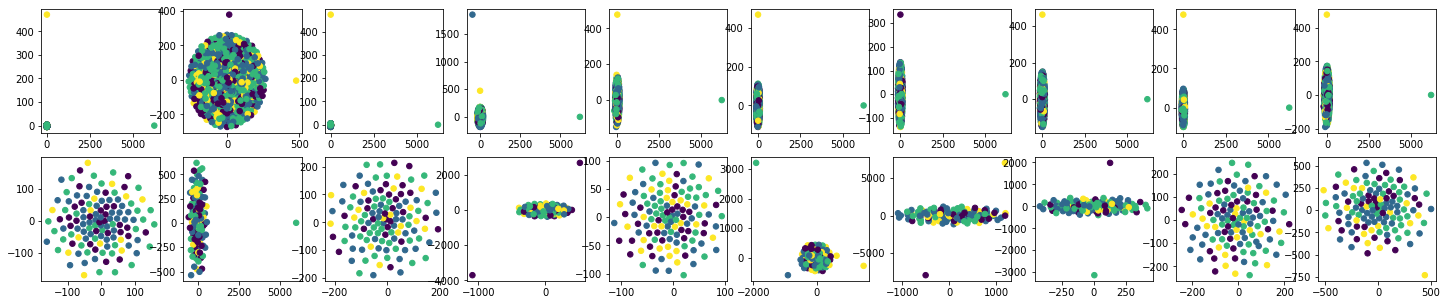

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
tsne_ = TSNE(n_components=2, init='pca')
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

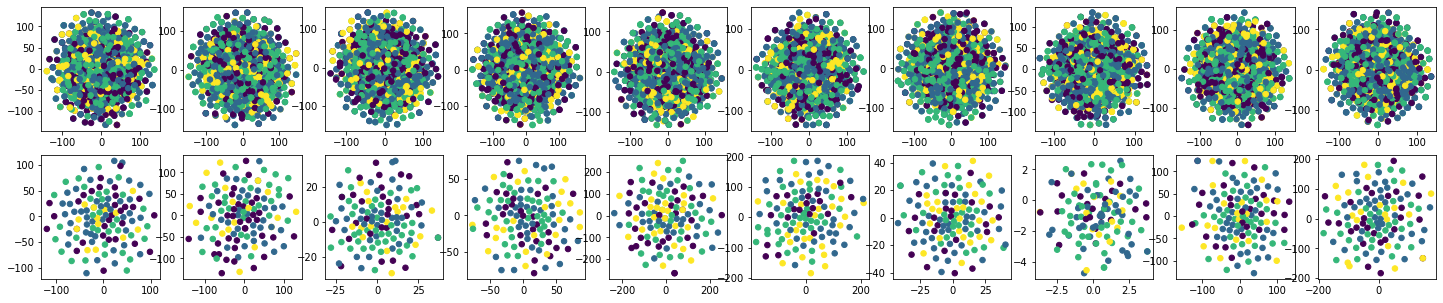

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = datos_fold_[0][train_index,:,:], datos_fold_[0][test_index,:,:]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

# Tsne music

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

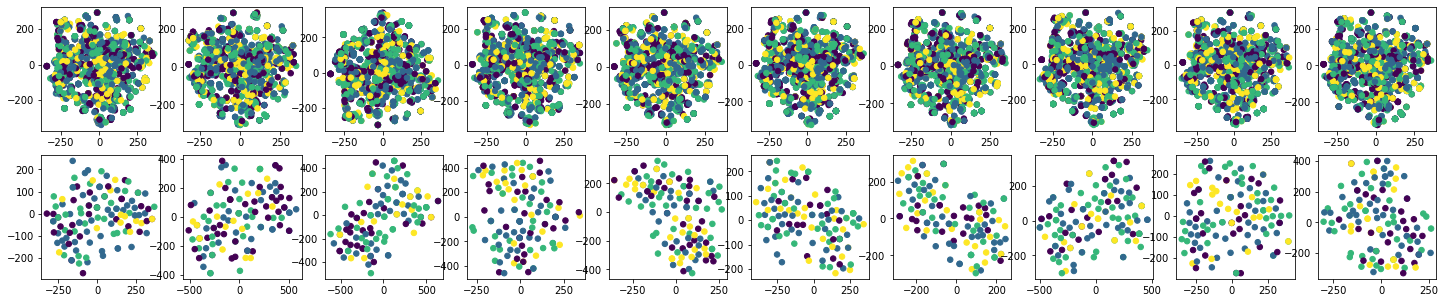

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
sub = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
  
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
tsne_ = TSNE(n_components=2, init='pca')
for train_index, test_index in kf.split(stim_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = stim_data[train_index], stim_data[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = datos_fold_[0][train_index,:,:], datos_fold_[0][test_index,:,:]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

# Acoplamiento de fase y amplitud PAC

In [ ]:
import os
import mne
import numpy as np
from numpy import angle, sin, cos, sqrt
# from scipy.io import loadmat
# from mat73 import loadmat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
import matplotlib.pyplot as plt

In [ ]:
#filtering functions
def butter_bandpass(lowcut, highcut, fs, order=4):
  #lowcut is the lower bound of the frequency that we want to isolate
  #hicut is the upper bound of the frequency that we want to isolate
  #fs is the sampling rate of our data
  nyq = 0.5 * fs #nyquist frequency - see http://www.dspguide.com/ if you want more info
  low = float(lowcut) / nyq
  high = float(highcut) / nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a

##
def butter_bandpass_filter(mydata, lowcut, highcut, fs, order=4):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y = filtfilt(b, a, mydata)
  return y

# PAC %estimation of phase-amplitude cross-frequency coupling

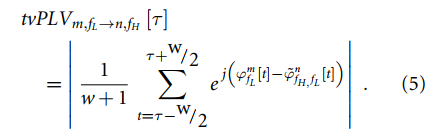

In [ ]:
def moving_multitrial_pac(data1,data2,fr1,fr2,Nsegments,sampling_freq,type):
  #calculating phase of theta
  phase_data = butter_bandpass_filter(data1, fr1[0], fr1[1],(sampling_freq))
  phase_data = angle(hilbert(phase_data))

  #calculating amplitude envelope of high gamma
  amp_data = butter_bandpass_filter(data2, fr2[0], fr2[1], (sampling_freq))
  amp_data = abs(hilbert(amp_data))

  # Filtering the amplitude of analytic signal of the high-frequency range within the
  # frequency range of the low-frequency band
  lowfromhigh = butter_bandpass_filter(amp_data, fr1[0], fr1[1],(sampling_freq))
  
  # lowfromhigh.shape
  low_Env_high_filtered_signals = lowfromhigh-np.tile(np.mean(lowfromhigh),(Ntrials,1))
  
  # get the phase
  Amp_phase_signals=angle(hilbert(low_Env_high_filtered_signals))
  Ntime = data1.shape[1]
  Nstep = np.floor(Ntime/Nsegments)
  if type == 'trials':
    temporal_ = np.zeros((Amp_phase_signals.shape[0],Nsegments))
  else:
    temporal_ = np.zeros((Nsegments))
  for ii in range(Nsegments): # repear over different segments
    start = np.floor((ii)*Nstep).astype(int)
    stop  = np.floor((ii+1)*Nstep).astype(int)
    if type == 'trials':
      plv = np.abs(np.sum(np.exp(1j*(phase_data[:,start:stop]-Amp_phase_signals[:,start:stop])),axis=1)/((Nstep)))
      temporal_[:,ii]=plv
    else:
      plv = np.abs(np.sum(np.sum(np.exp(1j*(phase_data[:,start:stop]-Amp_phase_signals[:,start:stop]))))/(Ntrials*(Nstep)))
      temporal_[ii]=plv
  return temporal_

In [ ]:
# Parameters
# Bands of rytms: delta to gamma.
phase_providing_band = [[1,4],[4,8],[8,10],[10,12],[12,20],[20,30],[30,45]] 
amplitude_providing_band = [[1,4],[4,8],[8,10],[10,12],[12,20],[20,30],[30,45]]
Ntrials   = data_ref[0].shape[0]
Nsegments = 8 # Number of segments in window.
Nchannels = data_ref[0].shape[1]
Nfreqs    = len(phase_providing_band)

In [ ]:
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" 

In [ ]:
#@title Texto de título predeterminado
temporal_plv = np.zeros((Ntrials,int(Nchannels*(Nchannels-1)/2),Nfreqs,Nfreqs,Nsegments))
# (Nodes,Nodes,Time)
for sub in range(len(Subjects)):
  cont_ch = 0 # contador de las subredes
  for ch1 in range(Nchannels):
    for ch2 in range(ch1+1,Nchannels-1):
      if ch1 != ch2:
        data1     = np.squeeze(data_ref[sub][:,ch1,:])
        data2     = np.squeeze(data_ref[sub][:,ch2,:])
        fr_1 = 0
        for fr1 in phase_providing_band:
          fr_2 = 0
          for fr2 in amplitude_providing_band:
            temporal_plv[:,cont_ch,fr_1,fr_2,:] = moving_multitrial_pac(data1,data2,fr1,fr2,Nsegments,sampling_freq,type='trials')
            fr_2 += 1
          fr_1 += 1
      cont_ch += 1
  print('PLV_pac_music'+str(sub))    
  savemat(folder_path_+'PLV_pac_music'+str(sub)+'_trials.mat',{'temporal_plv':temporal_plv})

PLV_pac_music0


In [ ]:
# PAC 
temporal_plv.shape
# np.transpose(temporal_plv, (0,4,1,2,3,5)).shape

(40, 171, 7, 7, 8)

In [ ]:
sub

In [ ]:
savemat(folder_path_+f'PLV_pac_music'+str(sub)+'_trials.mat',{'temporal_plv':temporal_plv})

# Kgauss

In [ ]:
! pip install bctpy
! pip install mne==0.19
#funciones de Daniel
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt

FILEID = "1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O modCSP.py && rm -rf /tmp/cookies.txt

--2021-12-21 19:38:11--  https://docs.google.com/uc?export=download&confirm=o9&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 142.250.136.138, 142.250.136.139, 142.250.136.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘MIfunctions.py’

MIfunctions.py          [ <=>                ]   3.17K  --.-KB/s    in 0.001s  

2021-12-21 19:38:11 (6.19 MB/s) - ‘MIfunctions.py’ saved [3251]

--2021-12-21 19:38:12--  https://docs.google.com/uc?export=download&confirm=46Co&id=1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh
Resolving docs.google.com (docs.google.com)... 142.250.136.138, 142.250.136.139, 142.250.136.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-88-docs.googleusercontent.com/docs/securesc/oas1ur2a61i

In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from scipy.stats import spearmanr, pearsonr
import MIfunctions 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 19 17:39:21 2019

@author:Usage
Here you can get help of any object by pressing Ctrl+I in front of it, either on the Editor or the Console.
 andre
"""
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
import numpy as np
from mne.io import read_raw_edf
#from mne.decoding import CSP
from modCSP import CSP
import matplotlib.pyplot as plt
import pandas as pd
import json as  js #conda install -c jmcmurray json
import warnings
import seaborn as sns
import mne
from numpy import matlib
import matplotlib
import os
from matplotlib.animation import FuncAnimation
from ipywidgets import interact
warnings.filterwarnings("ignore")
Sujetos_giga = {}


#%%
def Read_GIGA_data_fCloud(path_filename,ch,vt,sbj_id):
    #--- info ----------------
    # 2  ---> sample rate 
    # 7  ---> imaginary_left 
    # 8  ---> imaginary_right 
    # 11 ---> imaginary_event 
    # 14 ---> bad_trials 
    # class1: left 
    # class2: right
    #------------------------
    raw     = sio.loadmat(path_filename)
    eeg_raw = raw['eeg']
    sfreq   = np.float(eeg_raw[0][0][2])
    id_MI   = np.where(eeg_raw[0][0][11]==1)
    id_MI   = id_MI[1]
    raw_c1  = []
    raw_c2  = []
    y_c1    = []
    y_c2    = []
    for i in range(len(id_MI)):
        l_thr = id_MI[i]-(sfreq*2-1) 
        h_thr = id_MI[i]+(sfreq*5)
        tmp_c1 = eeg_raw[0][0][7][ch,np.int(l_thr):np.int(h_thr)]
        tmp_c2 = eeg_raw[0][0][8][ch,np.int(l_thr):np.int(h_thr)]
        raw_c1.append(tmp_c1[:,np.int(vt[0]*sfreq):np.int(vt[1]*sfreq)])
        raw_c2.append(tmp_c2[:,np.int(vt[0]*sfreq):np.int(vt[1]*sfreq)])
        y_c1.append(1.0)
        y_c2.append(2.0)    
    # remove bad trials
    id_bad_tr_voltage_c1 = eeg_raw[0][0][14][0][0][0][0][0]
    id_bad_tr_voltage_c2 = eeg_raw[0][0][14][0][0][0][0][1]   
    id_bad_tr_mi_c1      = eeg_raw[0][0][14][0][0][1][0][0]
    id_bad_tr_mi_c2      = eeg_raw[0][0][14][0][0][1][0][1]
    ref_axis_c1          = 1
    ref_axis_c2          = 1    
    if id_bad_tr_mi_c1.shape[0]>id_bad_tr_mi_c1.shape[1]:
        id_bad_tr_mi_c1 = id_bad_tr_mi_c1.T
    if id_bad_tr_mi_c2.shape[0]>id_bad_tr_mi_c2.shape[1]:
        id_bad_tr_mi_c2 = id_bad_tr_mi_c2.T
    if id_bad_tr_voltage_c1.shape[1] == 0:
        id_bad_tr_voltage_c1 = np.reshape(id_bad_tr_voltage_c1, (id_bad_tr_voltage_c1.shape[0], id_bad_tr_mi_c1.shape[1]))
    if id_bad_tr_voltage_c2.shape[1] == 0:
        id_bad_tr_voltage_c2 = np.reshape(id_bad_tr_voltage_c2, (id_bad_tr_voltage_c2.shape[0], id_bad_tr_mi_c2.shape[1])) 
    if (id_bad_tr_voltage_c1.shape[1] > id_bad_tr_mi_c1.shape[1]):
        if id_bad_tr_mi_c1.shape[0] == 0:
            id_bad_tr_mi_c1 = np.reshape(id_bad_tr_mi_c1, (id_bad_tr_mi_c1.shape[0],id_bad_tr_voltage_c1.shape[1]))
            ref_axis_c1     = 0
    if (id_bad_tr_voltage_c2.shape[1] > id_bad_tr_mi_c2.shape[1]):
        if id_bad_tr_mi_c2.shape[0] == 0:
            id_bad_tr_mi_c2 = np.reshape(id_bad_tr_mi_c2, (id_bad_tr_mi_c2.shape[0],id_bad_tr_voltage_c2.shape[1]))
            ref_axis_c2     = 0
    if (id_bad_tr_mi_c1.shape[0] > id_bad_tr_voltage_c1.shape[0]):
        ref_axis_c1 = 0
    if (id_bad_tr_mi_c2.shape[0] > id_bad_tr_voltage_c2.shape[0]):
        ref_axis_c2 = 0
    if (id_bad_tr_voltage_c1.shape[0] > id_bad_tr_mi_c1.shape[0]):
        ref_axis_c1 = 0
    if (id_bad_tr_voltage_c2.shape[0] > id_bad_tr_mi_c2.shape[0]):
        ref_axis_c2 = 0    
    id_bad_tr_c1 = np.concatenate((id_bad_tr_voltage_c1,id_bad_tr_mi_c1),axis=ref_axis_c1)
    id_bad_tr_c1 = id_bad_tr_c1.ravel()-1
    for ele in sorted(id_bad_tr_c1, reverse = True):  
        del raw_c1[ele]
        del y_c1[ele]
    id_bad_tr_c2 = np.concatenate((id_bad_tr_voltage_c2,id_bad_tr_mi_c2),axis=ref_axis_c2)
    id_bad_tr_c2= id_bad_tr_c2.ravel()-1
    for ele in sorted(id_bad_tr_c2, reverse = True):  
        del raw_c2[ele]
        del y_c2[ele]     
    Xraw = np.array(raw_c1 + raw_c2)
    y    = np.array(y_c1 + y_c2)  
    return Xraw, y, sfreq
#%%
def leer_bci42a_train_full(path_filename,clases,Ch,vt):
    
    raw = read_raw_edf(path_filename,preload=False)
    sfreq=raw.info['sfreq']
    
    #raw.save('tempraw.fif',overwrite=True)#, tmin=3, tmax=5,overwrite = True)
    #rawo = mne.io.read_raw_fif('tempraw.fif', preload=True)  # load data  
    # depurar canales
    #rawo.plot()
    
    #clases_b = [769,770,771,772] #codigo clases
    i_muestras_   = raw._raw_extras[0]['events'][1]           # Indices de las actividades.
    i_clases_ = raw._raw_extras[0]['events'][2]           # Marcadores de las actividades.
    
    remov   = np.ndarray.tolist(i_clases_)                 # Quitar artefactos.
    Trials_eli = 1023                                   # Elimina los trials con artefactos.
    m       = np.array([i for i,x in enumerate(remov) if x==Trials_eli])   # Identifica en donde se encuentra los artefactos.
    m_      = m+1
    tt      = np.array(raw._raw_extras[0]['events'][0]*[1],dtype=bool)
    tt[m]   = False
    tt[m_]  = False
    i_muestras = i_muestras_[tt] # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    i_clases = i_clases_[tt] # tipo de clase
    
    #i_muestras = i_muestras_ # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    #i_clases = i_clases_ # tipo de clase
    
    
    #eli = 1023 
    #ind = i_clases_ != eli
    #i_clases = i_clases_[ind]
    #i_muestras = i_muestras_[ind]
    ni = np.zeros(len(clases))
    for i in range(len(clases)):
        ni[i] = np.sum(i_clases == clases[i]) #izquierda
    
    Xraw = np.zeros((int(np.sum(ni)),len(Ch),int(sfreq*(vt[1]+vt[0]))))
    y = np.zeros(int(np.sum(ni)))
    ii = 0
    for i in range(len(clases)):
        for j in range(len(i_clases)):
            if i_clases[j] == clases[i]:
                rc = raw[:,int(i_muestras[j]-vt[0]*sfreq):int(i_muestras[j]+vt[1]*sfreq)][0]
                rc = rc - np.mean(rc)
                Xraw[ii,:,:] = rc[Ch,:]
                y[ii] = int(i+1)
                ii += 1
    
    return i_muestras, i_clases, raw, Xraw, y, ni, m

#%%
def leer_bci42a_test_full(path_filename,clases,Ch,vt):
    
    raw = read_raw_edf(path_filename,preload=False)
    sfreq=raw.info['sfreq']
    
    #raw.save('tempraw.fif',overwrite=True)#, tmin=3, tmax=5,overwrite = True)
    #rawo = mne.io.read_raw_fif('tempraw.fif', preload=True)  # load data  
    # depurar canales
    #rawo.plot()
    
    #clases_b = [769,770,771,772] #codigo clases
    i_muestras_   = raw._raw_extras[0]['events'][1]           # Indices de las actividades.
    i_clases_ = raw._raw_extras[0]['events'][2]           # Marcadores de las actividades.
    
    #remov   = np.ndarray.tolist(i_clases_)                 # Quitar artefactos.
#    Trials_eli = 1023                                   # Elimina los trials con artefactos.
#    m       = np.array([i for i,x in enumerate(remov) if x==Trials_eli])   # Identifica en donde se encuentra los artefactos.
#    m_      = m+1
#    tt      = np.array(raw._raw_extras[0]['events'][0]*[1],dtype=bool)
#    tt[m]   = False
#    tt[m_]  = False
#    i_muestras = i_muestras_[tt] # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
#    i_clases = i_clases_[tt] # tipo de clase
#    
    i_muestras = i_muestras_ # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    i_clases = i_clases_ # tipo de clase
    
    
    ni = np.zeros(len(clases))
    for i in range(len(clases)):
        ni[i] = np.sum(i_clases == clases[i]) #izquierda
    
    Xraw = np.zeros((int(np.sum(ni)),len(Ch),int(sfreq*(vt[1]+vt[0]))))
    #y = np.zeros(int(np.sum(ni)))
    ii = 0
    for i in range(len(clases)):
        for j in range(len(i_clases)):
            if i_clases[j] == clases[i]:
                rc = raw[:,int(i_muestras[j]-vt[0]*sfreq):int(i_muestras[j]+vt[1]*sfreq)][0]
                rc = rc - np.mean(rc)
                Xraw[ii,:,:] = rc[Ch,:]
                #y[ii] = int(clases[i])
                ii += 1
    
    return i_muestras, i_clases, raw, Xraw

#%% Filters

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b,a,data)#lfilter(b, a, data)
    return y

#%% Bank filter
def bank_filter_epochsEEG(Xraw, fs, f_frec): #Xraw[nepochs,nchannels]
    nf,ff = f_frec.shape
    epochs,channels,T = Xraw.shape
    Xraw_f = np.zeros((epochs,channels,T,nf))
    for f in range(nf):
        lfc = f_frec[f,0]
        hfc = f_frec[f,1]
        b,a = butter_bandpass(lfc, hfc, fs)
        zi = lfilter_zi(b, a)
        Xraw_f[:,:,:,f] = filtfilt(b,a,Xraw,axis=2)
        #for n in range(epochs):
        #    for c in range(channels):
                #print(c)
        #        zi = lfilter_zi(b, a)
        #        Xraw_f[n,c,:,f] = lfilter(b, a, Xraw[n,c,:],zi = zi*Xraw[n,c,0])[0]
                #Xraw_f[n,c,:,f] = lfilter(b, a, Xraw[n,c,:])
    return Xraw_f

#%% CSP epochs
def CSP_epochsEEG(Xraw, y, ncomp): #Xraw[nepochs,nchannels]
    
    csp = CSP(n_components=ncomp, reg='empirical', log=True, norm_trace=False) 
    epochs,channels,T,nf = Xraw.shape
    Xcsp = np.zeros((epochs,ncomp,nf))
    csp_l = []
    for f in range(nf):
        
        csp_l.append(csp.fit(Xraw[:,:,:,f],y))
        Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,:,f])
    
    return csp_l, Xcsp

#%% CSP custom sklearn

#from sklearn.metrics import pairwise_distances  
#from scipy.spatial.distance import squareform 


from sklearn.base import  BaseEstimator, TransformerMixin
class CSP_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30], ncomp=4,reg='empirical',PCov=False):
        self.reg = reg
        self.fs = fs
        self.PCov=PCov
        self.f_frec = f_frec
        self.ncomp = ncomp
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - np.mean(X[i,:,:])
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f  
    def _CSP_epochsEEG(self,Xraw, y,*_):
        ncomp = self.ncomp
        mne.set_log_level('WARNING')
        if self.PCov==True:
            epochs,P,nf = Xraw.shape
            channels = int((1+np.sqrt(1+8*P))/2)
        else:  
            epochs,channels,T,nf = Xraw.shape
        Xcsp = np.zeros((epochs,self.ncomp,nf))
        self.filters  =np.zeros((self.ncomp,channels,nf))
        csp_l = []
        for f in range(nf):
            if self.PCov == True:
                csp_l+= [CSP(n_components=ncomp, reg=self.reg, log=True,transform_into='average_power',PCov = self.PCov).fit(Xraw[:,:,f],y)]
                Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,f])
            else:
                csp_l+= [CSP(n_components=ncomp, reg=self.reg, log=True,transform_into='average_power',PCov = self.PCov).fit(Xraw[:,:,:,f],y)]
                Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,:,f])
            self.filters[:,:,f] = csp_l[f].filters_[:self.ncomp]
        return csp_l, Xcsp

    def fit(self,Xraw,y, *_):
        if self.PCov == True:
            self.csp_l, self.Xcsp = self._CSP_epochsEEG(Xraw, y)
        else:
            Xraw = self._averagingEEG(Xraw)
            self.csp_l, self.Xcsp = self._CSP_epochsEEG(self._bank_filter_epochsEEG(Xraw), y)
        return self    

    
    def transform(self, Xraw, *_):
        if self.PCov == False:
            Xraw = self._averagingEEG(Xraw)
            Xraw = self._bank_filter_epochsEEG(Xraw)
            epochs,channels,T,nf = Xraw.shape
        else:
            #Xwtmpha = tfr_array_morlet(Xraw,sfreq=self.fs,freqs=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles,output="phase")
            epochs,P,nf  = Xraw.shape
            #epochs,channels,nf,T = Xwtmpha.shape
        ncomp = self.ncomp    
        result = np.zeros((epochs,ncomp,nf))   
        for f in range(nf):
            #if self.PCov == 'kernel':
            #    Cov = np.zeros((epochs,channels,channels))
                #for epoch in range(epochs):
                #Cov[epoch,:,:] = self.Kg(Xraw_f[epoch,:,:,f]) 
            #    Cov = np.array(Parallel(n_jobs=-1)(delayed(self.Kg)(Xraw_f[n,:,:,f]) for n in range(epochs))) 
            #    result[:,:,f] =  self.csp_l[f].transform(Cov)
            #elif self.PCov == 'PLV':
            #    Cov = np.array(Parallel(n_jobs=-1)(delayed(self.plv_phase_distance)(Xwtmpha[:,:,f,:],n) for n in range(epochs)))
            #    result[:,:,f] =  self.csp_l[f].transform(Cov)
            if self.PCov == True:
                result[:,:,f] =  self.csp_l[f].transform(Xraw[:,:,f]) 
            else:
                result[:,:,f] =  self.csp_l[f].transform(Xraw[:,:,:,f]) 
        result = result.reshape(np.size(result,0),-1)  
        return result 

def eeg_nor(Xraw,sca=1e5): #Xraw[epochs,ch,T]
    epochs,chs,T = Xraw.shape
    Xrawp = np.zeros((epochs,chs,T))
    for ep in range(epochs):
        for c in range(chs):
            Xrawp[ep,:,:] = sca*(Xraw[ep,:,:] - Xraw[ep,:,:].mean(axis=0))
    return Xrawp

def plot_eeg(data,sample_rate,channels_names,sca=0.75): #data[channels, samples]
    #  Como se conoce la frecuencia de muestreo es posible recuperar el vector del tiempo
    time = np.linspace(0, data.shape[1] / sample_rate, data.shape[1])

    fig = plt.gcf()#plt.figure(figsize=(16, 9), dpi=90)
    sumf = sca*np.max(sca*(data-matlib.repmat(data.mean(axis=1).reshape(-1,1),1,data.shape[1])))
     # Se reemplazan los valores numéricos del eje Y por los nombres de los canales
    plt.yticks(np.arange(0, sumf*len(channels_names),sumf),channels_names)
    color = sns.color_palette('husl',n_colors=data.shape[0])
    # Como los datos están en vertical (columnas) se reorientan con la transpuesta para poder visualizar los canales
    for i in range(data.shape[0]):  # se ignora la última columna
        # Para que no queden los canales sobrepuestos, antes de graficar se centra y se le suma un entero para desplazarlo ligeramente hacia arriba.
        plt.plot(time, (data[i,:] - data[i,:].mean()) + sumf*i,color=color[i])
    return


def plot_confusion_matrix_MS(cm_m, cm_s, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    
    fig, ax = plt.subplots()
    im = ax.imshow(cm_m, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm_m.shape[1]),
           yticks=np.arange(cm_m.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm_m.max() / 2.
    for i in range(cm_m.shape[0]):
        for j in range(cm_m.shape[1]):
            s = format(cm_m[i, j],'.1f') + "$\pm$" + format(cm_s[i, j],'.1f')
            ax.text(j, i, s,ha="center", va="center",
                    color="white" if cm_m[i, j] > thresh else "black",fontsize=12)
    fig.tight_layout()
    return ax

#%%

class Window_band_CSP_eppoch(TransformerMixin,BaseEstimator):
    def __init__(self,fs,vtw=[2.5,4.5],f_frec=[4,40],ncomp=6,reg='empirical',PCov=False):
        self.fs=fs
        self.ncomp=ncomp
        self.PCov=PCov
        self.vtw=vtw
        self.f_frec=f_frec
        self.reg=reg

    def fit_CSP_Xraw_time_samples(self,Xraw,y,vtw,fs,f_frec,ncomp):
        self.csp_c = [None]*len(vtw)
        self.filters = [None]*len(vtw)
        for i in range(len(vtw)):
            if self.PCov == False:
                X = Xraw[:,:,int(vtw[i][0]*fs):int(vtw[i][1]*fs)]
            else:
                X = Xraw[:,:,i,:]
            self.csp_c[i] = CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec,ncomp=ncomp,reg=self.reg,PCov=self.PCov)
            self.csp_c[i].fit(X,y)
            self.filters[i] = self.csp_c[i].filters

    def fit(self,Xraw,y,*_):
        if self.PCov == True:
            Xraw = Xraw.reshape((len(Xraw),-1,len(self.vtw),len(self.f_frec)))
        self.fit_CSP_Xraw_time_samples(Xraw,y,self.vtw,self.fs,self.f_frec,self.ncomp) 
        return self  
    
    def transform(self, Xraw, *_):
        Xf = [None]*len(self.csp_c)
        if self.PCov == True:
            Xraw = Xraw.reshape((len(Xraw),-1,len(self.vtw),len(self.f_frec)))
        for i in range(len(self.csp_c)):
            if self.PCov == False:
                X = Xraw[:,:,int(self.vtw[i][0]*self.fs):int(self.vtw[i][1]*self.fs)]
            else: 
                X = Xraw[:,:,i,:]
            Xf[i] = self.csp_c[i].transform(X)
        return Xf #
    #def fit_transform(self,Xraw,y,*_):
    #    self.fit(Xraw,y)
    #    return self.transform(Xraw)
#%%
class Window_band_MM_eppoch(TransformerMixin,BaseEstimator):
    def __init__(self,fs,vtw=[[0,2],[2,4]],f_frec=np.array([[8,30]])):
        self.fs=fs
        self.vtw=vtw
        self.f_frec=f_frec
    def fit(self,Xraw,y,*_):
        pass 
    def transform(self, Xraw, *_):
        Xfil = bank_filter_epochsEEG(Xraw,self.fs,self.f_frec)
        for i in range(len(self.vtw)):
            Xfil_r = Xfil[:,:,int(self.fs*self.vtw[i][0]):int(self.fs*self.vtw[i][1]),:]
            Xm =np.zeros((Xfil_r.shape[0],Xfil_r.shape[1],len(self.vtw),len(self.f_frec),5))
            for band in range(len(self.f_frec)):
                Xm[:,:,i,band,0]=Xfil_r[:,:,:,band].mean(axis=-1)
                Xm[:,:,i,band,1]=Xfil_r[:,:,:,band].var(axis=-1)
                Xm[:,:,i,band,2]=Xfil_r[:,:,:,band].max(axis=-1)
                Xm[:,:,i,band,3]=Xfil_r[:,:,:,band].min(axis=-1)
                Xm[:,:,i,band,4]=np.median(Xfil_r[:,:,:,band],axis=-1)
            Xm = Xm.reshape((Xfil_r.shape[0],-1))
        return Xm
    def fit_transform(self,Xraw,y,*_):
        self.transform(Xraw,y)
        return self.transform(Xraw)
#%%
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class elastic_net_feats(TransformerMixin,BaseEstimator):
  def __init__(self,alpha=0,l1_ratio=0):
    self.alpha=alpha
    self.l1_ratio=l1_ratio
  def fit(self,X,y,*_):
    self.elatic = ElasticNet(alpha=self.alpha,l1_ratio=self.l1_ratio,random_state=0)
    #if len(np.unique(y))>2:
    mlb = OneHotEncoder()
    y=mlb.fit_transform(y.reshape((-1,1))).toarray()
    self.elatic.fit(X,y)
  def transform(self,X,*_):
    if len(self.elatic.coef_.shape)>1:
        Xr = np.dot(X,self.elatic.coef_.T)
    else:
        Xr = np.dot(X,self.elatic.coef_)
        Xr = Xr.reshape((-1,1))
    return Xr
  def fit_transform(self,X,y,*_):
    self.fit(X,y)
    return self.transform(X)

class Lasso_feats(TransformerMixin,BaseEstimator):
  def __init__(self,alpha=0):
    self.alpha=alpha
  def fit(self,X,y,*_):
    self.lasso = Lasso(alpha=self.alpha)
    self.lasso.fit(X,y)
  def transform(self,X,*_):
    Xr = X[:,np.abs(self.lasso.coef_)> 0]
    return Xr
  def fit_transform(self,X,y,*_):
    self.fit(X,y)
    return self.transform(X)
from numpy import swapaxes
class flatt(TransformerMixin,BaseEstimator):
    def __init__(self,axis=0):
        self.axis=axis
    def fit(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx 
    def transform(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx 
    def fit_transform(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx

class Swapax_csp(TransformerMixin,BaseEstimator):
    def __init__(self,vtw,f_frec):
        self.vtw=vtw
        self.f_frec=f_frec
    def fit(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))
    def transform(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))
    def fit_transform(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))

class Swapax(TransformerMixin,BaseEstimator):
    def __init__(self,col1=0,col2=1):
        self.col1 = col1
        self.col2 = col2
    def fit(self,X,y,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr
    def transform(self,X,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr
    def fit_transform(self,X,y,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr 

class concat(TransformerMixin,BaseEstimator):
    def __init__(self,col1=0):
        self.col1 = col1
    def fit(self,X,y,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr
    def transform(self,X,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr
    def fit_transform(self,X,y,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr     

class selectCSPwin_freq(TransformerMixin,BaseEstimator):
    def __init__(self,windows,freqs,f_frec):
        self.windows = windows
        self.freqs = freqs
        self.f_frec=f_frec
    def fit(self,X,y,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr
    def transform(self,X,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr
    def fit_transform(self,X,y,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr  

#%%
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
import time
class Cov_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30],gamma=1,Normalize=False,alpha=1,eta=1):
        self.gamma = gamma
        self.fs = fs
        self.alpha=alpha
        self.eta=eta
        self.f_frec = f_frec
        self.Normalize = Normalize
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - X[i,:,:].mean(axis=0)
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    

    def _cov_epochsEEG(self,Xraw,*_):
        mne.set_log_level('WARNING')
        epochs,channels,T,nf = Xraw.shape
        #Xcov = np.zeros((epochs,int(channels*(channels-1)/2),nf))
        Xcov = np.zeros((epochs,int(channels*self.alpha),nf))
        self.epochs = epochs
        self.channels  = channels
        for f in range(nf):
            for i in  range(epochs):
                #C = pairwise_distances(Xraw[i,:,:,f],Xraw[i,:,:,f])
                #C = (C+C.T)/2 # ensure symmetry matrix
                #C = C-np.diag(np.diag(C))
                #np.corrcoef(Xraw[i,:,:,f])#Xraw[i,:,:,f].dot(Xraw[i,:,:,f].T) 
                #gamma0 = 1/np.median(squareform(C)**2)
                #C = np.exp(-.5*self.gamma*gamma0*(C**2))
                kpca = KernelPCA(n_components=self.alpha,kernel='rbf',gamma=self.eta)
                C = kpca.fit_transform(Xraw[i,:,:,f])
                #w ,v = np.linalg.eig(C)
                #indx = np.argsort(w)
                #w = w[indx]
                #v = v[:,indx]
                #cus = np.cumsum(w)/np.sum(w)<self.eta
                #C = v[:,cus].dot(np.diag(w[cus])).dot(v[:,cus].T)
                #C = (C+C.T)/2 # ensure symmetry matrix
                #C = C.dot(v[:,cus]).dot(np.diag(w[cus]))
                #Xcov[i,:,f] = squareform(C-np.diag(np.diag(C)))
                Xcov[i,:,f] = C.ravel()
        return Xcov.reshape(epochs,-1)
    
    def _cov_vec2mat(self,Xv):
        return Xv.reshape(self.epochs,int(self.channels*(self.channels-1)/2),len(self.f_frec))

    def fit(self,Xraw,y, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        self.Xcov_v = self._cov_epochsEEG(Xraw_f)
        return self    
    
    def transform(self, Xraw, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self._cov_epochsEEG(Xraw_f)
#%%
class Concat_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30],Normalize=False,StaditicFeatures=False):
        self.fs = fs
        self.f_frec = f_frec
        self.Normalize = Normalize
        self.StaditicFeatures = StaditicFeatures
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - X[i,:,:].mean(axis=0)
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    

    def _cov_epochsEEG(self,Xraw,*_):
        mne.set_log_level('WARNING')
        epochs,channels,T,nf = Xraw.shape
        self.epochs = epochs
        self.channels  = channels
        if self.StaditicFeatures == False:
            return Xraw.reshape((epochs,-1))
        else:
            Xst = np.zeros((epochs,channels,5,nf))
            for f in range(nf):
                for i in  range(epochs):
                    for c in range(channels):
                        Xst[i,c,0,f] = np.mean(Xraw[i,c,:,f])
                        Xst[i,c,1,f] = np.std(Xraw[i,c,:,f])
                        Xst[i,c,2,f] = np.min(Xraw[i,c,:,f])
                        Xst[i,c,3,f] = np.max(Xraw[i,c,:,f])
                        Xst[i,c,4,f] = np.median(Xraw[i,c,:,f])
            return Xst.reshape((epochs,-1))
    
    def fit(self,Xraw,y, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self    
    
    def transform(self, Xraw, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self._cov_epochsEEG(Xraw_f)

'''
def rho_topoplot(rho,info,channels_names,show_names=False,countours=0, cmap='jet',ax =None,fig=None,sca=1,colorbar=True,vmin=0,vmax=1):
    
    if ax == None: ax = plt.gca()
    if fig == None: fig = plt.gcf()
    rhoc = sca*rho
    if colorbar:
        cax = fig.add_axes([0.95, 0.15, 0.05, 0.75])
        norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)
    mne.viz.plot_topomap(rhoc,info, names=channels_names, 
                          show_names=show_names,contours=0,cmap=cmap,axes=ax,vmin=vmin,vmax=vmax,res=128)
    return

'''
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import itertools
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
from itertools import islice
from scipy.spatial.distance import cdist
from itertools import permutations
import math
from scipy import special
class FB_feats(TransformerMixin,BaseEstimator):
    def __init__(self, fs=250,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[2.5,4.5],[3,5]]),gammad=1,
                feat='kcon',ncomp = 6,method='fft',normalize=True,n_cycles=7.0,motifs_transform=False,stride=1,
                     points=3,minus_resting=False,over_connexions=False,leg_order=10,m=4,
                     smoothing=1e-5,laplacian_montage=mne.channels.read_montage('standard_1005'),
                     channels_names=None):
        self.vtw = vtw
        self.fs = fs
        self.f_frec = f_frec
        self.gammad = gammad
        self.feat = feat
        self.method = method
        self.normalize = normalize
        self.ncomp = ncomp
        self.n_cycles = n_cycles
        self.motifs_transform=motifs_transform
        self.stride=stride
        self.points=points
        self.minus_resting=minus_resting
        self.over_connexions=over_connexions
        self.leg_order=leg_order
        self.laplacian_montage=laplacian_montage
        self.smoothing = smoothing
        self.m=m
        self.channels_names=channels_names
##################
    def surface_laplacian(self, data):
        """
        References:
            - Perrin, F., Pernier, J., Bertrand, O. & Echallier, J.F. (1989). Spherical splines for scalp 
            potential and current density mapping. Electroencephalography and clinical Neurophysiology, 72, 
            184-187.
            - Cohen, M.X. (2014). Surface Laplacian In Analyzing neural time series data: theory and practice 
            (pp. 275-290). London, England: The MIT Press.
        """      
        #x = self.laplacian_montage.pos[:,0]
        #y = self.laplacian_montage.pos[:,1]
        #z = self.laplacian_montage.pos[:,2]

        #####################
        #montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=self.fs, ch_types="eeg",
                                montage=self.laplacian_montage)
        pos = self.laplacian_montage.pos
        #pos = layout.pos#np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,self.channels_names)
        pos = pos[picks]
        # adjust positions
        #pos, outlines = _check_outlines(pos, 'head')
        x = pos[:,0]
        y = pos[:,1]
        z = pos[:,2]
        ##########################
        #arrange data
        data = np.moveaxis(data, 0, -1)
        orig_data_size = np.squeeze(data.shape)

        numelectrodes = len(x)
        
        # normalize cartesian coordenates to sphere unit
        def cart2sph(x, y, z):
            hxy = np.hypot(x, y)
            r = np.hypot(hxy, z)
            el = np.arctan2(z, hxy)
            az = np.arctan2(y, x)
            return az, el, r

        junk1, junk2, spherical_radii = cart2sph(x,y,z)
        maxrad = np.max(spherical_radii)
        x = x/maxrad
        y = y/maxrad
        z = z/maxrad
        
        # compute cousine distance between all pairs of electrodes
        cosdist = np.zeros((numelectrodes, numelectrodes))
        for i in range(numelectrodes):
            for j in range(i+1,numelectrodes):
                cosdist[i,j] = 1 - (((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)/2)

        cosdist = cosdist + cosdist.T + np.identity(numelectrodes)

        # get legendre polynomials
        legpoly = np.zeros((self.leg_order, numelectrodes, numelectrodes))
        for ni in range(self.leg_order):
            for i in range(numelectrodes):
                for j in range(i+1, numelectrodes):
                    #temp = special.lpn(8,cosdist[0,1])[0][8]
                    legpoly[ni,i,j] = special.lpn(ni+1,cosdist[i,j])[0][ni+1]

        legpoly = legpoly + np.transpose(legpoly,(0,2,1))

        for i in range(self.leg_order):
            legpoly[i,:,:] = legpoly[i,:,:] + np.identity(numelectrodes)

        # compute G and H matrixes
        twoN1 = np.multiply(2, range(1, self.leg_order+1))+1
        gdenom = np.power(np.multiply(range(1, self.leg_order+1), range(2, self.leg_order+2)), self.m, dtype=float)
        hdenom = np.power(np.multiply(range(1, self.leg_order+1), range(2, self.leg_order+2)), self.m-1, dtype=float)

        G = np.zeros((numelectrodes, numelectrodes))
        H = np.zeros((numelectrodes, numelectrodes))

        for i in range(numelectrodes):
            for j in range(i, numelectrodes):

                g = 0
                h = 0

                for ni in range(self.leg_order):
                    g = g + (twoN1[ni] * legpoly[ni,i,j]) / gdenom[ni]
                    h = h - (twoN1[ni] * legpoly[ni,i,j]) / hdenom[ni]

                G[i,j] = g / (4*math.pi)
                H[i,j] = -h / (4*math.pi)

        G = G + G.T
        H = H + H.T

        G = G - np.identity(numelectrodes) * G[1,1] / 2
        H = H - np.identity(numelectrodes) * H[1,1] / 2

        data = np.reshape(data, (orig_data_size[0], np.prod(orig_data_size[1:3])))

        # compute C matrix
        Gs = G + np.identity(numelectrodes) * self.smoothing
        GsinvS = np.sum(np.linalg.inv(Gs), 0)
        dataGs = np.dot(data.T, np.linalg.inv(Gs))
        C = dataGs - np.dot(np.atleast_2d(np.sum(dataGs, 1)/np.sum(GsinvS)).T, np.atleast_2d(GsinvS))

        # apply transform
        surf_lap = np.reshape(np.transpose(np.dot(C,np.transpose(H))), orig_data_size)

        return np.moveaxis(surf_lap, -1, 0)
    def takens_delay_embedding(self,x):
        '''
        takens delay embedding of a time serie
        INPUT
        -----
            1. x: (1D array) unidimensional time serie in R^{T}
            2. tau: (int) time delay embedding in N
            3. dim: (int) embedding dimension in N
        OUTPUT
        ------
            1. x_emb: (2D array) embedding time serie in R^{row_emb,dim}
        '''
        tau = int(self.stride)
        dim = int(self.points)
        if tau <= 0 or dim <= 0:
            raise ValueError("The time delay embedding and embedding dimension have to be greater than zero")
        len_    = x.shape[0]
        row_emb = len_ - (dim-1)*tau
        if row_emb <= 0:
            raise ValueError("The embeddings dimension and time delay embedding doesn't fit the time serie")
        x_emb = np.zeros((row_emb,dim))
        for i,j in enumerate(np.arange(0,tau*dim,tau)):
            x_emb[:,i] = x[np.arange(j,j + row_emb)]
        return x_emb

    def motif_representation_EEG_DB(self,X):
        """
        motif representation of EEG signals Database
        INPUT
        -----
            1. X: (3D array) EEG signals Database in R^{trialsxchxT}
            2. degree: (int) embedding dimension in N
            3. lag: (int) time delay embedding in N
        OUTPUT
        ------
            1. X_motif: (3D array) motif EEG signals Database in R^{trialsxchx(T - (degree-1)*lag)}
        """
        degree=self.points
        lag=self.stride
        motifs = np.array(list(permutations(np.arange(degree, dtype=np.ushort), degree)), dtype=np.ushort)
        motifs_order = np.argsort(motifs, axis=1)
        X_emb = np.zeros((X.shape[0], X.shape[1], (X.shape[-1] - (degree-1)*lag), degree))
        for n in np.arange(X.shape[0]):
            for ch in np.arange(X.shape[1]):
                X_emb[n, ch, :, :] = self.takens_delay_embedding(X[n, ch, :])
        X_emb = X_emb.reshape(-1, degree)
        X_emb_order = np.argsort(X_emb,axis=1)
        X_motif = np.zeros(X_emb.shape[0])
        for motif in np.arange(motifs_order.shape[0]):
            X_motif[(X_emb_order==motifs_order[motif]).prod(axis=1).astype(bool)]=motif
        return X_motif.reshape(X.shape[0], X.shape[1], (X.shape[-1] - (degree-1)*lag))
#################
    def butter_bandpass(self, lowcut, highcut, order=5):
      nyq = 0.5 * self.fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

    def _bank_filter_epochsEEG(self,X):
        X_f = np.zeros((X.shape[0],X.shape[1],X.shape[2],self.f_frec.shape[0])) #epochs, Ch, Time, bands
        for f in range(self.f_frec.shape[0]):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = self.butter_bandpass(lfc, hfc)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    
    def calculo_cwt(self,x,fs):
        wname     = 'cmor'
        delta     = 1/fs
        coef,freq = pywt.cwt(x.T,np.arange(1,32),wname,delta)
        return coef, freq

    def _cwt_feat_extraction(self,Xraw):
        Xfeat = np.zeros((Xraw.shape[0],Xraw.shape[1],len(self.vtw),len(self.f_frec)))
        for tr in range(Xraw.shape[0]):#loop across trials
            for ch in range(Xraw.shape[1]):#loop across channels
                for w in range(self.vtw.shape[0]): #windows
                    coef, freq = self.calculo_cwt(np.squeeze(Xraw[tr,ch,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])]),self.fs)
                    coef       = np.abs(coef)
                    for fb in range(self.f_frec.shape[0]):#loop across filter bands
                        coef_mat           = coef[np.where((freq > self.f_frec[fb,0]) & (freq <self.f_frec[fb,1])),:]
                        coef_mat           = np.squeeze(coef_mat[0,:,:])
                        Xfeat[tr,ch,w,fb]    = np.mean(coef_mat.flatten())
        return Xfeat
    def _FB_PLVEEG(self,Xraw):
        Xcov = np.zeros((Xraw.shape[0],int(0.5*Xraw.shape[1]*(Xraw.shape[1]-1)),self.vtw.shape[0],self.f_frec.shape[0]))
        for w in range(self.vtw.shape[0]): #windows
            if self.feat == 'PLV' or self.feat == 'pli':
                Xwtmpha = tfr_array_morlet(Xraw[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,freqs=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles,output="phase")
                for f in range(self.f_frec.shape[0]): #frequencies
                    Xcov[:,:,w,f] = np.array(Parallel(n_jobs=-1)(delayed(self.plv_phase_distance)(Xwtmpha,f,n) for n in range(Xraw.shape[0])))
            elif self.feat == 'cds':
                tmpfrec = np.mean(self.f_frec,axis=1)
                for trial in range(len(Xraw)):
                    Xcdstmp = csd_array_morlet(Xraw[trial:trial+1,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,frequencies=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles)
                    for f in range(self.f_frec.shape[0]):
                        #Xcdstmp = csd_array_fourier(Xraw[trial:trial+1,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,fmin=self.f_frec[f,0],fmax=self.f_frec[f,1])
                        k = np.real(Xcdstmp.get_data(frequency=tmpfrec[f]))
                        k = k - np.diag(np.diag(k))
                        k = 0.5*(k+k.T)
                        Xcov[trial,:,w,f] = squareform(k)
        return Xcov
    def plv(self,x,y):
        er = np.exp(1j*(x-y))
        return abs(np.mean(er))
    def pli(self,x,y):
        er = np.sign(np.sin(x-y))
        #er = np.sign((x-y))
        return abs(np.mean(er))
    def plv_phase_distance(self,Xwtmpha,f,n):
        if self.feat == 'PLV':
            k = pairwise_distances(Xwtmpha[n,:,f,:],Xwtmpha[n,:,f,:],metric=self.plv)
        else:
            k = pairwise_distances(Xwtmpha[n,:,f,:],Xwtmpha[n,:,f,:],metric=self.pli)
        k = 0.5*(k+k.T)
        k -= np.diag(np.diag(k))
        return squareform(k)     
    def _FB_momentsEEG(self,Xraw_f):
        self.P = 6
        Xfeat = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],self.P,self.vtw.shape[0],self.f_frec.shape[0]))  # epochs, Ch, 6moments, windows, bands
        for w in range(self.vtw.shape[0]): #windows
          for f in range(self.f_frec.shape[0]): #bands
              Xfeat[:,:,0,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].mean(axis=-1)
              Xfeat[:,:,1,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].var(axis=-1)
              Xfeat[:,:,2,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].min(axis=-1)
              Xfeat[:,:,3,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].max(axis=-1)
              Xfeat[:,:,4,w,f] = np.median(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],axis=-1)
              Xfeat[:,:,4,w,f] = kurtosis(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],axis=-1)
        return Xfeat
    def kcov(self,X): #epochs, Ch, T
      Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
      utri_ind =  np.triu_indices(X.shape[1], 1)
      #tmp = np.ones((X.shape[1],X.shape[1]))-np.eye(X.shape[1],X.shape[1])
      for n in range(X.shape[0]):
        if self.feat == 'kcon_surr':
            if n == X.shape[0]-1:
                #dd = pairwise_distances(X[n],X[0])
                dd = cdist(X[n],X[0],'euclidean')
            else:
                #dd = pairwise_distances(X[n],X[n+1])
                dd = cdist(X[n],X[n+1],'euclidean')
        else:
            #dd = pairwise_distances(X[n],X[n])
            dd = cdist(X[n],X[n],'euclidean')
        sigma = np.median(dd[utri_ind])
        #dd = 0.5*(dd + dd.T)*tmp
        #g = self.gammad/(2*np.median(squareform(dd))**2)
        #k = np.exp(-g*(dd**2))
        #N = np.shape(k)[0]
        #h = np.eye(N) - (1.0/N)*np.ones([N,1])*np.ones([1,N]) #matrix for centered kernel
        #kc = np.dot(h,np.dot(k,h))
        #k = k - np.diag(np.diag(k))
        #k = 0.5*(k+k.T)
        #k = k - np.diag(np.diag(k))
        K = np.exp(-1*(self.gammad/(2*sigma**2))*(dd**2))        
        Xcov[n,:] = K[utri_ind]#squareform(k)
      return Xcov
    def kcon_pearson(self,X):
        Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        for n in range(X.shape[0]):
            k = np.corrcoef(X[n])
            k = k - np.diag(np.diag(k))
            k = 0.5*(k+k.T) 
            Xcov[n,:] = squareform(k)
        return Xcov
    def kcon_spearman(self,X):
        Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        for n in range(X.shape[0]):
            k =  spearmanr(X[n].T)[0]
            k = k - np.diag(np.diag(k))
            k = 0.5*(k+k.T)    
            Xcov[n,:] = squareform(k)
        return Xcov
    def kendal_d1(self,x,y):
        return kendalltau(x,y)[0]
    def kendal_d2(self,X,n):
        k = pairwise_distances(X[n],X[n],metric=self.plv)
        k = k - np.diag(np.diag(k))
        k = 0.5*(k+k.T)
        return squareform(k)    
    def kcon_kendall(self,X):
        #Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        #for n in range(X.shape[0]):
        tmp=[]
        for i in range(len(X[n])):
            for j in np.arange(len(X[n])-1-i)+1:
                tmp.append(kendalltau(X[n][i],X[n][j])[0])
            #Xcov[n,:] = np.asarray(tmp)
        return np.asarray(tmp)        
    def _FB_KcovEEG(self,Xraw_f):
      self.P = int(0.5*Xraw_f.shape[1]*(Xraw_f.shape[1]-1))
      Xfeat = np.zeros((Xraw_f.shape[0],self.P,self.vtw.shape[0],self.f_frec.shape[0]))  # epochs, Ch(Ch-1)/2, windows, bands
      for w in range(self.vtw.shape[0]): #windows
        for f in range(self.f_frec.shape[0]): #bands
            if self.feat=='kcon' or self.feat == 'kcon_surr':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcov(self.motif_representation_EEG_DB(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcov(Xraw_f[:,:,:,w,f])
                    #Xfeat[:,:,w,f] =  self.kcov(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f])
            elif self.feat=='Kcon_pearson':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcon_pearson(self.motfis_trasnform(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcon_pearson(Xraw_f[:,:,:,w,f])
                #Xfeat[:,:,w,f] =  self.kcon_pearson(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f])
            elif self.feat=='Kcon_spearman':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcon_spearman(self.motfis_trasnform(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,:,w,f])                
                #Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,:,w,f]) 
                #Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f]) 
            elif self.feat=='Kcon_kendall':
                if self.motifs_transform:
                    XXtmp = self.motfis_trasnform(Xraw_f[:,:,:,w,f])
                else:
                    XXtmp = Xraw_f[:,:,:,w,f]
                #XXtmp = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f]
                Xfeat[:,:,w,f] =  np.array(Parallel(n_jobs=-1)(delayed(self.kendal_d2)(XXtmp,n) for n in range(Xraw_f.shape[0])))  
      return Xfeat  
    def _spectral_entropy(self,x,fs):
        if self.method == 'fft':
            _, psd = periodogram(x, fs)
        elif self.method == 'welch':
            _, psd = welch(x,fs, nperseg=None)
        psd_norm = np.divide(psd, psd.sum())
        Xse = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
        if self.normalize:
            Xse /= np.log2(psd_norm.size)        
        return Xse
    def _FBse(self,Xraw_f):
        Xfeat = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],self.vtw.shape[0],self.f_frec.shape[0]))
        for tr in range(Xraw_f.shape[0]):#loop across trials
            for ch in range(Xraw_f.shape[1]):#loop across channels
                for w in range(self.vtw.shape[0]): #windows
                    for f in range(self.f_frec.shape[0]): #bands  
                        Xfeat[tr,ch,w,f] = self._spectral_entropy(Xraw_f[tr,ch,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],self.fs)   

        return Xfeat
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - np.mean(X[i,:,:])
        return Xc 
    def fit(self,Xraw,y, *_): #epochs, Ch, T
      self.Ch = Xraw.shape[1]
      self.y=y
      if self.feat == 'cwt+csp':
          self.csp = Window_band_CSP_eppoch(fs=self.fs,vtw=self.vtw,f_frec=self.f_frec,ncomp=self.ncomp)
          if self.normalize:
              Xraw = self._averagingEEG(Xraw)
          if self.channels_names is not None:
              Xraw = self.surface_laplacian(Xraw)              
          self.csp.fit(Xraw,y)
      return    
    def make_time_window(self,Xraw_f):
        X_tiw = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],int(self.fs*(self.vtw[0,1]-self.vtw[0,0])),self.vtw.shape[0],Xraw_f.shape[3]))
        for w in range(self.vtw.shape[0]):
           X_tiw[:,:,:,w,:] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),:]
        return X_tiw
    def transform(self, Xraw, *_):
        scaler = MinMaxScaler()
        if self.channels_names is not None:
            Xraw = self.surface_laplacian(Xraw)
        if self.normalize:
            Xraw = self._averagingEEG(Xraw)      
        if self.feat == 'moments':
            Xfeat = self._FB_momentsEEG(self._bank_filter_epochsEEG(Xraw))
        elif self.feat == 'Dwt':
            Xfeat = self._cwt_feat_extraction(Xraw)
        elif self.feat == 'spectral entropy':
            Xfeat = self._FBse(self._bank_filter_epochsEEG(Xraw))
        elif self.feat == 'cwt+csp':
            ft = flatt()
            Xcsp = scaler.fit_transform(ft.fit_transform(self.csp.transform(Xraw)).reshape(Xraw.shape[0],-1))
            Xcwt = scaler.fit_transform(self._cwt_feat_extraction(Xraw).reshape(Xraw.shape[0],-1))
            Xfeat = np.concatenate((Xcwt,Xcsp),axis=1)
        elif self.feat == 'PLV' or self.feat == 'pli' or self.feat == 'cds':
            Xfeat = self._FB_PLVEEG(Xraw)
        else:
            X_tiw =  self.make_time_window(self._bank_filter_epochsEEG(Xraw))
            Xfeat = self._FB_KcovEEG(X_tiw)
        Xfeat_return=Xfeat.reshape(Xraw.shape[0],-1)
        if self.minus_resting:
            Xfeat_return=self.minusresting(Xfeat_return)
        return Xfeat_return.reshape(Xraw.shape[0],-1)
    def minusresting(self,X):
        xr = X.reshape(X.shape[0],-1,len(self.vtw),len(self.f_frec))
        if self.over_connexions:
            sumxrw = xr
            feat_xrm = np.ones((X.shape[0],xr.shape[1],len(self.vtw),len(self.f_frec)))
        else:
            xrm = np.ones((X.shape[0],self.Ch,self.Ch,len(self.vtw),len(self.f_frec)))
            for w in range(len(self.vtw)):
                for f in range(len(self.f_frec)):
                    xrm[:,:,:,w,f] = np.asarray([squareform(x_) for x_ in xr[:,:,w,f]])                
            sumxrw = xrm.sum(axis=1)
            feat_xrm = np.ones((X.shape[0],self.Ch,len(self.vtw),len(self.f_frec)))
        try:
            self.resting_mn = sumxrw[self.y==2].mean(axis=2).mean(axis=0)
            #self.resting_mn = sumxrw[self.y==3].mean(axis=2).mean(axis=0)
        except:
            tmp=0
        for w in range(len(self.vtw)):
            for f in range(len(self.f_frec)):
                feat_xrm[:,:,w,f] = np.asarray([ (self.resting_mn[:,f]-x_)/self.resting_mn[:,f] for x_ in sumxrw[:,:,w,f]])
        return feat_xrm
    def fit_transform(self, Xraw, y, *_):
      self.fit(Xraw,y)
      return self.transform(Xraw)
    def vreshape(self,rho): #rho in F
        if self.feat == 'moments':# Ch, 5moments, windows, bands
            rhoM = rho.reshape(self.Ch,self.P,self.vtw.shape[0],self.f_frec.shape[0])
            rhoM = rhoM.sum(axis=1) #Ch,windows,bands
        elif np.logical_or(self.feat == 'Dwt',self.feat == 'spectral entropy'):
            rhoM = rho.reshape(self.Ch,self.vtw.shape[0],self.f_frec.shape[0]) #Ch,windows,bands
        elif self.feat == 'cwt+csp':  
            Ncwt =  self.Ch*self.vtw.shape[0]*self.f_frec.shape[0]
            rhoM = rho[:Ncwt].reshape(self.Ch,self.vtw.shape[0],self.f_frec.shape[0])
            filters = self.csp.filters
            ncomp = self.csp.ncomp
            rho = rho[Ncwt:]
            rho = rho.reshape((len(self.vtw),ncomp,-1))
            rhocka = np.zeros((self.Ch,len(self.vtw),len(self.f_frec)))
            for i in range(len(self.vtw)):
                for j in range(len(self.f_frec)):
                    rhocka[:,i,j] =  np.sum(np.diag(np.abs(rho[i,:,j])).dot(np.abs(filters[i][:,:,j])),0)
            rhoM = np.concatenate((rhoM,rhocka),axis=0)
        else:
          self.P = int(0.5*self.Ch*(self.Ch-1))
          rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
          rhoM = np.zeros((self.Ch,self.vtw.shape[0],self.f_frec.shape[0]))#Ch,windows,bands
          for w in range(self.vtw.shape[0]):
              for f in range(self.f_frec.shape[0]):
                rhoM[:,w,f] = squareform(rhoMc[:,w,f]).sum(axis=1)

        rhoM = rhoM - rhoM.min()
        rhoM /= rhoM.max() #rho [0,1]
        self.rhoMat = rhoM ##Ch,windows,bands
        return rhoM

    def Wt_FB_plot_topomap(self,rhoM,info,figsize=(5,5),save=True,sbj=0,acc=0,format='png',path='s'):
        #f,ax = plt.subplots(len(self.f_frec),len(self.vtw),figsize=figsize)
        cmap='jet'
        f=plt.figure(figsize=figsize)
        itr=1
        for w in range(len(self.vtw)):
          for ff in range(len(self.f_frec)):
            ax = f.add_subplot(len(self.f_frec),len(self.vtw),itr)
            itr+=1              
            plot_topomap(rhoM[:,w,ff], info, axes=ax, show=False,cmap=cmap,vmin=0,vmax=1)
            ax.set_title(str(self.f_frec[ff])+'[Hz]'+str(self.vtw[w])+'[s]')
        cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)
        if save ==True:
            plt.savefig(str(path)+'sbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return
    def rho_plot(self,rho,info,figsize=(5,5),save=True,sbj=0,acc=0,format='png',path='',Ch='s'):
        if Ch !='s':
            self.Ch = Ch
        rhoM = self.vreshape(rho)
        if self.feat == 'cwt+csp': 
            self.Wt_FB_plot_topomap(rhoM[:int(self.Ch)],info,figsize,save,'cwt'+str(sbj),acc,format)
            self.Wt_FB_plot_topomap(rhoM[int(self.Ch):],info,figsize,save,'csp'+str(sbj),acc,format)
        else:
            self.Wt_FB_plot_topomap(rhoM,info,figsize,save,sbj,acc,format,path)
        return
    def connection_rho(self,rho,fs,channels_names,thr=0.9,mean_by_time_windows=None,
                        mean_by_frequencies=None,figsize=(30,30),save=True,sbj='',acc='',
                        format='png',path='',Ch='s',cmap_tplt='jet',normalizate=True,
                        ch_ext=None,size_names=15):
        # whether mean_by_time_windows or mean_by_frequencies are True, the rho vector will be averaged over time or frequency.
        #but, also it can be a vector, such as, [0,0,1,1,2,2] that indicates  which indices of rho will be averaged.
        if Ch !='s':
            self.Ch = Ch
        self.P = int(0.5*self.Ch*(self.Ch-1))
        if ch_ext is not None:
            pCh = len(ch_ext)
            pp = int(0.5*pCh*(pCh-1))
            tmprho = rho.reshape(pp,-1)
            srhoMc= np.asarray([squareform(tmprho[:,i]) for i in range(tmprho.shape[-1])]).T
            chpt = np.isin(channels_names,ch_ext)
            tmpch = np.zeros((len(channels_names),len(channels_names),srhoMc.shape[-1]))
            for p in range(srhoMc.shape[-1]):
                k=0
                for i in range(len(chpt)):
                    if chpt[i]==True:
                        j=0
                        for ii in range(len(chpt)):
                            if chpt[ii]==True:
                                tmpch[i,ii,p] = srhoMc[j,k,p]
                                j+=1
                            else:
                                tmpch[i,ii,p] = 0
                        k+=1
                    else:
                        tmpch[i,:,p]=0
            ghj = np.asarray([squareform(tmpch[:,:,i]) for i in range(tmpch.shape[-1])]).T
            rho = ghj.ravel()
        rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
        if mean_by_frequencies is None:
            mean_by_frequencies = np.arange(self.f_frec.shape[0])
        if mean_by_time_windows is None:
            mean_by_time_windows = np.arange(self.vtw.shape[0])
        times = len(np.unique(mean_by_time_windows))
        frecs = len(np.unique(mean_by_frequencies))
        rhof=[]
        for i in np.unique(mean_by_frequencies):
            rhof.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1))
        rhof=np.array(rhof)
        #rhof = np.swapaxes(rhof,0,-1).squeeze()
        rhof = np.moveaxis(rhof, [0], [-1])
        rho = []
        for i in np.unique(mean_by_time_windows):
            rho.append(np.mean(rhof[:,mean_by_time_windows==i,:],axis=-2))
        rho=np.array(rho)
        #rho = np.swapaxes(rho,0,2).squeeze()
        rho = np.moveaxis(rho, [0], [-2])
        montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",
                                montage=montage)
        pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,channels_names)
        pos = pos[picks]
        # adjust positions
        pos, outlines = _check_outlines(pos, 'head')
        pos_x = pos[:,0]
        pos_y = pos[:,1]
        names = np.array(layout.names)[picks]
        if normalizate:
            rho=((rho-rho.min())/(rho.max()-rho.min()))
        cmap = plt.cm.jet
        #if normalizate:
        cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
        #else:
            #cNorm  = colors.Normalize(vmin=0, vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
        rhotopo = np.zeros((Ch,frecs,times))
        for time in np.arange(times):
            for frec in np.arange(frecs):
                rhotopo[:,frec,time] = squareform(rho[:,time,frec]).sum(axis=1)
        rhotopo = rhotopo-rhotopo.min()
        rhotopo /= rhotopo.max()
        #f,ax = plt.subplots(frecs,times,figsize=figsize)
        fig=plt.figure(figsize=figsize)
        itr=1
        for time in np.arange(times): 
            for frec in np.arange(frecs):
                ax = fig.add_subplot(frecs,times,itr)
                itr+=1
                rhok = squareform(rho[:,time,frec])
                #plot_topomap(rhotopo[:,frec,time], pos, axes=ax[frec,time], cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                plot_topomap(rhotopo[:,frec,time], pos, axes=ax, cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                if thr >1:
                    indx_pct = np.where(np.triu(rhok)>np.percentile(rho.ravel()[rho.ravel()>1e-8], thr))
                else:
                    indx_pct = np.where(np.triu(rhok)>thr)
                #ax[frec,time].set(xticks=[], yticks=[], aspect='equal')
                ax.set(xticks=[], yticks=[], aspect='equal')
                #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
                #_draw_outlines(ax[frec,time], outlines)
                _draw_outlines(ax, outlines)
                for i in np.arange(np.shape(indx_pct)[-1]):
                    ch1=indx_pct[0][i]
                    ch2=indx_pct[1][i]     
                    #ax[frec,time].arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            #pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            #width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                    ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,   
                            width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                for ch1 in  np.unique(np.ravel(indx_pct)):
                    #ax[frec,time].scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    #ax[frec,time].annotate(names[ch1], xy=pos[ch1,:],size=15)
                    ax.annotate(names[ch1], xy=pos[ch1,:],size=size_names)
        #cax_con=fig.add_axes([ax[-1,-1].get_position().x1 + 0.05,axs[-1,-1].get_position().y0,0.02,axs[0,-1].get_position().y1-axs[-1,-1].get_position().y0])
        #cax_tplt=fig.add_axes([ax[-1,0].get_position().x0,axs[-1,0].get_position().y0 - 0.05,axs[-1,-1].get_position().x1-axs[-1,0].get_position().x0,0.02])
        cax_con = fig.add_axes([0.95, 0.15, 0.02, 0.75])
        cax_tplt = fig.add_axes([0.13, 0.13, 0.75, 0.02])
        # Mappeable objects for connectivities and topomaps colorbars
        sm1 = plt.cm.ScalarMappable(norm=cNorm,cmap=cmap)
        sm1.set_array(rho.ravel())
        sm2 = plt.cm.ScalarMappable(cmap=cmap_tplt)
        sm2.set_array(rhotopo.ravel())
        fig.colorbar(sm1,cax=cax_con)
        fig.colorbar(sm2,cax=cax_tplt, orientation='horizontal')
        if save ==True:
            plt.savefig(str(path)+'Cxsbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return
# %%


In [ ]:
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'

In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git > /dev/null
from gcpds.utils import loaddb

  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-j0_7ppzw


In [ ]:
# chanel_compartidos = np.asarray(['Fp1', 'AF7', 'AF3', 'F3', 'F7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5',
#                       'CP3', 'CP1', 'P1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'POz', 'Pz', 'CPz', 'Fp2', 'AF8', 'AF4',
#                       'Fz', 'F4', 'F8', 'FC6', 'FC4', 'FC2', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 
#                       'CP2', 'P2', 'P4', 'P8', 'PO4', 'O2'])
# channels_all = np.asarray(db.metadata['channel_names'])
# pos_cha = []#cposicion de canales compartidos entre las dos gigas
# for i in range(len(chanel_compartidos)):
#   pos_cha.append(np.where(channels_all == chanel_compartidos[i])[0][0])

In [ ]:
vtw = np.array([[0,1],[0.5,1.5],[1,2],[1.5,2.5],[2,3],[2.5,3.5],
          [3,4],[3.5,4.5],[4,5],[4.5,5.5],[5,6],[5.5,6.5],
          [6,7],[6.5,7.5],[7,8],[7.5,8.5],[8,9],[8.5,10.5],
          [9,10],[9.5,10.5],[10,11],[10.5,11.5],[11,12]])
vtw.shape
windows = np.arange(3000,14500,500)
windows

array([ 3000,  3500,  4000,  4500,  5000,  5500,  6000,  6500,  7000,
        7500,  8000,  8500,  9000,  9500, 10000, 10500, 11000, 11500,
       12000, 12500, 13000, 13500, 14000])

In [ ]:
fs=1000

# indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
for sbj in range(31):
  resting = list()
  print('sujeto: ', sbj)
  # data = loadmat('/content/Resting/s'+str(sbj)+'_r.mat')
  # datacut = data['resting'][10*fs:-1,pos_cha].T
  for win in range(vtw.shape[0]):
    print('Window',win)
    # if (datacut.shape[1] // (fs*2))*1024 < datacut.shape[1]:
      # datacut = datacut[:,0:(datacut.shape[1] // (fs*2))*1024]
    X =  data_ref[sbj][:,:,windows[win]:windows[win]+1000]#datacut.reshape((datacut.shape[1] // (fs*2)), datacut.shape[0],fs*2)
    print(X.shape)
    model =  FB_feats(fs=fs,f_frec=np.array([[1,4],[4,8],[8,12],[12,16],[16,20],[20,30],[30,45]]),vtw=np.array([[0,1]]),feat='kcon')
    pearson_conect= model.transform(X).reshape(X.shape[0], int((19*(19-1))/2), 7)
    print(pearson_conect.shape)
    # resting = np.mean((pearson_conect),axis=0)    #promedio por trials
    resting.append(pearson_conect)    #promedio por trials
    
  resting2 = np.asarray(resting)
  
  with open(load_path+'/kcon_music'+str(sbj)+'.p','wb') as handle:
              pickle.dump(resting2,handle)   


sujeto:  0
Window 0
(40, 19, 1000)
(40, 171, 7)
Window 1
(40, 19, 1000)
(40, 171, 7)
Window 2
(40, 19, 1000)
(40, 171, 7)
Window 3
(40, 19, 1000)
(40, 171, 7)
Window 4
(40, 19, 1000)
(40, 171, 7)
Window 5
(40, 19, 1000)
(40, 171, 7)
Window 6
(40, 19, 1000)
(40, 171, 7)
Window 7
(40, 19, 1000)
(40, 171, 7)
Window 8
(40, 19, 1000)
(40, 171, 7)
Window 9
(40, 19, 1000)
(40, 171, 7)
Window 10
(40, 19, 1000)
(40, 171, 7)
Window 11
(40, 19, 1000)
(40, 171, 7)
Window 12
(40, 19, 1000)
(40, 171, 7)
Window 13
(40, 19, 1000)
(40, 171, 7)
Window 14
(40, 19, 1000)
(40, 171, 7)
Window 15
(40, 19, 1000)
(40, 171, 7)
Window 16
(40, 19, 1000)
(40, 171, 7)
Window 17
(40, 19, 1000)
(40, 171, 7)
Window 18
(40, 19, 1000)
(40, 171, 7)
Window 19
(40, 19, 1000)
(40, 171, 7)
Window 20
(40, 19, 1000)
(40, 171, 7)
Window 21
(40, 19, 1000)
(40, 171, 7)
Window 22
(40, 19, 1000)
(40, 171, 7)
sujeto:  1
Window 0
(40, 19, 1000)
(40, 171, 7)
Window 1
(40, 19, 1000)
(40, 171, 7)
Window 2
(40, 19, 1000)
(40, 171, 7)
Win

In [ ]:
# Cargar conectividades de los sujetos
  #Giga

# physionet
#SS=np.concatenate([np.arange(1,106)])
#path = '/content/drive/MyDrive/proyecto_regresores/kcon_resting_giga/'
# path = '/content/drive/MyDrive/proyecto_regresores/giga17andgiga19_data/kcon_giga17/'

Con_pearson = list() 
for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
  Con_ = list()
  for s in range(31):
    #name_ = 'phy'
    #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
    name_ = 'giga'
    tem = pickle.load(open(load_path+'kcon_music'+str(s)+'.p', "rb" ))
    Con_.append([np.asarray([tem[:,:,:,fr]])])
  Con_pearson.append(np.squeeze(np.asarray(Con_)))

In [ ]:
XT2 = np.asarray(Con_pearson)#np.concatenate(Con_pearson,axis=1)
XT2 = np.transpose(XT2,[1,3,4,0,2])
XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
XT.shape

(1240, 27531)

In [ ]:
XT2.shape

(31, 40, 171, 7, 23)

X normalized dimensions: (1240, 27531) 1.0 0.0


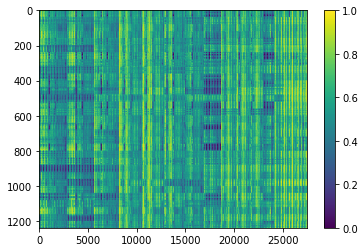

In [ ]:
#----------------------------------------------------------------------------------------------------------------
# for each sample (row) we apply min-max transformation
XT_norm = np.zeros((XT.shape))
for k in range(XT.shape[0]):
  XT_norm[k,:] = (XT[k,:]-XT[k,:].min())/(XT[k,:].max()-XT[k,:].min())
print('X normalized dimensions:',XT_norm.shape,XT_norm.max(),XT_norm.min())
#----------------------------------------------------------------------------------------------------------------
# plot resulting matrix
plt.imshow(XT_norm,aspect='auto')
plt.colorbar()
plt.show()
#----------------------------------------------------------------------------------------------------------------
del XT

In [ ]:
savemat(load_path+'conectividad_gauss.mat',{'gaus':XT2})

# PLV

In [ ]:
# !pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
# !pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git
# !pip install -U mne 
# !pip install bctpy

In [ ]:
def _FB_PLVEEG(Xraw,vtw,f_frec,n_cycles,fs):
  Xcov = np.zeros((Xraw.shape[0],int(0.5*Xraw.shape[1]*(Xraw.shape[1]-1)),vtw.shape[0],f_frec.shape[0]))
  for w in range(vtw.shape[0]): #windows
    Xwtmpha = tfr_array_morlet(Xraw[:,:,int(fs*vtw[w,0]):int(fs*vtw[w,1])],sfreq=fs,freqs=f_frec,n_cycles=n_cycles,output="phase",n_jobs=-1)
    for f in range(f_frec.shape[0]): #frequencies
        Xcov[:,:,w,f] = np.array(Parallel(n_jobs=-1)(delayed(plv_phase_distance)(Xwtmpha,f,n) for n in range(Xraw.shape[0])))
      
  return Xcov
def plv(x,y):
  er = np.exp(1j*(x-y))
  return abs(np.mean(er))
def plv_phase_distance(Xwtmpha,f,n):
  k = pairwise_distances(Xwtmpha[n,:,f,:],Xwtmpha[n,:,f,:],metric=plv)
  k = 0.5*(k+k.T)
  k -= np.diag(np.diag(k))
  return squareform(k) 


In [ ]:
import mne
from mne.connectivity import spectral_connectivity as connectivity
# drive y datos
from google.colab import drive
import requests
# estructuras
import pandas as pd
# 
from ipywidgets import interact_manual
from ipywidgets import interact
# módulo para entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# system
import os
from time import time
# data
import pickle
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat, savemat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
# figuras
import matplotlib.pyplot as plt
from gcpds.utils import loaddb
from gcpds.utils.visualizations import plot_eeg, plot_topoplot
# MNE toolbox
import mne
import bct
from mne.preprocessing import ICA
# módulo de multiproceso de las tareas.
import multiprocessing
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
# from mne.viz.topomap import _check_outlines, _draw_outlines
# from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import itertools
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
from itertools import islice
from scipy.spatial.distance import cdist
from itertools import permutations
import math
from scipy import special
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
import time
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
import numpy as np
from mne.io import read_raw_edf
#from mne.decoding import CSP
# from modCSP import CSP
import matplotlib.pyplot as plt
import pandas as pd
import json as js #conda install -c jmcmurray json
import warnings
import seaborn as sns
import mne
from numpy import matlib
import matplotlib
import os
from matplotlib.animation import FuncAnimation
from ipywidgets import interact


In [ ]:
# Sujetos de la base de datos
Subjects = list(np.arange(1,32))
# canales de la base de datos
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# Frecuencia de muestreo de la base de datos.
sampling_freq  = 1000
# ubicación de la base de datos.
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# Método utilizado para la función de ICA de MNE.
# method = 'fastica'
# Número de núcleos para ell multiproceso
# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# ciclo de los sujetos.
y = list()
n_cy = 5
# f_frec = np.array([[1,4],[4,8],[8,12],[12,16],[16,20],[20,30],[30,45]])
f_frec = np.arange(1., 44., 2.)
n_cy = f_frec/n_cy
# vtw= np.array([[0,2],[1,3],[2,4],[3,5],[4,6],[5,7]])
tau = 0.5
overlap = 1-0.5
ti = 3
tf = 15
tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
vtw = np.array([tti,ttf]).T
PLV = list()
data_ref = list()
for s in Subjects:
  # carga de la información del sujetos.
  S_ERP = loadmat(load_path + f"Sujeto_"+str(s)+".mat")
  print('sujeto: ', s)
  data = S_ERP['music']
  # data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
  data_target = data#[:,:,::4]
  
  # structure mne datos en (trials,canales,tiempo)
  ch_types = ['eeg']*n_channels
  info = mne.create_info(channels, ch_types=ch_types, sfreq=sampling_freq)
  # info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)
  biosemi_montage = mne.channels.make_standard_montage('standard_1005')
  raw.set_montage(biosemi_montage)

  # feat = FB_feats(fs=sampling_freq,vtw=vtw,f_frec=f_frec,gammad=1,feat='PLV')
  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(0.5,100)

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw.get_data()[0,:,:],channels,sampling_freq)

  # Repairing artifacts with ICA
  # ica.plot_sources(raw, show_scrollbars=False)
  # ica = ICA(n_components=n_channels, method=method, max_iter='auto', random_state=0)
  # ica.fit(raw)
  # componentes = ica.get_sources(raw).get_data()
  
  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(componentes[0,:,:],channels,sampling_freq)
  
  # Parametros para el análisis de la entropia.
  # tau     = 10              # 20   30 
  # window  = 1*sampling_freq # 3,   3   segundo de la ventana.
  # step    = window*0.5      # 50%, 80% de traslape.
  # windows = list(np.arange(0,componentes.shape[2]-window,step))

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_raw = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  # # ica.plot_sources(mne.io.RawArray(raw.get_data()[0], info))
  
  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(componentes[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de las componentes.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_com = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  
  # raw2 = raw.copy()
  # comp_ = []
  # for tr in range(entropy_com.shape[0]):
  #   datos_ = np.max(entropy_com[tr,:,:],axis=0)-np.min(entropy_com[0,:,:],axis=0)
  #   datos_f = np.asarray([round(a,1) for a in datos_])
  #   comp_.append(np.where((datos_f>0)==True)[0])
  # pos = list(np.unique(np.concatenate(comp_)))
  # ica.exclude = [0,1]          # indices chosen based on various plots above sujeto 2.
  # ica.apply(raw2)
  
  # # figura señal quitando artefactos
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw2.get_data()[0,:,:],channels,sampling_freq)

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw2.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal quitando artefactos.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_ica = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de la señal {tim}'.format(tim=(time.time()-start_time)))

  # # CAR common average reference
  # # En la señal.
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  # data_ref.append(rereferenced_raw.get_data())
  data_ref = rereferenced_raw.get_data()
  PLV.append(_FB_PLVEEG(data_ref,vtw,f_frec,n_cy,sampling_freq))
  # # En la señal reconstruida.
  # rereferenced_raw_ica, ref_data = mne.set_eeg_reference(raw2, ref_channels='average',projection=True,verbose=0)
  # data_ref_ica.append(rereferenced_raw.get_data())
  # data_ref_ica = rereferenced_raw_ica.get_data()
  # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'.mat',{'X_ica':raw2.get_data(),'X_raw':raw.get_data(),'ref_raw':data_ref,
            # 'ref_ica':data_ref_ica,'H_raw':entropy_raw,'H_com':entropy_com,'H_ica':entropy_ica})
  savemat(load_path+f'PLV_all_subs'+str(s)+'_music2.mat',{'PLV':PLV})

sujeto:  1
sujeto:  2
sujeto:  3
sujeto:  4
sujeto:  5
sujeto:  6
sujeto:  7
sujeto:  8
sujeto:  9
sujeto:  10
sujeto:  11
sujeto:  12
sujeto:  13
sujeto:  14
sujeto:  15
sujeto:  16
sujeto:  17
sujeto:  18
sujeto:  19
sujeto:  20
sujeto:  21
sujeto:  22
sujeto:  23
sujeto:  24
sujeto:  25
sujeto:  26
sujeto:  27
sujeto:  28
sujeto:  29
sujeto:  30
sujeto:  31


# características dde musica PCA + varimax

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat,savemat
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# data = loadmat(load_path+'datos_stim_ord2.mat')['datos']
data = loadmat(load_path+'datos_stim_ord_all3.mat')['datos']
data.shape

(31, 40, 5, 18)

In [ ]:
# data = data[:,:,:5,:]
np.save('data_actual.npy', data)

In [ ]:
tr_cu= loadmat(load_path+'Trials_cuadrantes.mat')['trial_ord']

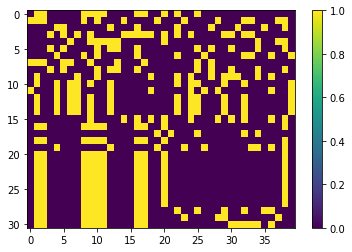

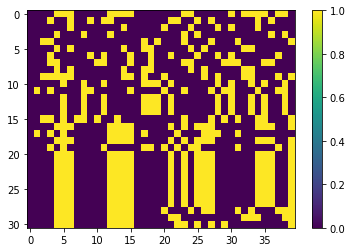

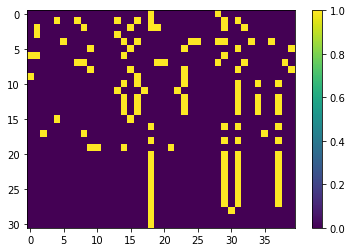

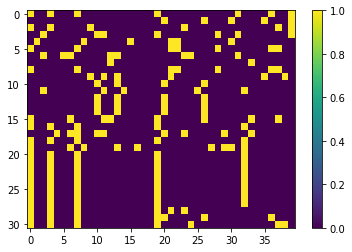

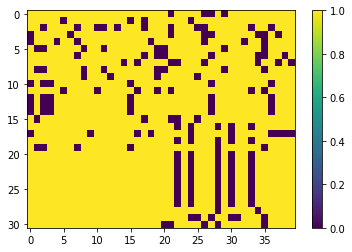

In [ ]:
tr_1 = tr_cu==1
tr_2 = tr_cu==2
tr_3 = tr_cu==3
tr_4 = tr_cu==4
tr_all = tr_1+tr_2+tr_3+tr_4

plt.figure()
plt.imshow(tr_1,aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(tr_2,aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(tr_3,aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(tr_4,aspect='auto')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(tr_all,aspect='auto')
plt.colorbar()
plt.show()


In [ ]:
data = np.transpose(data,[2,0,1,3])
data.shape

(25, 31, 40, 260)

In [ ]:
np.sum(np.sum(np.sum(np.sum(np.isnan(data)))))

1004

In [ ]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))
print(data.shape)
data_2=data1[:,tr_all.reshape([tr_all.shape[0]*tr_all.shape[1]]),:]
print(data_2.shape)
dataf = data_2.reshape([data_2.shape[0],data_2.shape[1]*data_2.shape[2]])
print(dataf.shape)
dataf[np.isnan(dataf)]=0

(25, 31, 40, 260)
(25, 1055, 260)
(25, 274300)


In [ ]:
data_f = np.zeros((20,62289))
for s in range(20):
  print(dataf[s,dataf[s,:]!=0].shape)

(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(271788,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)
(274300,)


In [ ]:
dataf

array([[ 2.90000000e+02,  4.80000000e+02,  4.00000000e+02, ...,
         2.70000000e+02,  2.10000000e+02,  1.90000000e+02],
       [ 9.60560383e+02,  1.24033712e+03,  1.15481032e+03, ...,
         1.30153855e+03,  9.62341402e+02,  9.98533574e+02],
       [ 5.32359081e-01,  5.32359081e-01,  5.32359081e-01, ...,
         4.73903967e-01,  4.73903967e-01,  4.73903967e-01],
       ...,
       [ 2.88700239e+00,  2.88700239e+00,  2.88700239e+00, ...,
         1.34845613e-01,  1.34845613e-01,  1.34845613e-01],
       [ 2.21731850e-02,  6.96938113e-03,  6.57137687e-03, ...,
        -2.48120472e-01, -2.56773913e-01, -2.67405690e-01],
       [ 6.62723820e-01,  6.50788139e-01,  6.44972402e-01, ...,
         8.44346048e-01,  8.58142316e-01,  8.64567217e-01]])

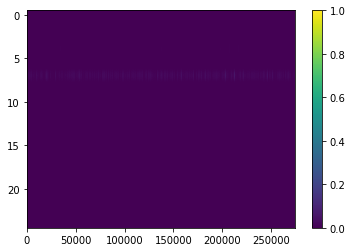

In [ ]:
plt.imshow(dataf/np.max(dataf),aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
X = StandardScaler().fit_transform(dataf)
transformer = FactorAnalysis(n_components=9, random_state=0, rotation='varimax')
X_transformed_all = transformer.fit_transform(dataf)

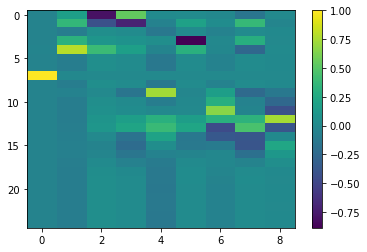

In [ ]:
plt.figure()
plt.imshow(X_transformed_all/np.max(X_transformed_all),aspect='auto')
plt.colorbar()
plt.show()

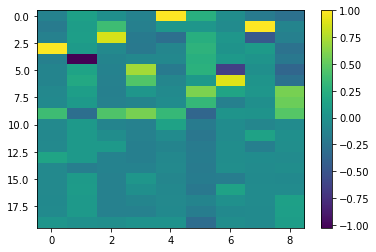

In [ ]:
plt.figure()
plt.imshow(X_transformed_all/np.max(X_transformed_all),aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))
print(data.shape)
data_2=data1[:,tr_1.reshape([tr_1.shape[0]*tr_1.shape[1]]),:]
print(data_2.shape)
dataf = data_2.reshape([data_2.shape[0],data_2.shape[1]*data_2.shape[2]])
print(dataf.shape)
dataf[np.isnan(dataf)]=0
X = StandardScaler().fit_transform(dataf)
transformer = FactorAnalysis(n_components=9, random_state=0, rotation='varimax')
X_transformed_1 = transformer.fit_transform(X)

(25, 31, 40, 260)
(25, 337, 260)
(25, 87620)


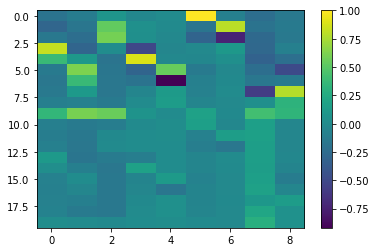

In [ ]:
plt.figure()
plt.imshow(X_transformed_1/np.max(X_transformed_1),aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))
print(data.shape)
data_2=data1[:,tr_2.reshape([tr_2.shape[0]*tr_2.shape[1]]),:]
print(data_2.shape)
dataf = data_2.reshape([data_2.shape[0],data_2.shape[1]*data_2.shape[2]])
print(dataf.shape)
dataf[np.isnan(dataf)]=0
X = StandardScaler().fit_transform(dataf)
transformer = FactorAnalysis(n_components=9, random_state=0, rotation='varimax')
X_transformed_2 = transformer.fit_transform(X)

(25, 31, 40, 260)
(25, 408, 260)
(25, 106080)


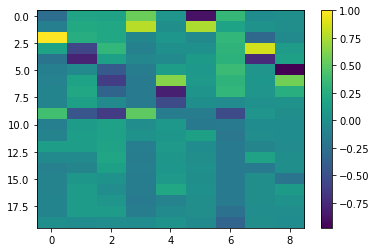

In [ ]:
plt.figure()
plt.imshow(X_transformed_2/np.max(X_transformed_2),aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))
print(data.shape)
data_2=data1[:,tr_3.reshape([tr_3.shape[0]*tr_3.shape[1]]),:]
print(data_2.shape)
dataf = data_2.reshape([data_2.shape[0],data_2.shape[1]*data_2.shape[2]])
print(dataf.shape)
dataf[np.isnan(dataf)]=0
X = StandardScaler().fit_transform(dataf)
transformer = FactorAnalysis(n_components=9, random_state=0, rotation='varimax')
X_transformed_3 = transformer.fit_transform(X)

(25, 31, 40, 260)
(25, 132, 260)
(25, 34320)


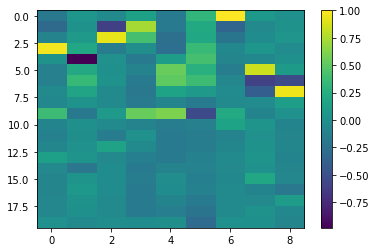

In [ ]:
plt.figure()
plt.imshow(X_transformed_3/np.max(X_transformed_3),aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))
print(data.shape)
data_2=data1[:,tr_4.reshape([tr_4.shape[0]*tr_4.shape[1]]),:]
print(data_2.shape)
dataf = data_2.reshape([data_2.shape[0],data_2.shape[1]*data_2.shape[2]])
print(dataf.shape)
dataf[np.isnan(dataf)]=0
X = StandardScaler().fit_transform(dataf)
transformer = FactorAnalysis(n_components=9, random_state=0, rotation='varimax')
X_transformed_4 = transformer.fit_transform(X)

(25, 31, 40, 260)
(25, 178, 260)
(25, 46280)


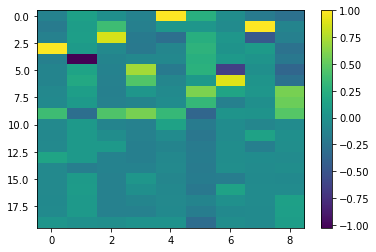

In [ ]:
plt.figure()
plt.imshow(X_transformed_4/np.max(X_transformed_4),aspect='auto')
plt.colorbar()
plt.show()

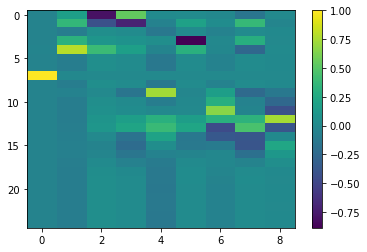

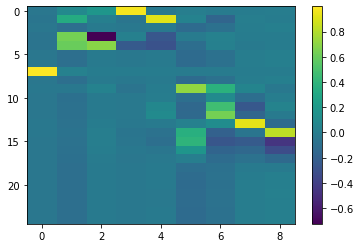

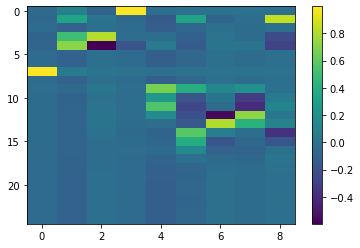

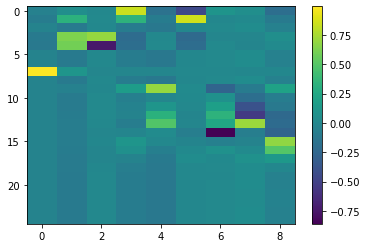

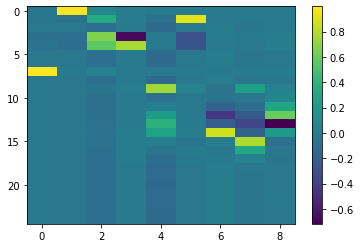

In [ ]:
max_ = np.max([np.max(X_transformed_all),np.max(X_transformed_1),np.max(X_transformed_2),\
               np.max(X_transformed_3),np.max(X_transformed_4)])
plt.figure()
plt.imshow(X_transformed_all/max_,aspect='auto')
plt.colorbar()
# plt.yticks=(list(np.arange(0,25,1)),list(np.arange(0,25,1)))
plt.show()


plt.figure()
plt.imshow(X_transformed_1/max_,aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(X_transformed_2/max_,aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(X_transformed_3/max_,aspect='auto')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(X_transformed_4/max_,aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
data_2.shape

(20, 178, 350)

In [ ]:
data

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [ ]:
fs = 1000
N = 12000
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power),
                   size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

In [ ]:
window = signal.get_window('hamming', 260)
# win = signal.get_window(260, 260, fftbins=True)

print(window.shape)
# window

(260,)


In [ ]:
f, t, Zxx = signal.stft(x, fs,window='hann',noverlap=50,nperseg=96)
print(x.shape)
print('fs: ',fs)
print(f.shape)
print(t.shape)

(12000,)
fs:  1000
(49,)
(262,)


In [ ]:
f


array([  0.        ,  10.41666667,  20.83333333,  31.25      ,
        41.66666667,  52.08333333,  62.5       ,  72.91666667,
        83.33333333,  93.75      , 104.16666667, 114.58333333,
       125.        , 135.41666667, 145.83333333, 156.25      ,
       166.66666667, 177.08333333, 187.5       , 197.91666667,
       208.33333333, 218.75      , 229.16666667, 239.58333333,
       250.        , 260.41666667, 270.83333333, 281.25      ,
       291.66666667, 302.08333333, 312.5       , 322.91666667,
       333.33333333, 343.75      , 354.16666667, 364.58333333,
       375.        , 385.41666667, 395.83333333, 406.25      ,
       416.66666667, 427.08333333, 437.5       , 447.91666667,
       458.33333333, 468.75      , 479.16666667, 489.58333333,
       500.        ])